<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```
***
<div class="alert alert-block alert-info">
<b>Open, Read and Close Input file then create a Data Dictionary</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Open the 'sat_scores.csv' file in read mode 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Read the csvfile using csv.reader()
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Store file data into the variable sat_file
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.&nbsp;&nbsp;&nbsp;Close the input file  
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.&nbsp;&nbsp;&nbsp;Display first 10 rows 
</div>


In [2]:
with open('sat_scores.csv','r') as csvfile:                # Open file 
    data = csv.reader(csvfile)                             # Covert csvfile into csv format
    sat_file =[row for row in data]                        # Read the converted data row by row 
    csvfile.close()                                        # Close file

sat_file[0:10]                                             # Display first 10 rows 

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500']]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

<div class="alert alert-block alert-info">
<b>Using Pandas DataFrame object</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Split Header record and Detail records 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Create a Data Dictionary using Header and Deatil records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Create a Pandas Data Frame from the SAT Data Dictionary
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.&nbsp;&nbsp;&nbsp;Print the SAT Data Dictionary
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.&nbsp;&nbsp;&nbsp;Print the first 5 records of the new DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.&nbsp;&nbsp;&nbsp;Print Data types of the new DataFrame
</div>

In [3]:
header_record = sat_file[0]                                # Seperate Header record which is the first index 
detail_record = sat_file[1::]                              # Seperate Detail record

# Create a Dictionary using the Header record and the Detail records
sat_dict = {key:value for key, value in zip(header_record, np.array(detail_record).transpose())}

# Create a Pandas DataFrame with SAT Dictionary
sat_df = pd.DataFrame(sat_dict)

print ('DICTIONARY sat_dict')
pprint (sat_dict)
print ('\n', sat_df.head())

sat_df.dtypes

DICTIONARY sat_dict
{'Math': array(['510', '513', '515', '505', '516', '499', '499', '506', '500',
       '501', '499', '510', '499', '489', '501', '488', '474', '526',
       '499', '527', '499', '515', '510', '517', '525', '515', '542',
       '439', '539', '512', '542', '553', '542', '589', '550', '545',
       '572', '589', '580', '554', '568', '561', '577', '562', '596',
       '550', '570', '603', '582', '599', '551', '514'], dtype='<U3'),
 'Rate': array(['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
       '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
       '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
       '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6',
       '6', '5', '5', '4', '4', '4', '45'], dtype='<U3'),
 'State': array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 

State     object
Rate      object
Verbal    object
Math      object
dtype: object

<div class="alert alert-block alert-info">
<b>Using Pandas DataFrames</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Use the .read_csv() function to read the csv file
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Print the Dataframe data types
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Print the first 5 records of the Dataframe
</div>

In [4]:
df_sat = pd.read_csv('sat_scores.csv')   

print (df_sat.dtypes)
df_sat.head()

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

<div class="alert alert-block alert-warning">
<b>1. By using Pandas DataFrame pd.read_csv() to read and load file is more efficient, everything is done in one line <br>
2. Pandas .read_csv() has auto-convert which coverts columns with numbers, to integers</b> 
</div>

<div class="alert alert-block alert-warning">
<b>By comparing both options you can see that by using the .read_csv() function you use less code to open and read the file, PLUS the function changes the string values to integers automatically</b> 
</div>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

<div class="alert alert-block alert-info">
<b>Find as much information from the Dataframe</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;.shape - Shape
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;.info() - File Information
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;.dtypes - Data Field Types
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;.describe() - Data Statistics (count, mean, std, min, max, 25-50-75% (Quartiles)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;.head(10) - File Top ROWS
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;.tail() - File Bottom ROWS
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.&nbsp;&nbsp;&nbsp;.isnull() - Find Nulls
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8.&nbsp;&nbsp;&nbsp;.sample() - sample number of records same as .head() 
</div>

In [5]:
''' Using Pandas pd.read_csv '''
print ('FILE SHAPE', '\n', df_sat.shape, '\n')                   # Display how many rows (52) and columns (5)
print ('\n', 'FILE INFORMATION', df_sat.info())                  # Display the information of each column and file
print ('\n', 'DATA FIELD TYPES', df_sat.dtypes)                  # Display type of fields
print ('\n', 'STATISTICS', '\n', df_sat.describe(include='all')) # display file statistics
print ('\n', 'HEAD(10)', '\n', df_sat.head(10))                  # View the first 10 records
print ('\n', 'TAIL()', '\n', df_sat.tail())                      # Check last 5 records in the file
print ('\n', 'ISNULL()', '\n', df_sat.isnull().sum())            # Find all Nulls in file
df_sat.sample(5)

FILE SHAPE 
 (52, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB

 FILE INFORMATION None

 DATA FIELD TYPES State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

 STATISTICS 
        State       Rate      Verbal        Math
count     52  52.000000   52.000000   52.000000
unique    52        NaN         NaN         NaN
top       IA        NaN         NaN         NaN
freq       1        NaN         NaN         NaN
mean     NaN  37.153846  532.019231  531.500000
std      NaN  27.301788   33.236225   36.014975
min      NaN   4.000000  482.000000  439.000000
25%      NaN   9.000000  501.000000  504.000000
50%      NaN  33.500000  526.500000  521.000000
75%      NaN  63.500000  562.000000  555.750000
max      NaN  82.000000  593.000000  603.000

State  Rate  Verbal  Math
0     CT    82     509   510
6     PA    71     500   499
12    NC    65     493   499
17    OR    55     526   526
34    KY    12     550   550

<div class="alert alert-block alert-info">
<b>Remove State that has "All"</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Find the index for State "All"
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Remove row that has "ALL"
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Display the tail records in the DataFrame to make sure 'ALL' has been removed
</div>

In [6]:
# Remove State that has "All"
indx   = int(df_sat[df_sat['State']=='All'].index[0])       # Find the index for State "All" row to be remove
df_sat = df_sat.drop(indx,axis=0)                           # Remove row that has "ALL" 
df_sat.tail()                                               # Print last 5 records in the file to see if "All" is removed

State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

<div class="alert alert-block alert-info">
<b>Finding the Correlation on 'Rate'</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Create a new column called 'Total' and populate it by adding Math + Verbal 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Print 'Rate' column in descending order and print the first 10 rows
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Plot a heatmap showing the pearson correlation method of 'Rate','Math','Verbal','Total' 
</div>

  State  Rate  Verbal  Math  Total
0    CT    82     509   510   1019
1    NJ    81     499   513   1012
2    MA    79     511   515   1026
3    NY    77     495   505   1000
4    NH    72     520   516   1036
5    RI    71     501   499   1000
6    PA    71     500   499    999
7    VT    69     511   506   1017
8    ME    69     506   500   1006
9    VA    68     510   501   1011


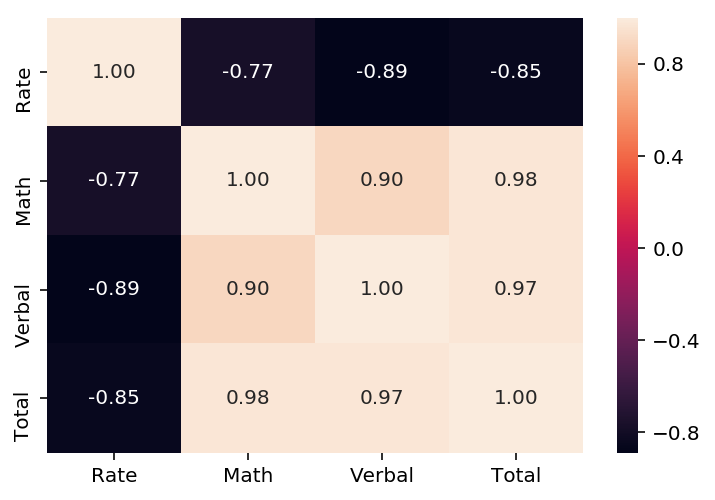

In [7]:
# Finding the correlation on "Rate"
df_sat['Total'] = df_sat['Math'] + df_sat['Verbal']                     # Math + Verbal (Create NEW Column)
print (df_sat.sort_values(by = ['Rate'],ascending = False)[0:10])
sns.heatmap(df_sat[['Rate','Math','Verbal','Total']].corr(method='pearson'), annot=True, fmt=".2f")
plt.show()

<div class="alert alert-block alert-warning">
<b>The data seems to describe the SAT test scores of US 50 States & District of Columbia (DC)
State.<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;---- The "All" Row was removed as it is not a state. ----</b> 
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<div class="alert alert-block alert-info">
<b>Create a Data Dictionary data types</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Display all the column names in the DataFrame 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Create a dictionary of the Data types
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Print the Data Dictionary
</div>

In [8]:
df_sat.columns

Index(['State', 'Rate', 'Verbal', 'Math', 'Total'], dtype='object')

In [9]:
data_dict={
    'State': {'type':'object',  'describe':'US State'},
    'Rate':  {'type':'float64', 'describe':'Participation rate'}, 
    'Verbal':{'type':'float64', 'describe':'Reading and Writing (AVG 200 - 800)'},
    'Math':  {'type':'float64', 'describe':'Math Average (AVG 200 - 800)'},
    'Total': {'type':'float64', 'describe':'Total Test Score (AVG 400 - 1600)'},
    'Shape': {'Rows':df_sat.shape[0],'Columns':df_sat.shape[1]}}

In [10]:
data_dict

{'State': {'type': 'object', 'describe': 'US State'},
 'Rate': {'type': 'float64', 'describe': 'Participation rate'},
 'Verbal': {'type': 'float64',
  'describe': 'Reading and Writing (AVG 200 - 800)'},
 'Math': {'type': 'float64', 'describe': 'Math Average (AVG 200 - 800)'},
 'Total': {'type': 'float64', 'describe': 'Total Test Score (AVG 400 - 1600)'},
 'Shape': {'Rows': 51, 'Columns': 5}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pairplot the distributions of Rate, Math, Verbal and 'Total'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Plot a black line showing the MEDIAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Plot a dotted red line showing the MEAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Plot a dotted yellow line showing the MODE
</div>

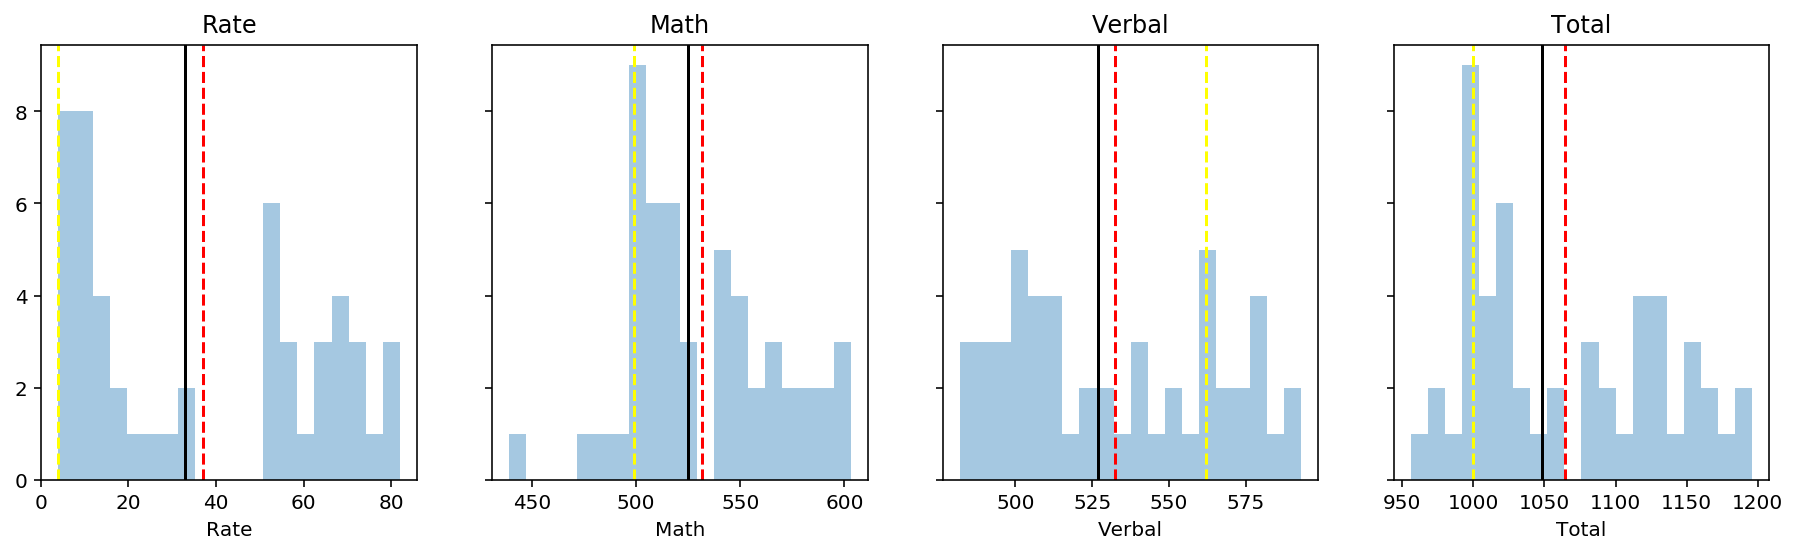

In [11]:
name = ['Rate', 'Math', 'Verbal', 'Total']
fig, ax = plt.subplots(1, 4, sharex = 'col',sharey = 'row')
plt.subplots_adjust(left = 1,right = 3)
    
for num in range(len(name)):
    ax[num].set_title(name[num], y = 1)
    ax[num].axvline(np.median(df_sat[name[num]]),     color = 'black',  linestyle = '-', lw = 1.5)    # Median  
    ax[num].axvline(np.mean(df_sat[name[num]]),       color = 'red',    linestyle = '--', lw = 1.5)    # Mean  
    ax[num].axvline(stats.mode(df_sat[name[num]])[0], color = 'yellow', linestyle = '--', lw = 1.5)    # Mode  
    sns.distplot(df_sat[name[num]], bins = 20, kde = False, ax = ax[num])

<div class="alert alert-block alert-warning">
<b>Outcome observation</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Rate, Verbal, Total does not follow a normal distribution; closest would be Math (Negative Skewed in a way)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Rate tend to be either Good or Bad with nothing much in the middle (higher at both tails)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Verbal scores tend to be mostly either bad or good (higher at both tails)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Math scores tend to be more normal with a concentration in the middle;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;In general, Math scores are better than Verbal scores 
</div>

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Jointplot showing the distributions for Math and Verbal
</div>

C:\Users\sergi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


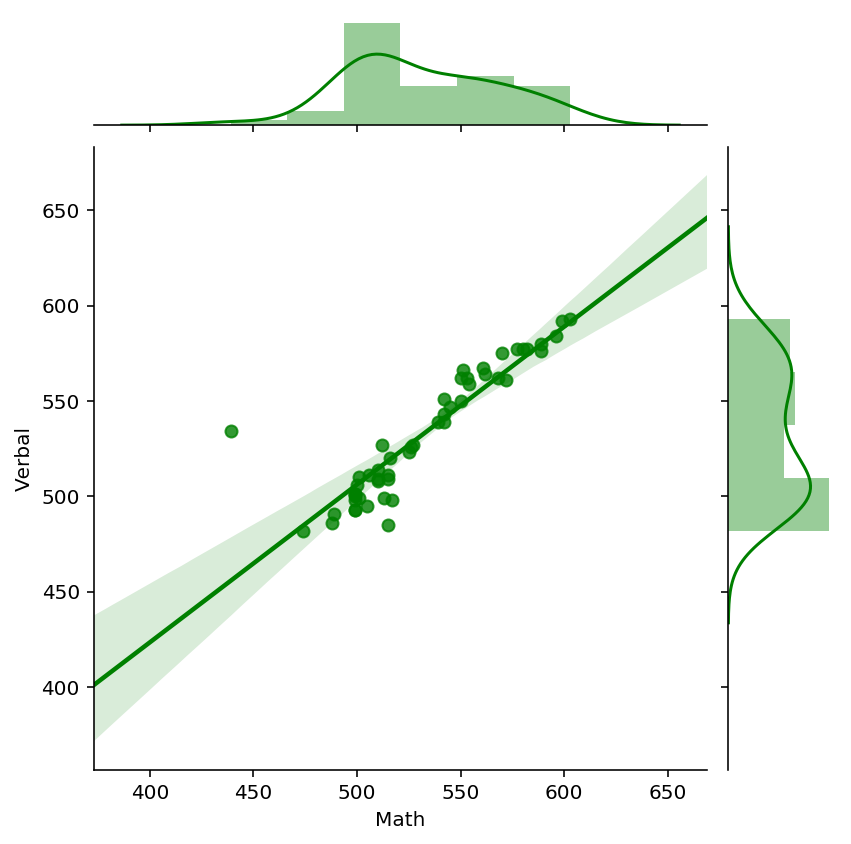

In [12]:
sns.jointplot(data=df_sat, x='Math', y='Verbal', kind='reg', color='g')
plt.show()

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Overlay Verbal and Math histograms
</div>

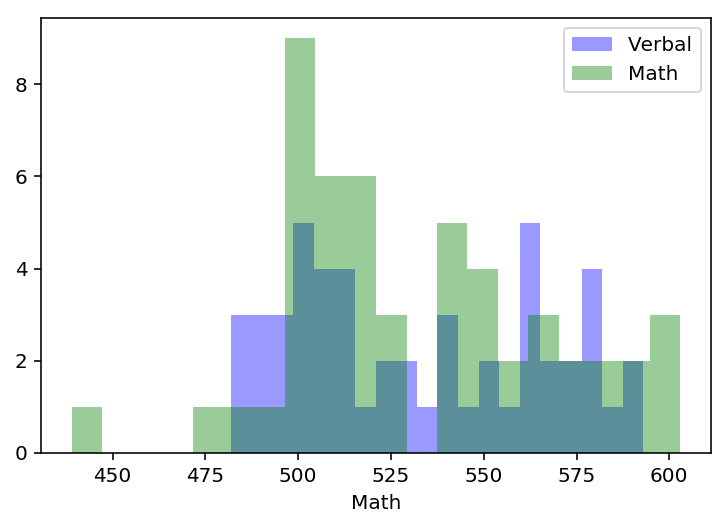

In [13]:
_ = sns.distplot(df_sat.Verbal,kde=False, bins=20, color ="b", label ="Verbal")
_ = sns.distplot(df_sat.Math,  kde=False, bins=20, color= "g", label = 'Math')

plt.legend()
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pairplot showing the joint distributions of Rate, Math, and Verbal
</div>

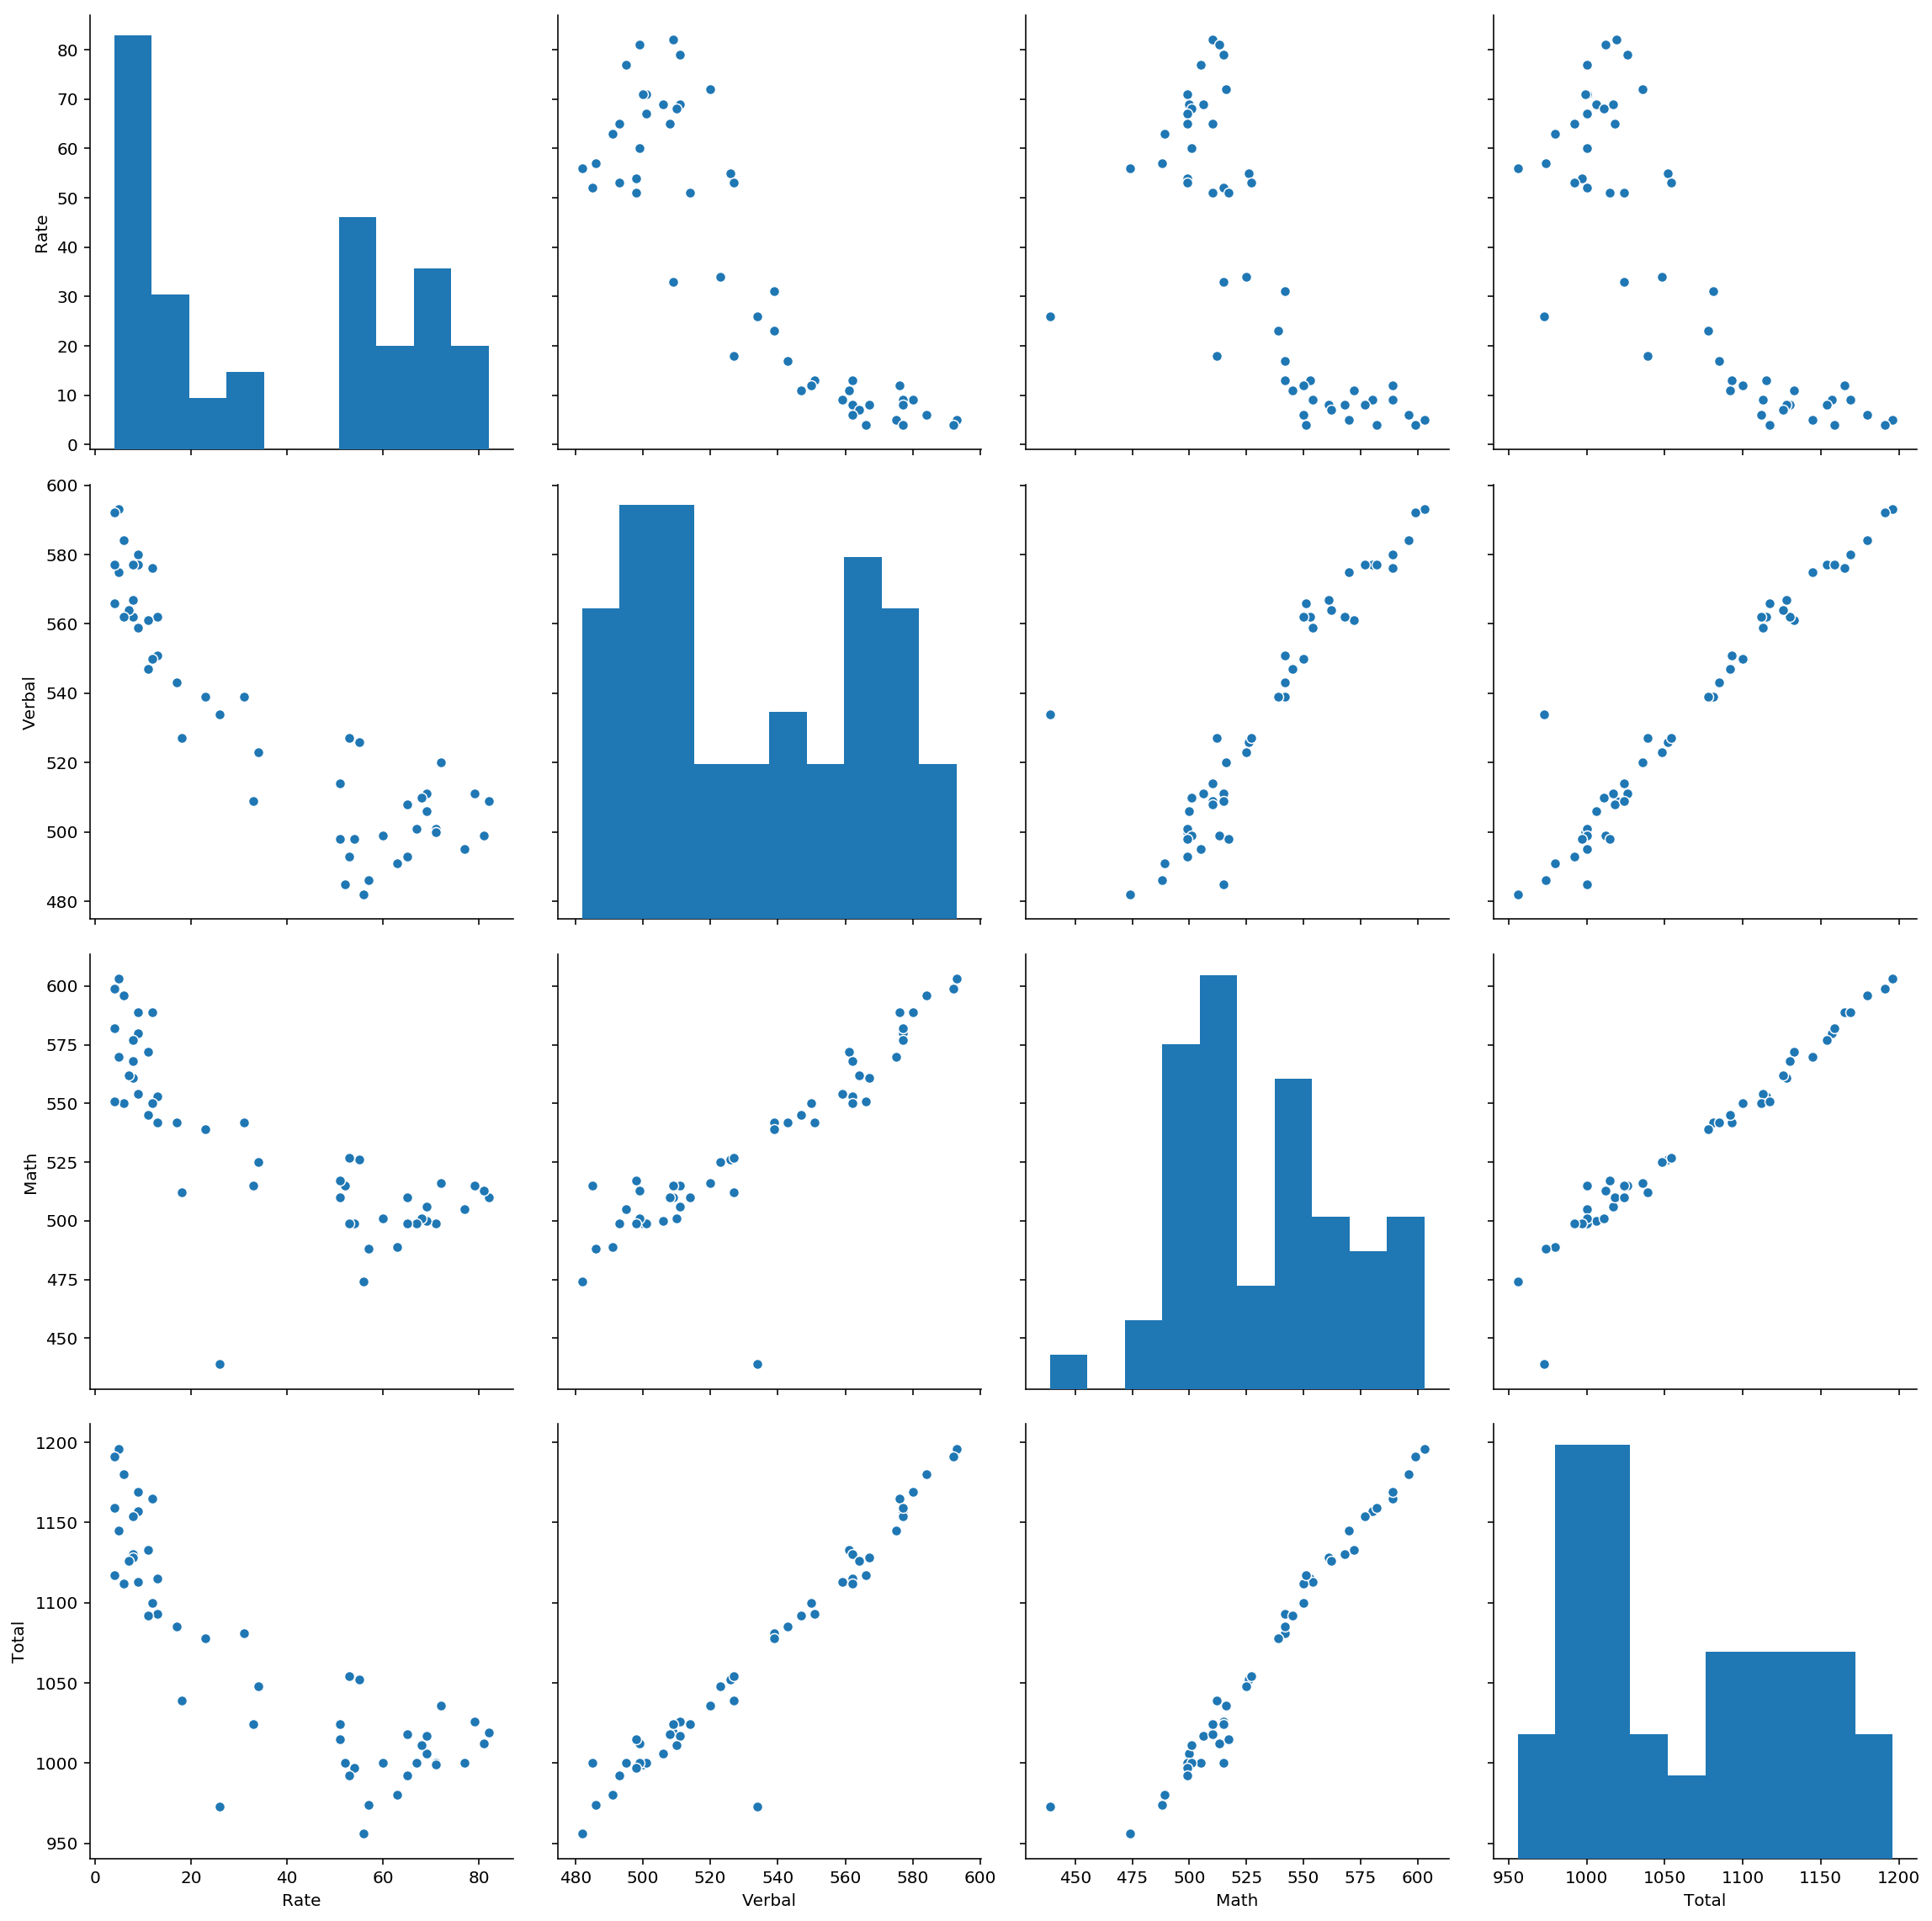

In [14]:
#sns.pairplot(df_sat, hue ='State')
sns.pairplot(df_sat, height = 4, vars = ['Rate','Verbal','Math', 'Total'])

<div class="alert alert-block alert-warning">
<b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Those who score well in Math tend to score well in verbal (positive correlation)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Those who score very low in Math tend to score very low in verbal (positive correlation)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Those with high "Rate" tend to have low math, verbal, & Total (negative correlation)</b></div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<div class="alert alert-block alert-info">
<b>Pandas</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Stacked Histogram plotting Verbal and Rate
</div>

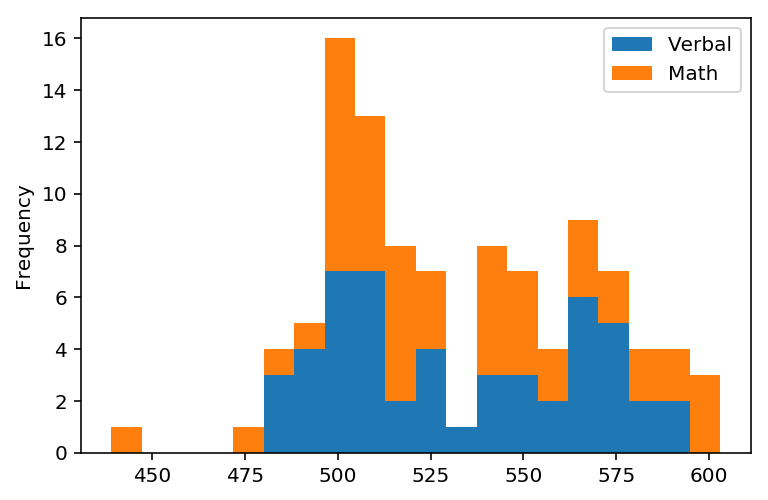

In [15]:
df_sat[['Verbal','Math']].plot.hist(stacked=True,bins=20)

<div class="alert alert-block alert-info">
<b>Pandas</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Plot bar graph showing Verbal and Math
</div>

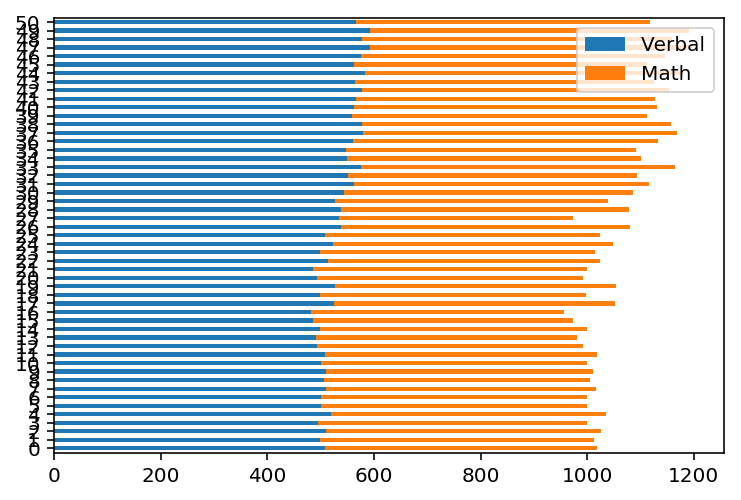

In [16]:
df_sat[['Verbal', 'Math']].plot.barh(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

# Using Pandas

<div class="alert alert-block alert-info">
<b>Pandas</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Boxplots plotting Verbal, Math and Rate
</div>

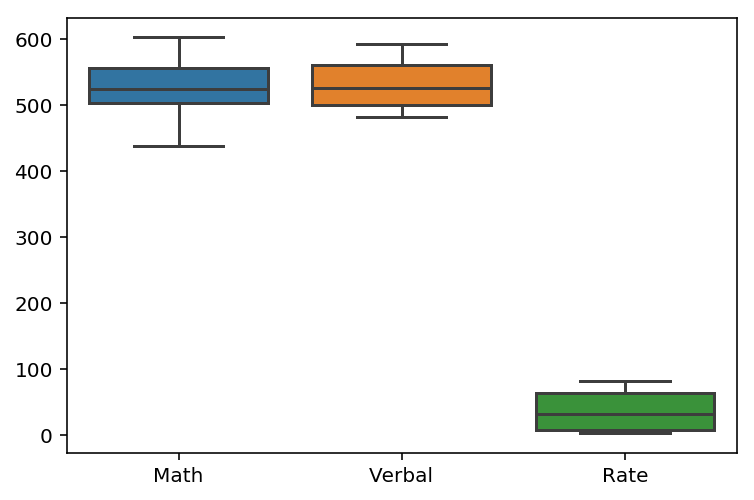

In [17]:
sns.boxplot(data=df_sat[['Math','Verbal', 'Rate']])

<div class="alert alert-block alert-warning">
<b>You can see the Rate box plot has a different scale than Math and Verbal, making it irrational to plot them all together</b> 
</div>

<div class="alert alert-block alert-info">
<b>Pandas</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Boxplots plotting Verbal and Math
</div>

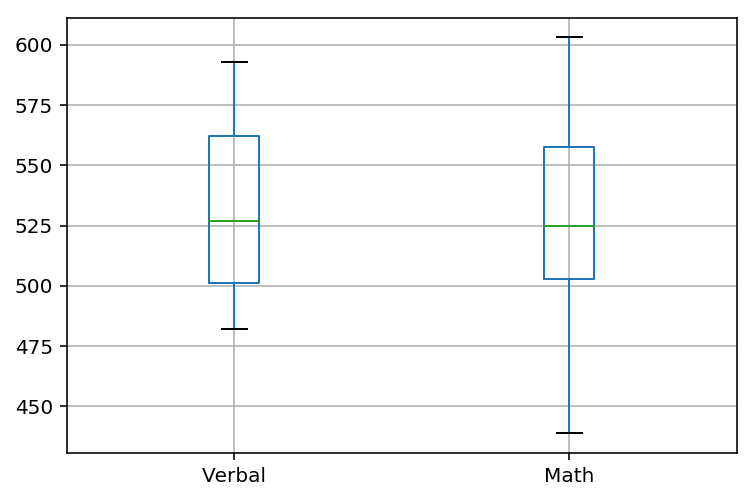

In [18]:
df_sat.boxplot(column= ['Verbal','Math'])

<div class="alert alert-block alert-info">
<b>Pandas</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plotting Verbal and Math
</div>

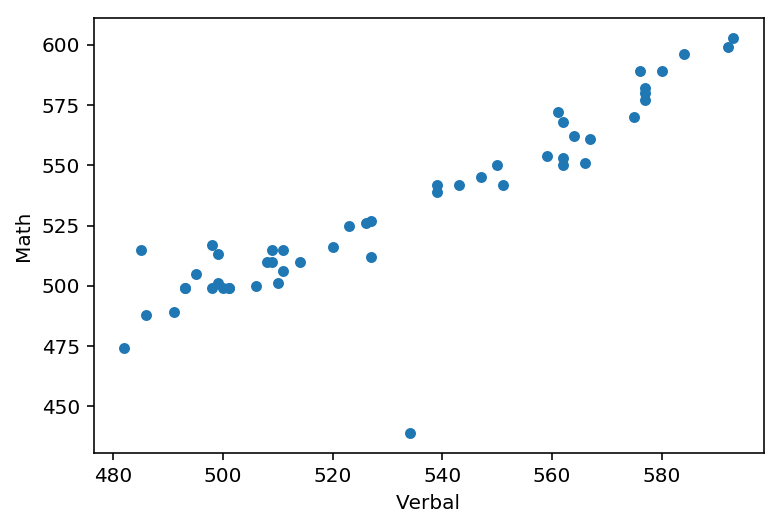

In [19]:
df_sat.plot.scatter('Verbal','Math')

# Using Seaborn

<div class="alert alert-block alert-info">
<b>Seaborn</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Boxplots plotting Verbal and Math
</div>

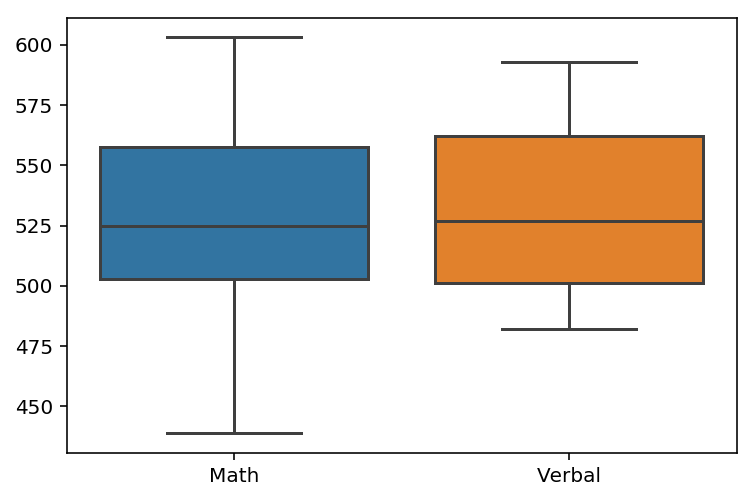

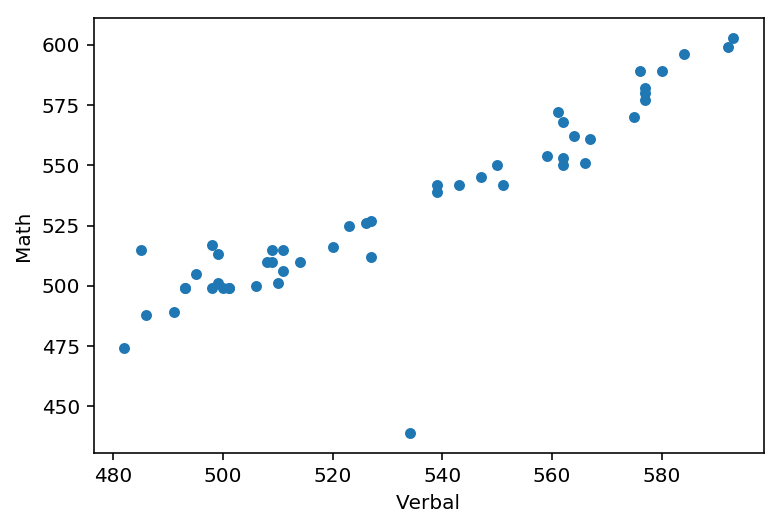

In [20]:
sns.boxplot(data=df_sat[['Math','Verbal']])
df_sat.plot.scatter('Verbal','Math')

<div class="alert alert-block alert-info">
<b>Seaborn</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plotting Verbal and Math
</div>

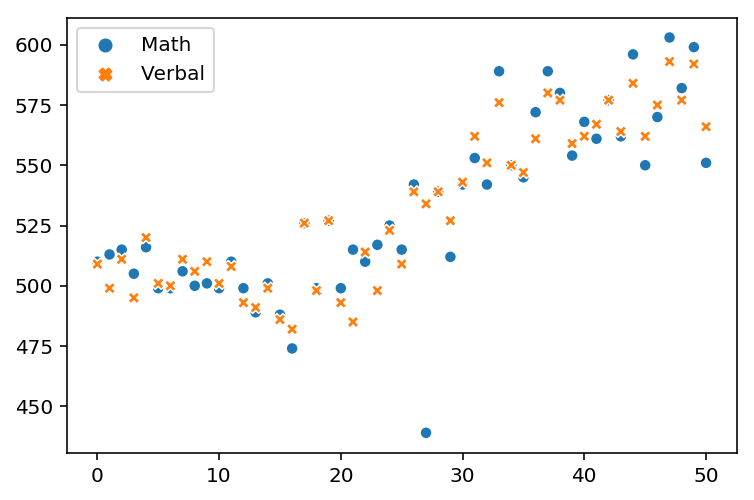

In [21]:
sns.scatterplot(data=df_sat[['Math','Verbal']])

<div class="alert alert-block alert-warning">
<b>Pandas and Seaborn's box plot of Math & Verbal clearly show the range, median, 25th percentile, 75th percentile<br>From the Box plot and scatter plot you can also see that we have outliers for Math</b> 
</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<div class="alert alert-block alert-info">
<b>Seaborn</b>
<br>&nbsp;&nbsp;&nbsp;A. Boxplot & Scatter plotting Rate, Math, Verbal and Total
<br>&nbsp;&nbsp;&nbsp;B. Pairplot the distributions of Rate, Math, Verbal and 'Total'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Make a copy of the DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Create a list of column names
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Read thru Column names 1 by 1
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Calculate the MEAN for each column using np.mean 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Calculate the STD for each column using np.std 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;Calculate the VALUE for each column by (Value - Mean) / STD 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.&nbsp;&nbsp;&nbsp;Seaborn Box Plot the data 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8.&nbsp;&nbsp;&nbsp;Seaborn Scatter Plot the data 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;9.&nbsp;&nbsp;&nbsp;Show the first five records of the plotting data
</div>

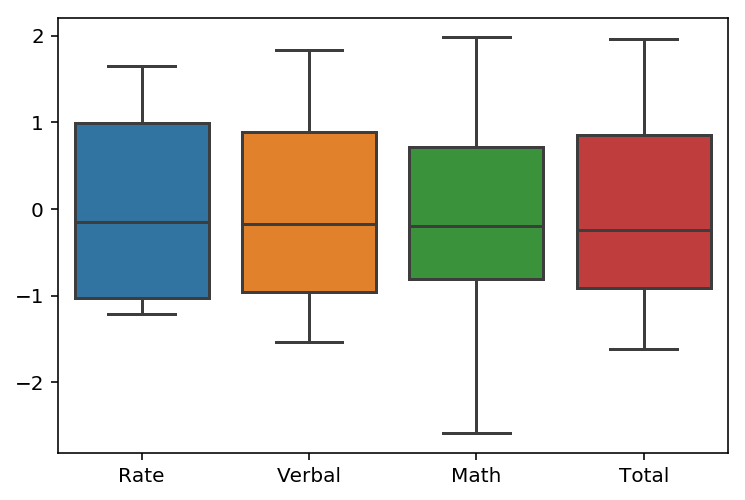

In [22]:
df_plot_data = df_sat.copy(deep=True)                               # make a copy of the DataFrame
column_name = ['Rate', 'Math', 'Verbal', 'Total']                   # Column names 
for x in range(len(column_name)):                                   # Read thru Column names 1 by 1
    avg = df_plot_data[column_name[x]].mean()                       # Calculate the MEAN for each column
    std = np.std(df_plot_data[column_name[x]])                      # Calculate the STD for each column
    df_plot_data[column_name[x]] =\
    df_plot_data[column_name[x]].map(lambda y: (y - avg) / std)     # Calculate the Value each column (Value - Mean) / STD
sns.boxplot(data = df_plot_data)                                    # Box Plot the data

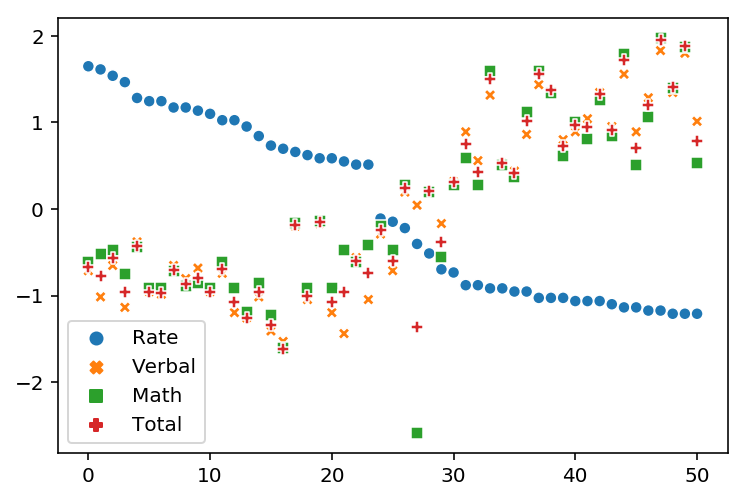

In [23]:
sns.scatterplot(data=df_plot_data[['Rate', 'Verbal', 'Math', 'Total']])

In [24]:
df_plot_data.head()                          # Show the first five records of the data

State      Rate    Verbal      Math     Total
0    CT  1.649606 -0.712322 -0.607938 -0.675014
1    NJ  1.612948 -1.015059 -0.524442 -0.779154
2    MA  1.539632 -0.651775 -0.468778 -0.570874
3    NY  1.466317 -1.136154 -0.747098 -0.957679
4    NH  1.283027 -0.379312 -0.440946 -0.422102

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




<div class="alert alert-block alert-info">
<b>States above the MEAN and Verbal Scores greater than Average Verbal scores across the states</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Describe the DataFrame showing all statistics
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Display all States where Verbal scores are greater than the Verbal MEAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Show the count of number of affected records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Display the Verbal Mean, total count and percentage, and affected states 
</div>

In [25]:
# Describe the DataFrame showing all statistics
df_sat.describe(include='all')

State       Rate      Verbal        Math        Total
count     51  51.000000   51.000000   51.000000    51.000000
unique    51        NaN         NaN         NaN          NaN
top       IA        NaN         NaN         NaN          NaN
freq       1        NaN         NaN         NaN          NaN
mean     NaN  37.000000  532.529412  531.843137  1064.372549
std      NaN  27.550681   33.360667   36.287393    67.886069
min      NaN   4.000000  482.000000  439.000000   956.000000
25%      NaN   9.000000  501.000000  503.000000  1003.000000
50%      NaN  33.000000  527.000000  525.000000  1048.000000
75%      NaN  64.000000  562.000000  557.500000  1121.500000
max      NaN  82.000000  593.000000  603.000000  1196.000000

In [26]:
# Display all States where Verbal scores are greater than the Verbal MEAN 
verbal_mean_count = df_sat.loc [df_sat['Verbal'] > np.mean(df_sat['Verbal']), ('State', 'Verbal')].count()
print(df_sat.loc [df_sat['Verbal'] > np.mean(df_sat['Verbal']), ('State', 'Verbal')])

# Show the count of number of affected records
print (verbal_mean_count)

   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566
State     24
Verbal    24
dtype: int64


In [27]:
# Display the Verbal Mean, total count and percentage, and affected states
# Using the average Verbal mean you can go through and count which are states are greater than the MEAN
verbal_mean = round(df_sat.Verbal.mean(), 2)
verbal_count = float(df_sat.loc[(df_sat['Verbal'] > verbal_mean),'State'].count())
print ('Verbal Mean  : ', verbal_mean)
print ('States > Mean: ', verbal_count, '(', round((verbal_count / df_sat.shape[0] * 100), 2),'% )')
print (df_sat.loc[(df_sat['Verbal'] > verbal_mean ,'State')].values)

Verbal Mean  :  532.53
States > Mean:  24.0 ( 47.06 % )
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


<div class="alert alert-block alert-warning">
<b>Observation</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;There're almost half the states that exceed the Mean average (24 out of 50 States)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;The distribution seems to be normal with a slight skew
</div>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

<div class="alert alert-block alert-info">
<b>States where the Verbal scores a greater than the Verbal mean</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Display all States where Verbal scores are greater than the Verbal MEDIAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Show number of affected records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Display the Verbal Median, total count and percentage, and affected states
</div>

In [28]:
# Display all States where Verbal scores are greater than the Verbal MEDIAN
verbal_median_count = df_sat.loc [df_sat['Verbal'] > np.median(df_sat['Verbal']), ('State', 'Verbal')].count()
print(df_sat.loc [df_sat['Verbal'] > np.median(df_sat['Verbal']), ('State', 'Verbal')])

# Show number of affected records 
print (verbal_median_count)

   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566
State     24
Verbal    24
dtype: int64


In [29]:
# Display the Verbal Median, total count and percentage, and affected states
# Using the average Verbal median you can go through and count which are states greater than the median
verbal_median = round(df_sat.Verbal.median(), 2)
verbal_count = float(df_sat.loc[(df_sat['Verbal'] > verbal_median),'State'].count())
print ('Verbal Median  : ', verbal_median)
print ('States > Median: ', verbal_count, '(', round((verbal_count / df_sat.shape[0] * 100), 2),'% )')
print (df_sat.loc[(df_sat['Verbal'] > verbal_median ,'State')].values)

Verbal Median  :  527.0
States > Median:  24.0 ( 47.06 % )
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


<div class="alert alert-block alert-warning">
<b>Observation</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Again it seems the same states that are greater than the MEAN seem to be greater than the MEDIAN (24 out of 50 States)
</div>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

<div class="alert alert-block alert-info">
<b>New Column difference between the Verbal and Math scores</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;New Column 'Diff_V_M' showing the difference between Verbal and Math scores
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Another Column 'Diff_M_V' showing the difference between Math and Verbal scores 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Print first five records
</div>

In [30]:
# Create new columns 
df_sat['Diff_M_V'] = df_sat['Math'] - df_sat['Verbal']
df_sat['Diff_V_M'] = df_sat['Verbal'] - df_sat['Math']
print (df_sat.head())

  State  Rate  Verbal  Math  Total  Diff_M_V  Diff_V_M
0    CT    82     509   510   1019         1        -1
1    NJ    81     499   513   1012        14       -14
2    MA    79     511   515   1026         4        -4
3    NY    77     495   505   1000        10       -10
4    NH    72     520   516   1036        -4         4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

<div class="alert alert-block alert-info">
<b>New DataFrames showing greatest differences between scores</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Sort 'Diff_V_M' in decending order and select the first 10 records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Sort 'Diff_M_V' in decending order and select the first 10 records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Print the first 3 records of the Low in Math but High in Verbal
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Print the first 3 records of the High in Math but Low in Verbal 
</div>

In [31]:
df_sat_V_M = df_sat.sort_values(by='Diff_V_M',ascending=False)[:10]
df_sat_M_V = df_sat.sort_values(by='Diff_M_V',ascending=False)[:10]

print ('-*-*- States Low in Math but High in Verbal -*-*-')
print (df_sat_V_M.head(3), "\n")
print ('-*-*- States High in Math but Low in Verbal -*-*-')
print (df_sat_M_V.head(3))

-*-*- States Low in Math but High in Verbal -*-*-
   State  Rate  Verbal  Math  Total  Diff_M_V  Diff_V_M
27    OH    26     534   439    973       -95        95
50    MS     4     566   551   1117       -15        15
29    WV    18     527   512   1039       -15        15 

-*-*- States High in Math but Low in Verbal -*-*-
   State  Rate  Verbal  Math  Total  Diff_M_V  Diff_V_M
21    HI    52     485   515   1000        30       -30
23    CA    51     498   517   1015        19       -19
1     NJ    81     499   513   1012        14       -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


<div class="alert alert-block alert-info">
<b>Correlation matrix</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Pearson's Correlation between 'Verbal','Math','Rate','Diff_M_V'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Pearson's Correlation between 'Verbal','Math','Rate','Diff_V_M'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Print the DataFrame Correlation matrix
</div>

In [32]:
cor = df_sat_M_V[['Verbal','Math','Rate','Diff_M_V']].corr(method = 'pearson').style.background_gradient(cmap = 'PiYG')
cor

In [33]:
cor = df_sat_V_M[['Verbal','Math','Rate','Diff_V_M']].corr(method = 'pearson').style.background_gradient(cmap = 'PiYG')
cor

In [34]:
df_sat.corr()

Rate    Verbal      Math     Total  Diff_M_V  Diff_V_M
Rate      1.000000 -0.888121 -0.773419 -0.849860  0.098671 -0.098671
Verbal   -0.888121  1.000000  0.899909  0.972453 -0.044527  0.044527
Math     -0.773419  0.899909  1.000000  0.976768  0.395574 -0.395574
Total    -0.849860  0.972453  0.976768  1.000000  0.189566 -0.189566
Diff_M_V  0.098671 -0.044527  0.395574  0.189566  1.000000 -1.000000
Diff_V_M -0.098671  0.044527 -0.395574 -0.189566 -1.000000  1.000000

<div class="alert alert-block alert-warning">
<b>The correlation matrix tells us</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;When Math is good then Verbal is also good
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Vice-versa if Verbal is good then Math is good
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;No correlation between the Diff_V_M and Diff_M_Vdifference  scores.
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

<div class="alert alert-block alert-info">
<b>Function .describe()</b>
</div>

In [35]:
df_sat.describe()

Rate      Verbal        Math        Total   Diff_M_V   Diff_V_M
count  51.000000   51.000000   51.000000    51.000000  51.000000  51.000000
mean   37.000000  532.529412  531.843137  1064.372549  -0.686275   0.686275
std    27.550681   33.360667   36.287393    67.886069  15.839811  15.839811
min     4.000000  482.000000  439.000000   956.000000 -95.000000 -30.000000
25%     9.000000  501.000000  503.000000  1003.000000  -4.500000  -6.000000
50%    33.000000  527.000000  525.000000  1048.000000   0.000000   0.000000
75%    64.000000  562.000000  557.500000  1121.500000   6.000000   4.500000
max    82.000000  593.000000  603.000000  1196.000000  30.000000  95.000000

<div class="alert alert-block alert-warning">
<b>Defenitions of .describe() output</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;COUNT is the number of rows in the DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;MEAN is the average value in that column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;STD is the standard deviation, or the "variability" of that column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.&nbsp;&nbsp;&nbsp;MIN is the minimum vaue within that column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.&nbsp;&nbsp;&nbsp;MAX is the highest value in the column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.&nbsp;&nbsp;&nbsp;Quartile
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a.&nbsp;&nbsp;&nbsp;1 - First (25%) 25% of values in the column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b.&nbsp;&nbsp;&nbsp;2 - Next  (50%) 25% of values in the column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c.&nbsp;&nbsp;&nbsp;3 - Third (75%) 25% of values in the column
</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<div class="alert alert-block alert-info">
<b>Convariance Matrix using function .con()</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Print Covariance of the DataFrame using the .con() function
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Plot the covariance of the DataFrame
</div>

In [36]:
df_sat.cov()

Rate       Verbal         Math        Total    Diff_M_V  \
Rate       759.04  -816.280000  -773.220000 -1589.500000   43.060000   
Verbal    -816.28  1112.934118  1089.404706  2202.338824  -23.529412   
Math      -773.22  1089.404706  1316.774902  2406.179608  227.370196   
Total    -1589.50  2202.338824  2406.179608  4608.518431  203.840784   
Diff_M_V    43.06   -23.529412   227.370196   203.840784  250.899608   
Diff_V_M   -43.06    23.529412  -227.370196  -203.840784 -250.899608   

            Diff_V_M  
Rate      -43.060000  
Verbal     23.529412  
Math     -227.370196  
Total    -203.840784  
Diff_M_V -250.899608  
Diff_V_M  250.899608

In [37]:
df_sat[['Rate','Verbal','Math', 'Total', 'Diff_M_V', 'Diff_V_M']].cov().style.background_gradient(cmap='PiYG')

<div class="alert alert-block alert-warning">
<b>6.3 - 1. Describe how the covariance matrix is different from the correlation matrix.</b> 
<br>Covariance is a measure of how much two random variables vary together and are linearly associated. It tries to look into and measure how much variables change together.
<br>The formula is:
<br>&nbsp;&nbsp;&nbsp;Cov(X,Y) = Σ E((X-μ)E(Y-ν)) / n-1 
<br>where:
<br>&nbsp;&nbsp;&nbsp;X is a random variable
<br>&nbsp;&nbsp;&nbsp;E(X) = μ is the expected value (the mean) of the random variable X and
<br>&nbsp;&nbsp;&nbsp;E(Y) = ν is the expected value (the mean) of the random variable Y
<br>&nbsp;&nbsp;&nbsp;n = the number of items in the data set
<br>
<br>Correlation matrix between sets of data is measured of how well they are related
<br><b>i.e</b>
<br>&nbsp;&nbsp;&nbsp;1. Is a linear relationship of how changes in one variable changes the other variable scaled proportionately, a corr of 1 means variable one increase from 2 to 4 would result in variable 2 increase from 16 to 32.
<br>&nbsp;&nbsp;&nbsp;2. Is the result of normalizing the covariance into a range from -1 to 1, referring to on average, per 1 unit
<br><br><b>6.3 - 2. What is the process to convert the covariance into the correlation?</b>
<br><b>&nbsp;&nbsp;&nbsp;Covariance formula</b> 
<br>$$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$
<br><b>&nbsp;&nbsp;&nbsp;Conver to Correllation formula</b> 
<br>$$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$
<br>&nbsp;&nbsp;&nbsp;Convert covariance to correlation by dividing covariance by the standard deviations of the variables.
<br>
<br><b>6.3 - 3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?</b>
<br>&nbsp;&nbsp;&nbsp;A large covariance can mean a strong relationship between variables except when you're comparing data set of different scales. 
<br>
<br>&nbsp;&nbsp;&nbsp;A weak covariance may be a strong relationship because it is in a different data set with different scales.
<br>
<br>&nbsp;&nbsp;&nbsp;Covariance can take on practically any number while a correlation is limited: -1 to +1.
<br>
<br>&nbsp;&nbsp;&nbsp;Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
<br>
<br>&nbsp;&nbsp;&nbsp;Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables
<br>
<br>&nbsp;&nbsp;&nbsp;With correlation, all variables are normed and one does not need to understand the scale of each variable to understand the value of the correlation, simply looking at the correlation number is enough for inference.
<br>
<br>&nbsp;&nbsp;&nbsp;With correlation, all variables are normed and one does not need to understand the scale of each variable to understand the value of the correlation, simply looking at the correlation number is enough for inference.
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

<div class="alert alert-block alert-info">
<b>Perform EDA</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Using Pandas .read() function read the 'drug-use-by-age.csv' file
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Print DataFrame Data Types using .dtypes
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Print first 5 rows of the DataFrame
</div>

In [38]:
''' Read drug-use-by-age.csv data file into a Panda DataFrame: Using Pandas pd.read_csv '''
df_drug = pd.read_csv('drug-use-by-age.csv')   

print (df_drug.dtypes)
df_drug.head()

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object


age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

<div class="alert alert-block alert-info">
<b>Find as much information from the Dataframe</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;.shape - Shape
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;.info() - File Information
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;.dtypes - Data Field Types
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;.describe() - Data Statistics (count, mean, std, min, max, 25-50-75% (Quartiles)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;.head(10) - File Top ROWS
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;.tail() - File Bottom ROWS
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.&nbsp;&nbsp;&nbsp;.isnull() - Find Nulls
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8.&nbsp;&nbsp;&nbsp;.sample(5) - sample number of records same as .head() 
</div>

In [39]:
print ('FILE SHAPE', '\n', df_drug.shape, '\n')                 # Display how many rows (17) and columns (28)
print ('\n', 'FILE INFORMATION', df_drug.info())                # Display the information of each column and file
print ('\n', 'DATA FIELD TYPES', df_drug.dtypes)                # Display type of fields
print ('\n', 'STATISTICS', '\n', df_drug.describe())            # display file statistics
print ('\n', 'HEAD(10)', '\n', df_drug.head(10))                # View the first 10 records
print ('\n', 'TAIL()', '\n', df_drug.tail())                    # Check last 5 records in the file
print ('\n', 'ISNULL()', '\n', df_drug.isnull().sum())          # Find all Nulls in file
df_drug.sample(5)                                               # Print sample records

FILE SHAPE 
 (17, 28) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
15  50-64  3923         67.2               52.0            7.3   
3      15  2956         29.2                6.0           14.5   
12  26-29  2628         80.7               52.0           20.8   
2      14  2792         18.1                5.0            8.7   
11  24-25  4591         83.1               52.0           24.9   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
15                 52.0          0.9              36.0        0.4   
3                  25.0          0.5               4.0        0.1   
12                 52.0          3.2               5.0        0.4   
2                  24.0          0.1               5.5        0.0   
11                 60.0          4.0               6.0        0.5   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
15            62.0        ...                    0.4                 5.0   
3              9.5        ...                    0.8                 3.0   
12             6.0        ...                    1.2                13.5   
2                -        ...                    0.4                 4.5   
11             6.0        ...                    1.3                20.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
15               1.4                    10.0            0.3   
3                2.0                     4.5            1.5   
12               4.2                    10.0            2.3   
2                0.9                     5.0            0.8   
11               4.3                    10.0            2.6   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
15                24.0       0.2            30.0           0.2   
3                  6.0       0.3            10.5           0.4   
12                 7.0       0.6            30.0           0.4   
2                 12.0       0.1            24.0           0.2   
11                10.0       0.7            21.0           0.2   

   sedative-frequency  
15              104.0  
3                30.0  
12                4.0  
2                16.5  
11               17.5  

[5 rows x 28 columns]

<div class="alert alert-block alert-warning">
<b>From first Observation using the .info()</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Fields that are objects when they should be int/float values.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a.&nbsp;&nbsp;&nbsp;Age
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b.&nbsp;&nbsp;&nbsp;cocaine-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c.&nbsp;&nbsp;&nbsp;crack-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; d.&nbsp;&nbsp;&nbsp;heroin-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e.&nbsp;&nbsp;&nbsp;inhalant-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f.&nbsp;&nbsp;&nbsp;oxycontin-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; g.&nbsp;&nbsp;&nbsp;meth-frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Columns require changing for easier referencing
</div>

<div class="alert alert-block alert-info">
<b>Find UNIQUE values and see which to remove or change</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Create a list of all fields that are STRINGS(Objects) from the DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Read thru the created list and find all unique values that appear in tha DataFrame fields 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.&nbsp;&nbsp;&nbsp;Print the Column Name 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.&nbsp;&nbsp;&nbsp;Print the unique values in that column 
</div>

In [40]:
# Make a list of all string items
list_string_fields = [clean[0] for clean in df_drug.dtypes.iteritems() if clean[1] =='object']

# Find out unique values of the list created and see why they're String values
for col in list_string_fields:                     # Read thru the list of field values
    print (col)                                    # Print Column Name
    print (df_drug[col].unique(), '\n')            # Print the unique values in the Column

age
['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+'] 

cocaine-frequency
['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-'] 

crack-frequency
['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0'] 

heroin-frequency
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0'] 

inhalant-frequency
['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-'] 

oxycontin-frequency
['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-'] 

meth-frequency
['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0'] 



<div class="alert alert-block alert-warning">
<b>From the list of String items after using .unique()</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;We find that there are a number of fields within the List that contain '-'.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;'age' needs to be a string as it seems to have age range, the rest need have the '-' replaced to 0.0 float values
</div>

<div class="alert alert-block alert-info">
<b>Clean Data</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Replace all values that are '-' to NaN or 0.0 except the 'age' column
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Make them float values
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Check to see if fields are now floats by using .info()
</div>

In [41]:
# Replace all values that are '-' to 0.0 float or np.nan value in this case we will use 0.0
for col in list_string_fields:
    if col != 'age':
       df_drug[col] = [0.0 if val == '-' else float(val) for val in df_drug[col]]
#       df_drug[col] = [np.nan if val == '-' else float(val) for val in df_drug[col]]

# Check to see that all the fields are now floats    
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

<div class="alert alert-block alert-info">
<b>Clean Column Names</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Build a Column list using List and .columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Using a for loop read thru the list of columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.&nbsp;&nbsp;&nbsp;Change heading 'n' to 'num-surveyed'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.&nbsp;&nbsp;&nbsp;Change any '-' to ' ' so as to use .title()
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c.&nbsp;&nbsp;&nbsp;Change heading to have first character uppercase using .title()
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d.&nbsp;&nbsp;&nbsp;Change any ' ' to '_' 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Replace the columns in the file with new names
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Print using .head()
</div>

In [42]:
col_names = list(df_drug.columns)                        # compile all column names to a single list

x = 0                                                    # x is the index position
for col in col_names:                                    # Read through the Column list
    if col == 'n':                                       # Check if column is 'n' if so change to 'num-surveyed'
       col = 'num-surveyed'                              # If 'n' change to 'num-surveyed'
    col = col.replace('frequency', "freq")               # Change 'frequency' to 'freq'
    col = col.replace('-', ' ').title()                  # Change '-' to ' ' and make first character uppercase
    col_names[x] = col.replace(' ', '_')                 # Change '-' to ' '
    x +=1                                                # Increase index position by 1
df_drug.columns = col_names                              # Replace column names in file

df_drug.head()                                           # Print 5 records using .head

Age  Num_Surveyed  Alcohol_Use  Alcohol_Freq  Marijuana_Use  Marijuana_Freq  \
0  12          2798          3.9           3.0            1.1             4.0   
1  13          2757          8.5           6.0            3.4            15.0   
2  14          2792         18.1           5.0            8.7            24.0   
3  15          2956         29.2           6.0           14.5            25.0   
4  16          3058         40.1          10.0           22.5            30.0   

   Cocaine_Use  Cocaine_Freq  Crack_Use  Crack_Freq      ...        \
0          0.1           5.0        0.0         0.0      ...         
1          0.1           1.0        0.0         3.0      ...         
2          0.1           5.5        0.0         0.0      ...         
3          0.5           4.0        0.1         9.5      ...         
4          1.0           7.0        0.0         1.0      ...         

   Oxycontin_Use  Oxycontin_Freq  Tranquilizer_Use  Tranquilizer_Freq  \
0            0.1            24.5               0.2               52.0   
1            0.1            41.0               0.3               25.5   
2            0.4             4.5               0.9                5.0   
3            0.8             3.0               2.0                4.5   
4            1.1             4.0               2.4               11.0   

   Stimulant_Use  Stimulant_Freq  Meth_Use  Meth_Freq  Sedative_Use  \
0            0.2             2.0       0.0        0.0           0.2   
1            0.3             4.0       0.1        5.0           0.1   
2            0.8            12.0       0.1       24.0           0.2   
3            1.5             6.0       0.3       10.5           0.4   
4            1.8             9.5       0.3       36.0           0.2   

   Sedative_Freq  
0           13.0  
1           19.0  
2           16.5  
3           30.0  
4            3.0  

[5 rows x 28 columns]

<div class="alert alert-block alert-warning">
<b>Further observation we find that</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;heroin-frequency/stimulant-frequency columns have values > 100%
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Rows that have zero % user but have a frequency value
</div>

<div class="alert alert-block alert-info">
<b>Clean inconsistent values</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Create a first_time indicator and set to True
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Read thru the DataFrame index by using .index function extracting the key or index
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i.&nbsp;&nbsp;&nbsp;Read thru DataFrame columns by using .columns function extracting the indx and use value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Check if index = Zero (Note %2 changes values to Zero or One
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Check if Use = Zero and Frequency != Zero 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If Condition is True then if frist time print heading else print discrepancy
</div>

In [43]:
# There are some data where there the drug usage = 0 but frequency is not 0 
# Therefore, identify these values and set to 0 
first_time = True
for key in df_drug.index:
    for indx, use in enumerate(df_drug.columns):
#        print (indx%2, ' ', use, " ", df_drug.iloc[key, indx], '-- ', df_drug.iloc[key, indx + 1])
        if indx % 2 == 0 and df_drug.iloc[key, indx] == 0 and df_drug.iloc[key, indx + 1] != 0:
           if first_time == True:
              first_time = False
              print ('Columns that have a ZERO frequency value but have a VALUE in Usage')
           else: 
              print (df_drug.loc[key,'Age'], '\t', 
                     df_drug.columns[indx + 1], '\t', 
                     df_drug.iloc[key, indx], '\t',
                     df_drug.columns[indx], '\t',
                     df_drug.iloc[key, indx + 1])

Columns that have a ZERO frequency value but have a VALUE in Usage
16 	 Crack_Freq 	 0.0 	 Crack_Use 	 1.0
65+ 	 Heroin_Freq 	 0.0 	 Heroin_Use 	 120.0
65+ 	 Stimulant_Freq 	 0.0 	 Stimulant_Use 	 364.0
65+ 	 Sedative_Freq 	 0.0 	 Sedative_Use 	 15.0


<div class="alert alert-block alert-info">
<b>Make Frequency Zero if Use is Zero</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Read thru the DataFrame index by using .index function extracting the key or index
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i.&nbsp;&nbsp;&nbsp;Read thru DataFrame columns by using .columns function extracting the indx and use value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Check if index = Zero (Note %2 changes values to Zero or One)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Check if Use = Zero and Frequency != Zero 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Make Frequency Zero
</div>

In [44]:
# Modify values to be zero in the frequency if Use is zero
for key in df_drug.index:
    for indx,use in enumerate(df_drug.columns):
            if indx % 2 == 0 and df_drug.iloc[key, indx] == 0 and df_drug.iloc[key, indx + 1] != 0:
                df_drug.iloc[key, indx + 1] = 0

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

<div class="alert alert-block alert-success">
<b>Research from the web</b>
<br>A National Survey on Drug Use and Health Survey was conducted by United States Department of Health and Human Services, Substance Abuse and Mental Health Services Administration, and Center for Behavioral Health Statistics and Quality in year 2012 of 55,268 US households members.

According to the survey, drug users account the highest among the ages 20-23. The number of drug users tend to decline from age 24 onwards. By age 65+, most drug users would have quit, except for alcohol. The top three favourites are alcohol, marijuana, and pain-reliever. The bottom three are sedative, heroin, and crack.

Alcohol is the choice of drug for US (about 55% of all ages are users). Although US legal drinking age is 21, the percentage of alcohol users starts to increase from an early age of 12 (about 3.9% are users). By the age of 21, about 83% are users. Alcohol usage also peaks at 52 times within a year for the  21 age group; assuming if individuals drinks once per day, that would be nearly 2 months of daily drinking per year. From 24 years old onwards, although the % of users start declining to about 49% at 65+ age group, the frequency of users does not deviate in any sense. To add, the % of Users and the frequency indicates a strong positive correlation. There seems to have a positive correlation between alcohol & marijuana frequencies.

On the other end of the spectrum, sedative users (about 0.4% of all ages are users) account for the smallest group in US with a typical yearly usage of about 11 times. However sedative users ages 22-23 use 52 times & ages 50-64 use 104 times within 12 months. Heroin users also account as one of the smallest group in US (about 0.4% of all ages are users). However, alarmingly, heroin average usage frequency within 12 months is the highest among all drugs; 280 times for ages 35-49. On average, across all ages, heroin usage is 70 times within 12 months.

<div class="alert alert-block alert-info">
<b>Spearmon Correlation of Use Median vs Age Group</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Read thru the DataFrame Items by using .items function extracting the key and value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. If the Column has '_Use' anywhere in the column 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Strip '_Use' from the name 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Corr the DF for key and name with _Freq 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;IF Absolute number Corr > .6, Print Corr
</div>

In [45]:
# CHECK the CORRELATION: MEDIAN no. of TIMES per User vs AGE GROUP USERs
for key, value in df_drug.items():                                                # Read thru items and get the key and value
    if '_Use' in key:                                                             # Check if column name has _Use
        name = key[:-4]                                                           # Strip '_Use' from the column name 
        cor = df_drug[[key, name + '_Freq']].corr(method='spearman').values[1][0] # Corr the DF for key and Name with _Freq
        if abs(cor) > .6: print (name,'\t:', cor)                                # IF Absolute number Corr > 6, Print Corr

Alcohol 	: 0.8790475323984228
Marijuana 	: 0.6447575533641797


<div class="alert alert-block alert-info">
<b>Check Correlation of Use Median vs Age Group</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Make a copy of the DataFrame 'Age' and store in use
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Make a copy of the DataFrame 'Age' and store in freq
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Read thru items and get the key and value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. If the Column has '_Use' anywhere in the column 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i.  put the value in the use Dataframe 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. otherwise put the value in the freq Dataframe
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Remove "_Use" from column names in use DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Remove "_Freq" from column names in freq DataFrame
</div>

In [46]:
#SPLIT USE & FREQUENCY
use  = df_drug[['Age']].copy(deep=True)                             #[Age] Dataframe (Use)
freq = df_drug[['Age']].copy(deep=True)                             #[Age] Dataframe (Freq)

for key, value in df_drug.items():                                  # Read thru items and get the key and value
    if '_Use' in key:                                               # Check if column name has _Use
#        use[a]=b/100*df_drug['n']                                   #Age Group User % ==> Count
        use[key] = value                                            # Add to Use Dataframe
    elif '_Freq' in key:                                            #If got "-frequency" in Col name
        freq[key] = value                                           #Add to freq Dataframe

use.columns=[key[:-4] if '_Use' in key else key for key in use]     #Remove "_Use" from column names
freq.columns=[key[:-5] if '_Freq' in key else key for key in freq]  #Remove "_Freq" from column names

<div class="alert alert-block alert-info">
<b> .describe() the DataFrame use</b> 
</div>

In [47]:
use.describe()

Alcohol  Marijuana    Cocaine      Crack     Heroin  Hallucinogen  \
count  17.000000  17.000000  17.000000  17.000000  17.000000     17.000000   
mean   55.429412  18.923529   2.176471   0.294118   0.352941      3.394118   
std    26.878866  11.959752   1.816772   0.235772   0.333762      2.792506   
min     3.900000   1.100000   0.000000   0.000000   0.000000      0.100000   
25%    40.100000   8.700000   0.500000   0.000000   0.100000      0.600000   
50%    64.600000  20.800000   2.000000   0.400000   0.200000      3.200000   
75%    77.500000  28.400000   4.000000   0.500000   0.600000      5.200000   
max    84.200000  34.000000   4.900000   0.600000   1.100000      8.600000   

        Inhalant  Pain_Releiver  Oxycontin  Tranquilizer  Stimulant  \
count  17.000000      17.000000  17.000000     17.000000  17.000000   
mean    1.388235       6.270588   0.935294      2.805882   1.917647   
std     0.927283       3.166379   0.608216      1.753379   1.407673   
min     0.000000       0.600000   0.000000      0.200000   0.000000   
25%     0.600000       3.900000   0.400000      1.400000   0.600000   
50%     1.400000       6.200000   1.100000      3.500000   1.800000   
75%     2.000000       9.000000   1.400000      4.200000   3.000000   
max     3.000000      10.000000   1.700000      5.400000   4.100000   

            Meth   Sedative  
count  17.000000  17.000000  
mean    0.382353   0.282353  
std     0.262762   0.138000  
min     0.000000   0.000000  
25%     0.200000   0.200000  
50%     0.400000   0.300000  
75%     0.600000   0.400000  
max     0.900000   0.500000

<div class="alert alert-block alert-info">
<b> Plot a Seaborn heatmap showing the correlation method of the use DataFrame</b> 
</div>

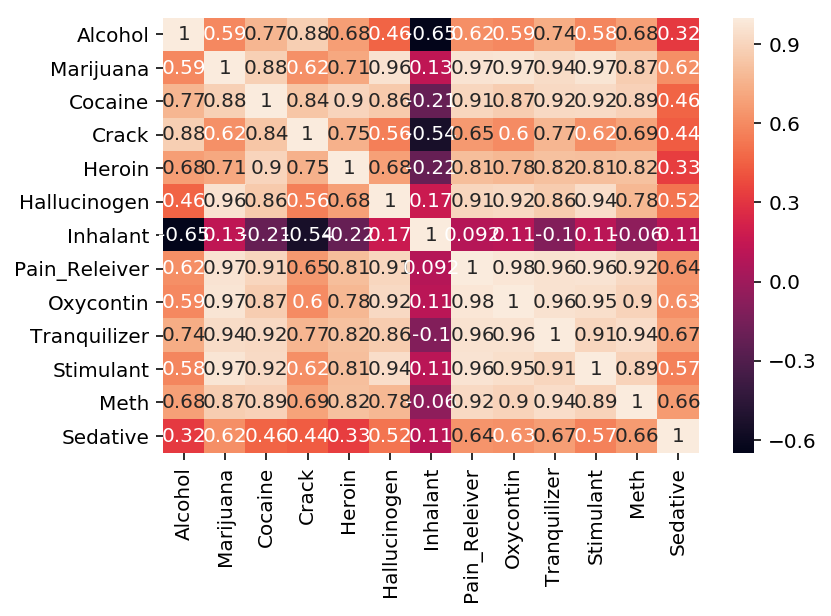

In [48]:
sns.heatmap(use.corr(),annot=True)
plt.rcParams['figure.figsize'] = (10, 10)

<div class="alert alert-block alert-info">
<b> Plot a Seaborn catplot showing the Age group Drug Use Percentge</b> 
</div>

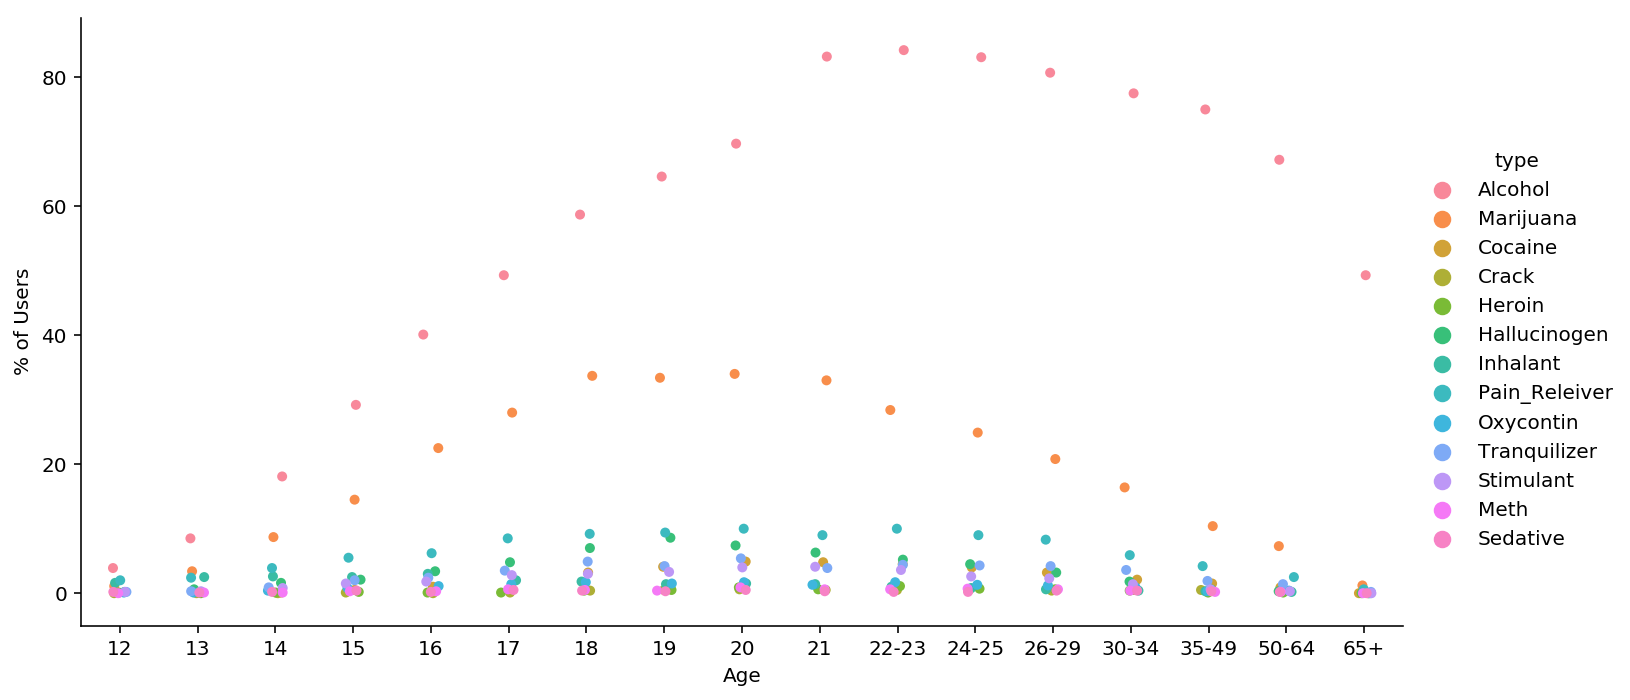

In [49]:
#Age group users % 
s_use = use.melt('Age', var_name = 'type', value_name = '% of Users')
sns.catplot(x = 'Age', y = '% of Users', hue = 'type', height = 5, aspect = 2, data = s_use)

<div class="alert alert-block alert-info">
<b> Plot a Seaborn pairplot showing the Age group Drug Use Percentge</b> 
</div>

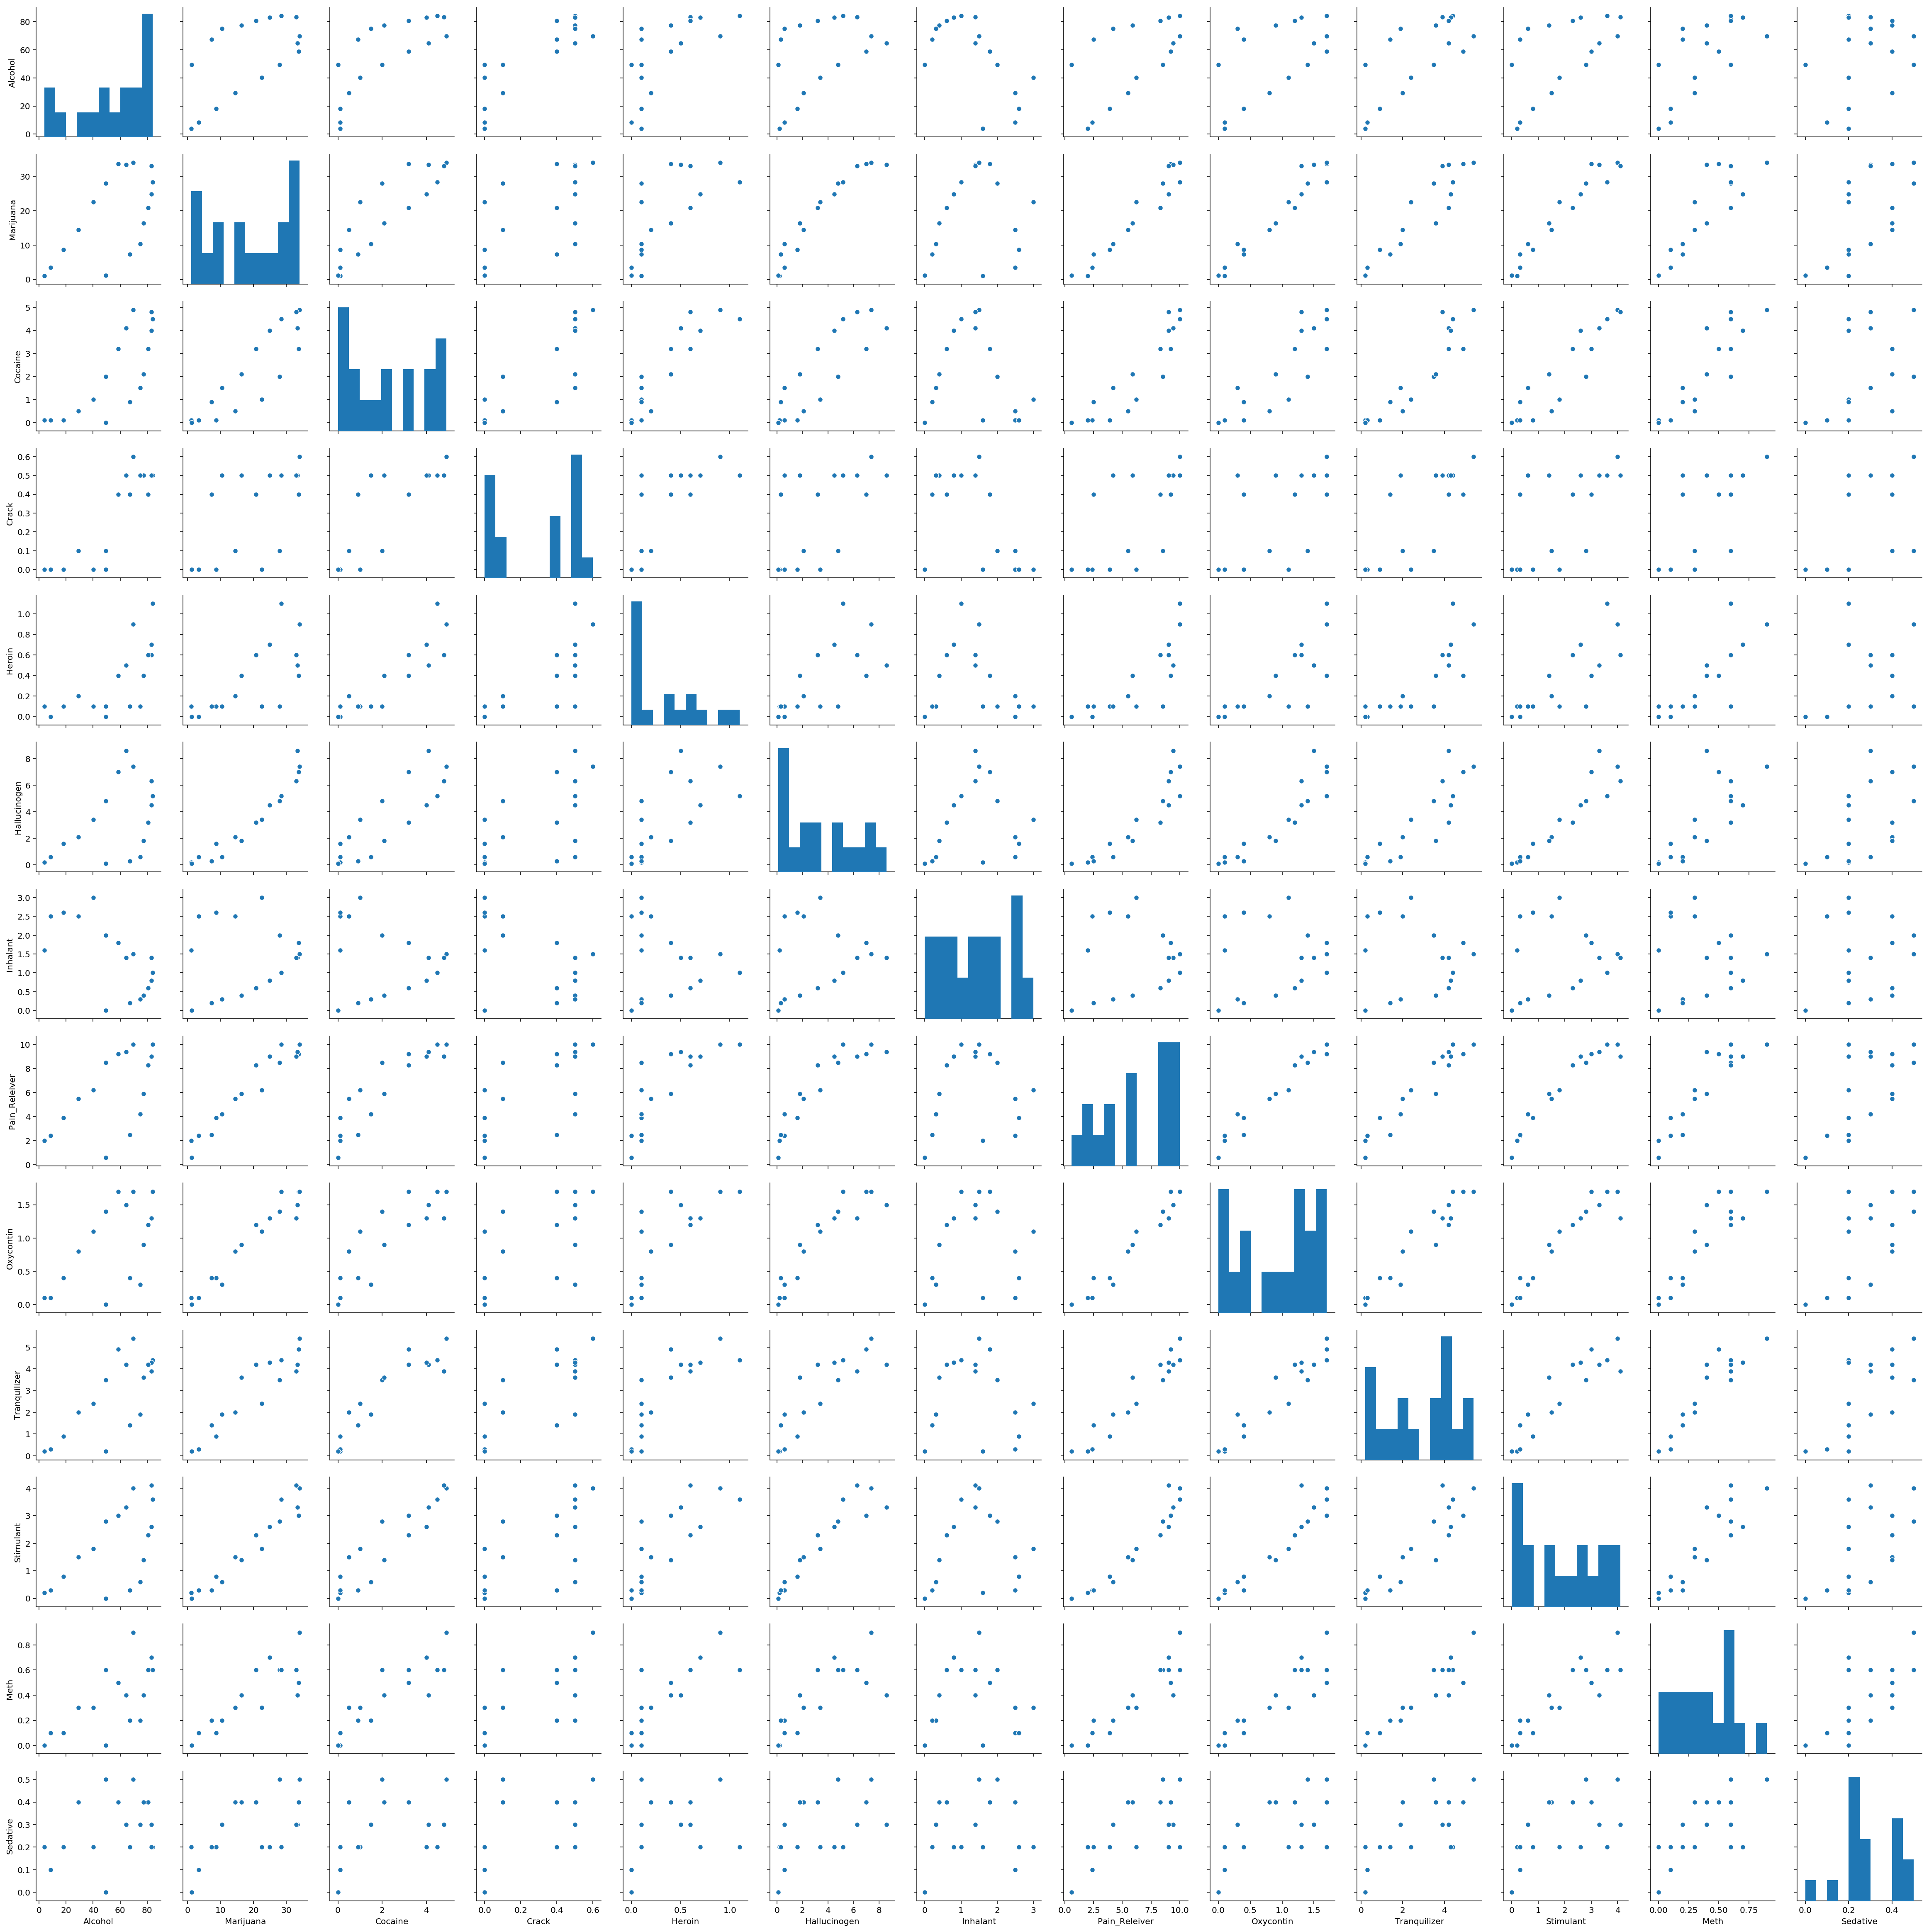

In [50]:
#PAIRPLOT: % of AGE GROUP USED
sns.pairplot(use.iloc[:,1:].fillna(0))

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pairplot the distributions of Alcohol and Marijuana
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Plot a black line showing the MEDIAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Plot a dotted red line showing the MEAN
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Plot a dotted yellow line showing the MODE
</div>

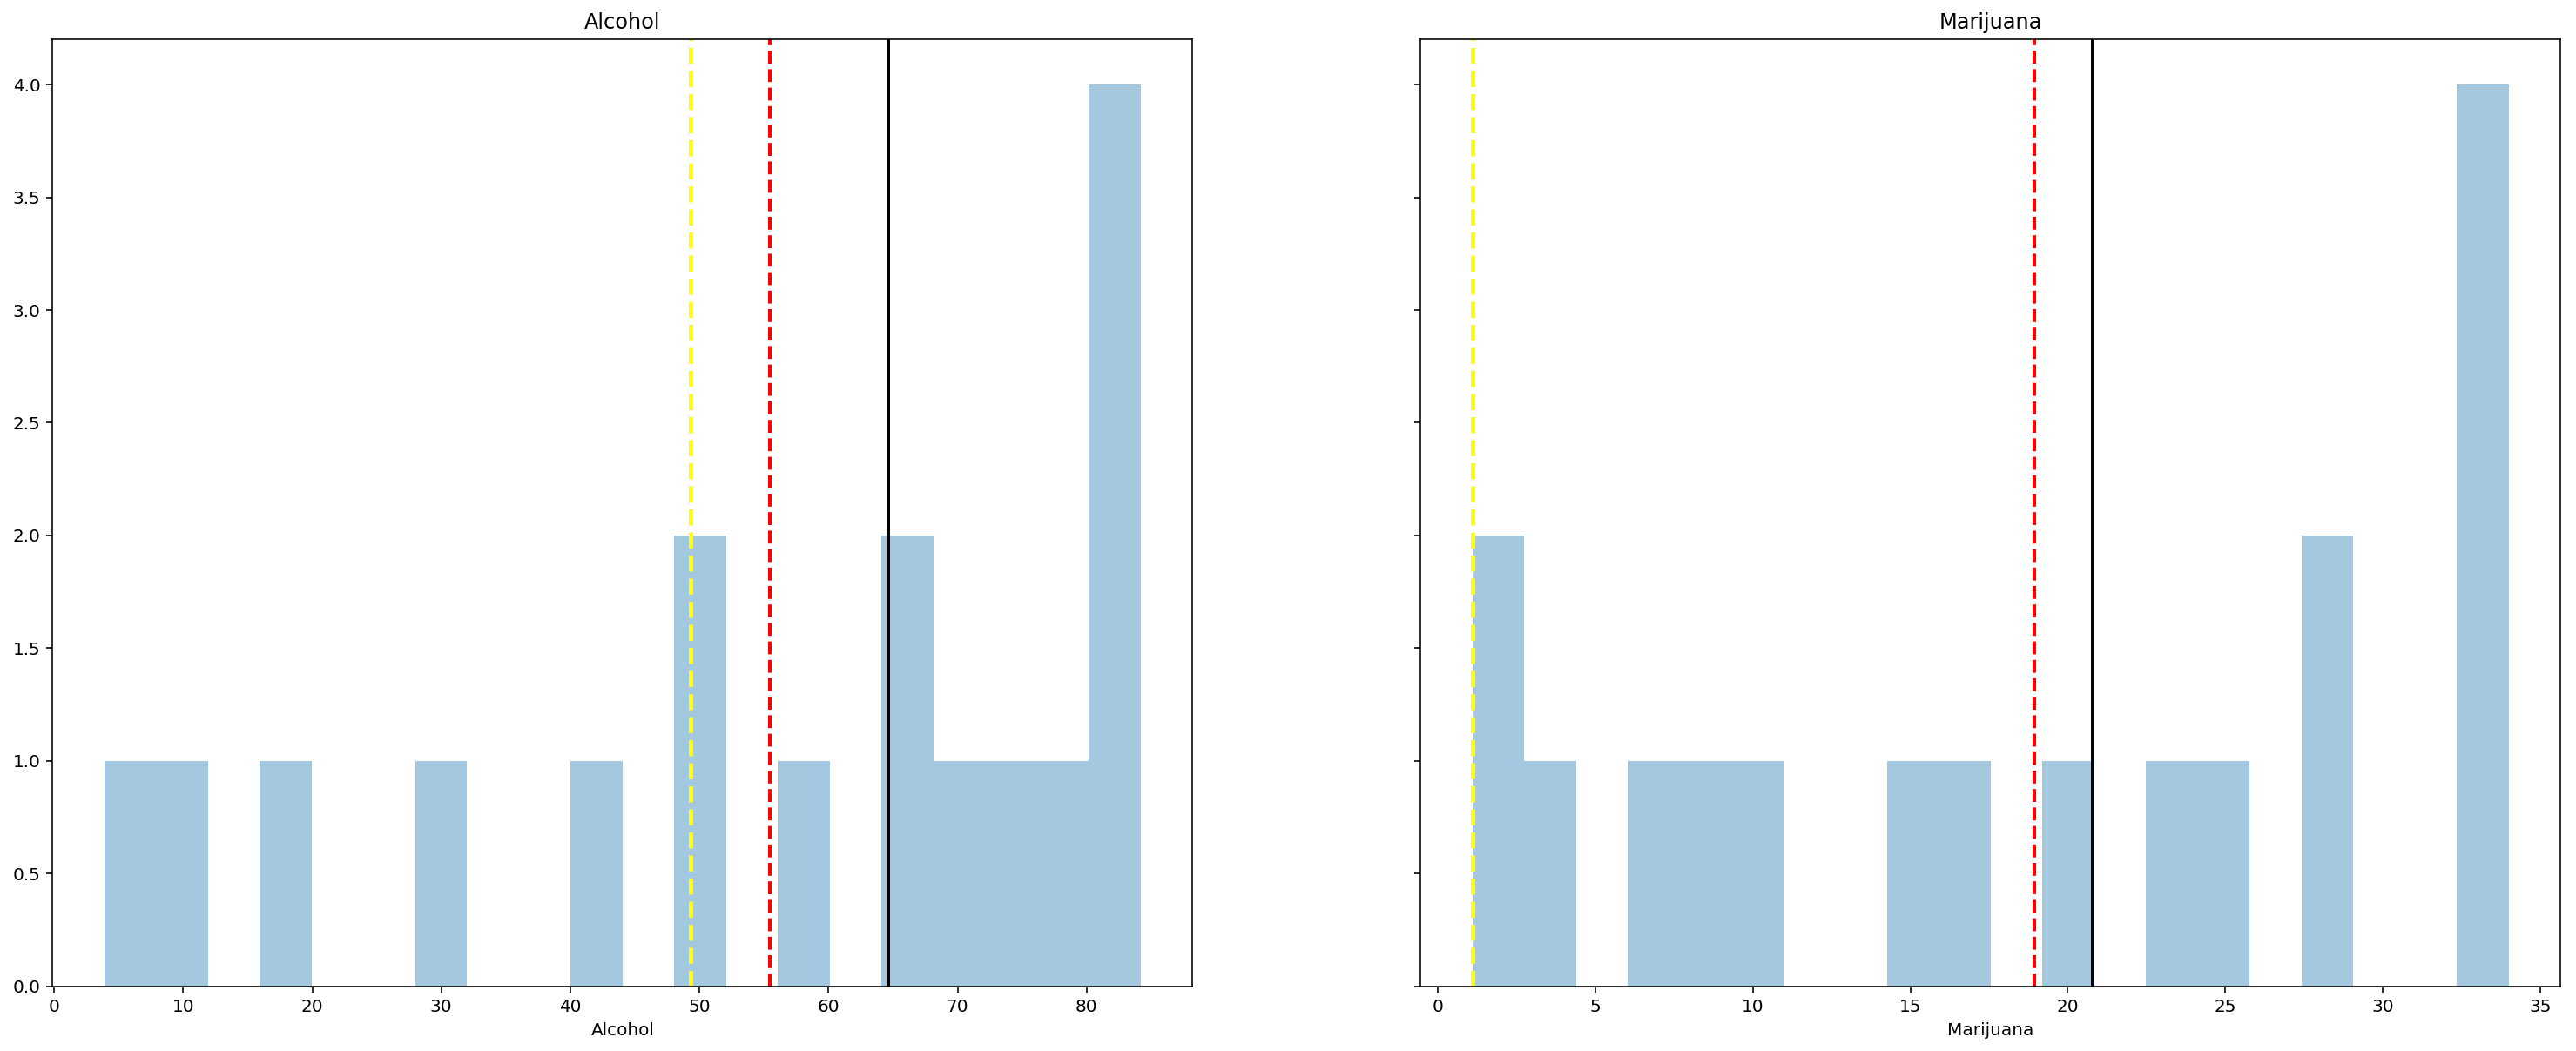

In [51]:
name = list(use.columns[1:3])                                        # Select only 'Alcohol' and 'Marijuana'
fig, ax = plt.subplots(1, 2, sharex = 'col',sharey = 'row')          # Subplot the graphs side by side
plt.subplots_adjust(left = 1,right = 3)
    
for num in range(len(name)):
    ax[num].set_title(name[num], y = 1)
    ax[num].axvline(np.median(use[name[num]]),     color = 'black',  linestyle = '-' , lw = 2)    # Median  
    ax[num].axvline(np.mean(use[name[num]]),       color = 'red',    linestyle = '--', lw = 2)    # Mean  
    ax[num].axvline(stats.mode(use[name[num]])[0], color = 'yellow', linestyle = '--', lw = 2.5)    # Mode  
    sns.distplot(use[name[num]], bins = 20, kde = False, ax = ax[num])

<div class="alert alert-block alert-info">
<b>Seaborn's</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Overlay Alcohol and Marijuana histograms
</div>

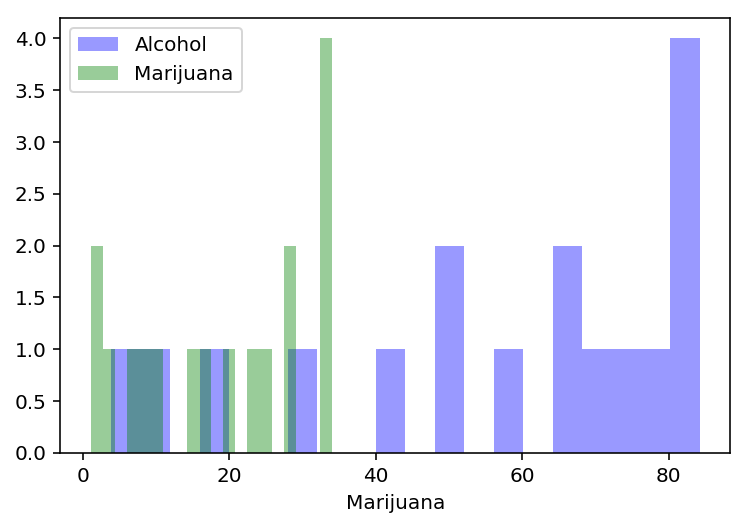

In [52]:
plt.figure(figsize = (6,4))

_ = sns.distplot(use.Alcohol,kde=False, bins=20, color ="b", label ="Alcohol")
_ = sns.distplot(use.Marijuana,kde=False, bins=20, color= "g", label = 'Marijuana')

plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Make Column names to be used</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Select all column names that have '_Use' call it drug_use_col 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Select all column names that have '_Use' call it drug_freq_col
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Select all column names but not 'Age' call it drug_names
</div>

In [53]:
# Column name variables
drug_use_col  = list(df_drug.columns[2::2])          # Select all columns '_Use'
drug_freq_col = list(df_drug.columns[3::2])          # Select all columns '_Freq'
drug_names    = list(use.columns)[1:]                # Select all column names after Age

<div class="alert alert-block alert-info">
<b>Boxplot</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Boxplot all drug Use
</div>

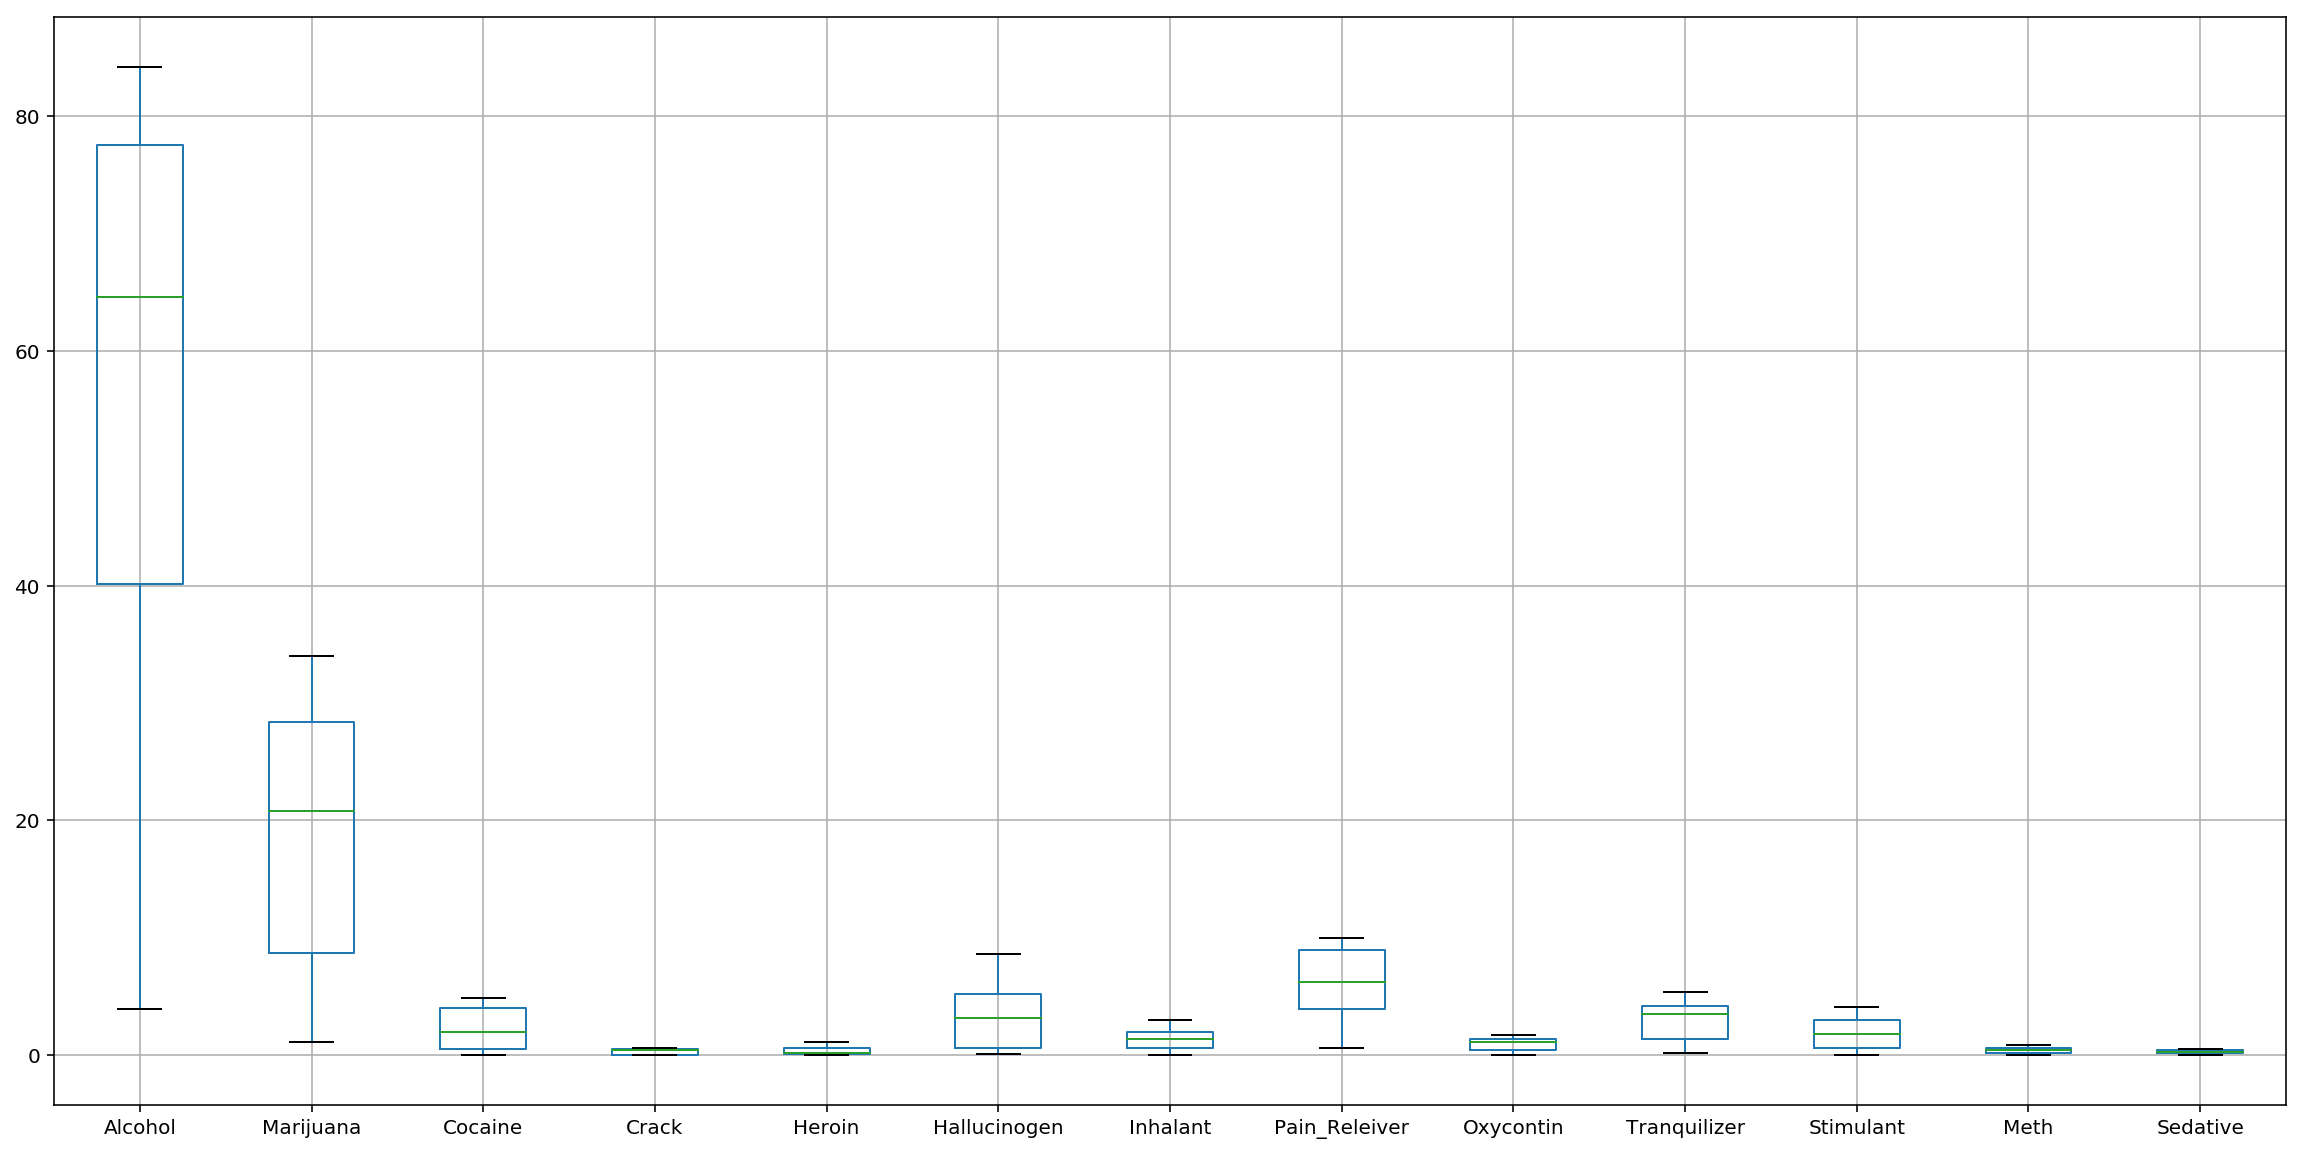

In [54]:
# BOXPLOT of Drug Use
use.boxplot(figsize=(20,10),column=drug_names)

<div class="alert alert-block alert-info">
<b>Plot the trend in Drugs</b>
</div>

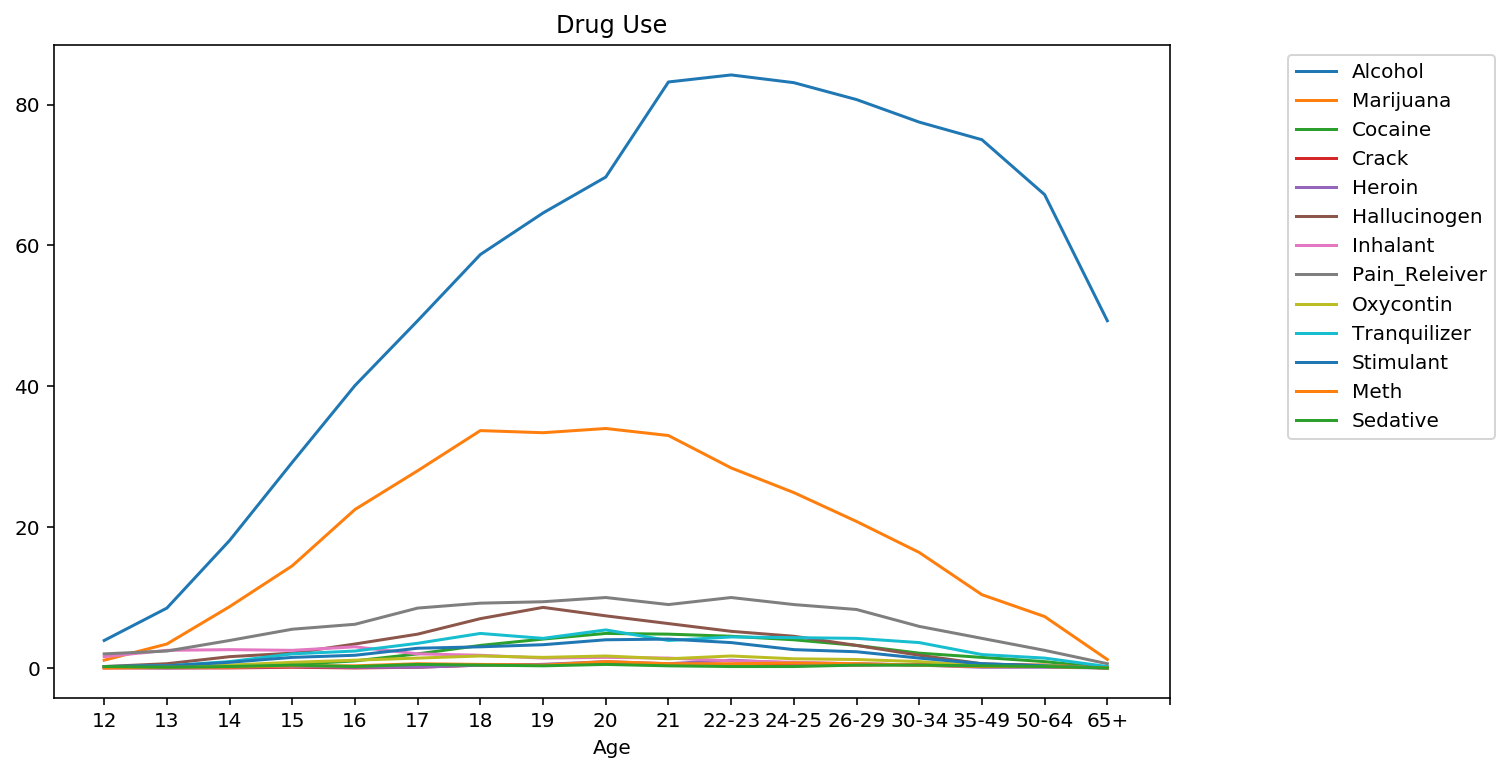

In [55]:
# Trend of Usage over Age
use[['Age'] + drug_names].set_index('Age').plot(figsize=(10,6))
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.xticks(range(0,18), list(use['Age']))
plt.title('Drug Use');

<div class="alert alert-block alert-info">
<b>Standardize to see a closer trend </b>
<br>1. Standardize Use value
<br>2. Line Plot the standardize Use value
</div>

In [56]:
#standardize
drug_use = use[['Age'] + drug_names].set_index('Age')          # Gather all the Age and Drug name
for col in drug_use.columns:                                   # Read thru the drug_use.columns
    data = drug_use[col].values                                # store all the values for each column
    data_mean = np.mean(data)                                  # Calc MEAN using np.mean and store it a a variable
    data_std = np.std(data)                                    # Calc STD using np.std and store it a a variable
    data_stand = (data - data_mean) / data_std                 # Get Standardization by (data - data-mean)/data.std
    drug_use[col] = data_stand                                 # Replace the use colomn value with calculated standardize 

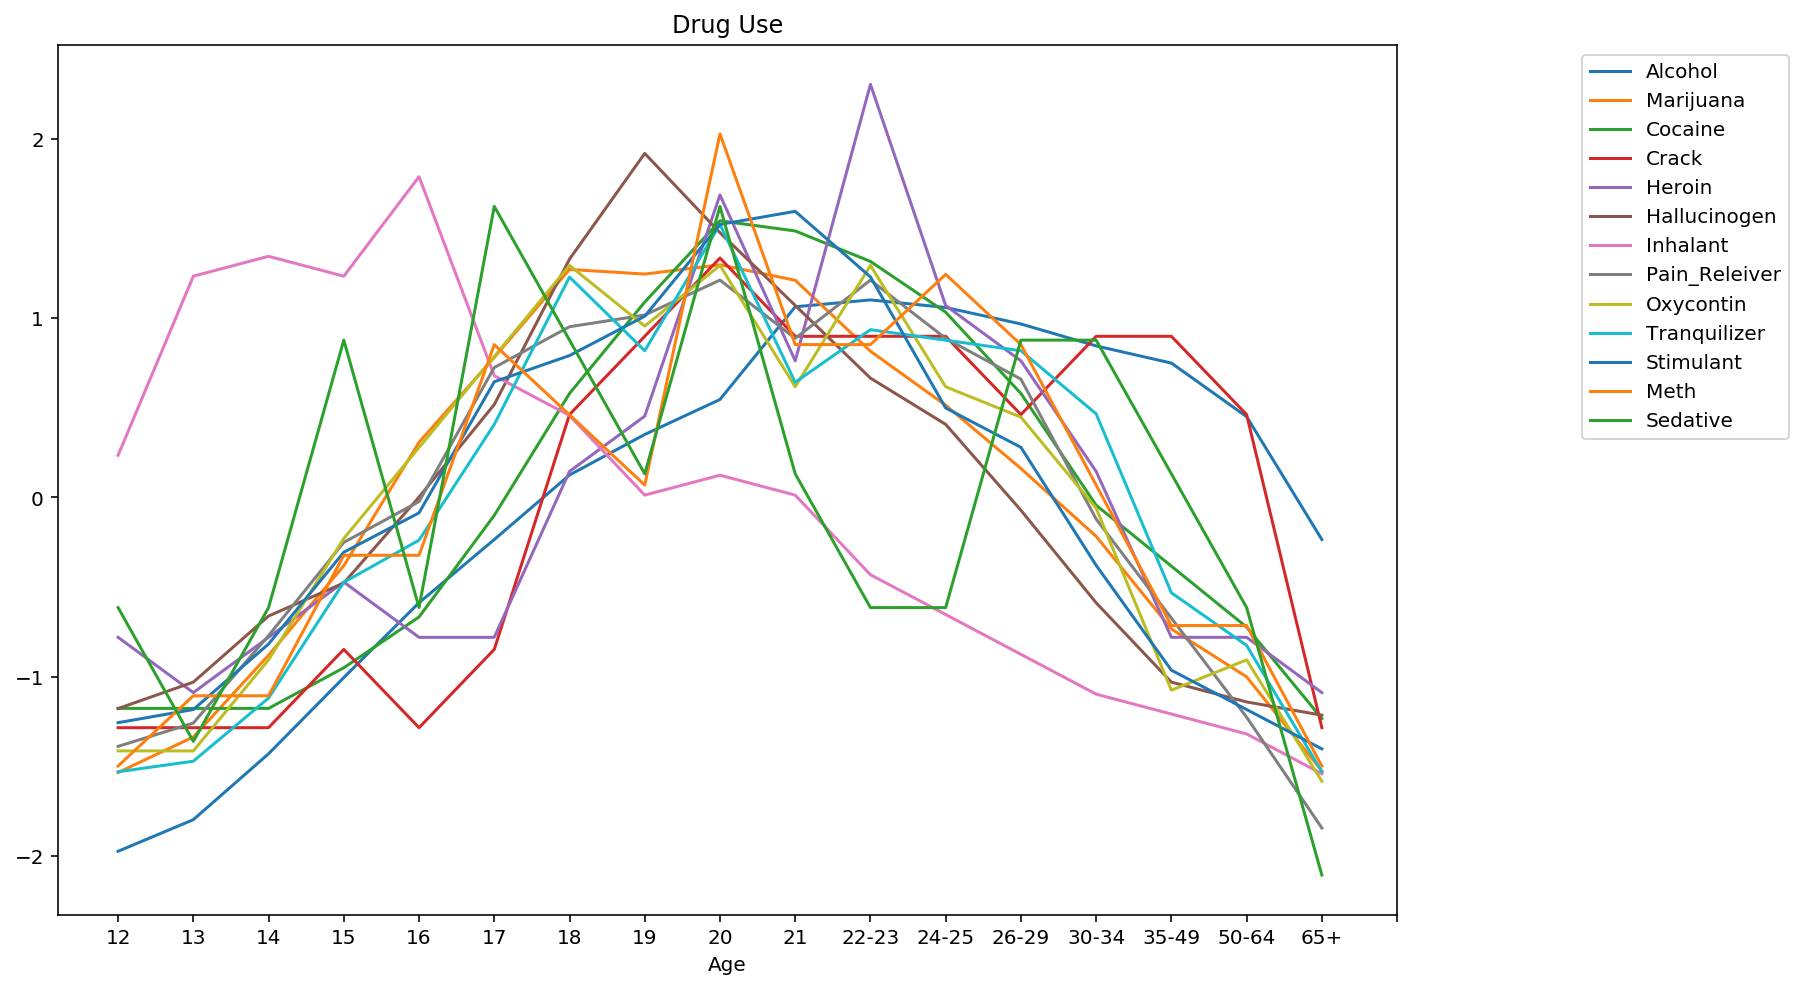

In [57]:
drug_use.plot(figsize=(12,8))
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.xticks(range(0,18), list(use['Age']))
plt.title('Drug Use');

<div class="alert alert-block alert-warning">
<b>By observing the above plot you can see a trend appearing</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;There seems to be a high drug abuse trend from the age 12
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;A spike at age of age 19
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;A similar spike for different drugs between age 30-64
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.&nbsp;&nbsp;&nbsp;Tends to reduce at age 64+
</div>

<div class="alert alert-block alert-info">
<b>Standardize to see a closer trend </b>
<br>1. Standardize Freq value
<br>2. BoxPlot the standardize Freq value
</div>

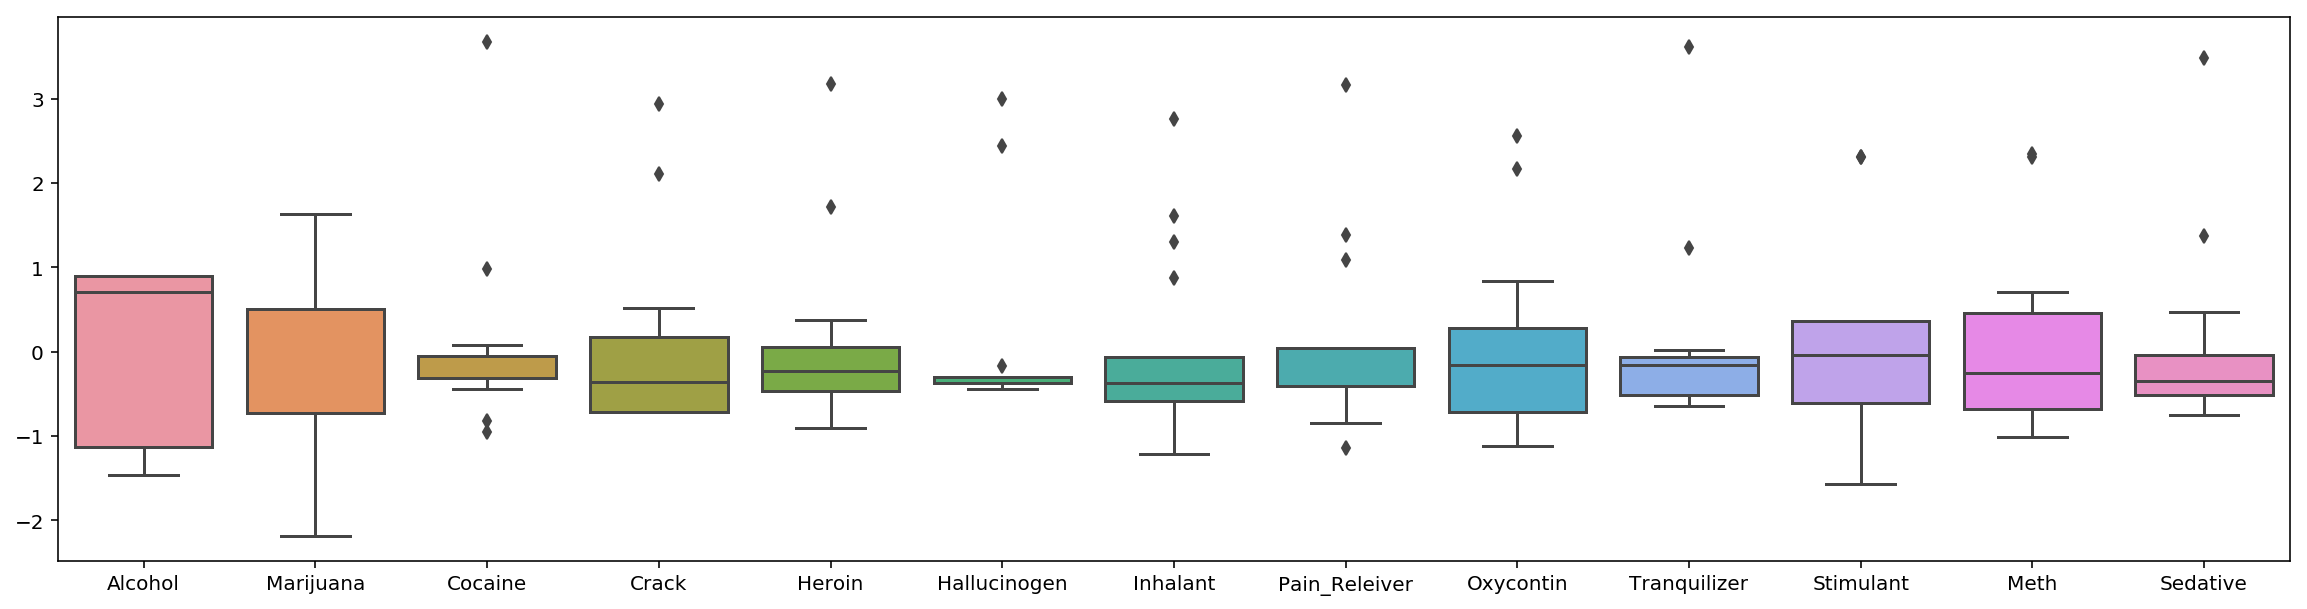

In [58]:
#PLOT STANDARDIZED BOXPLOT
df_box = freq.iloc[:, 1:]
for a, b in df_box.items():
    avg = df_box[a].mean()
    std = np.std(df_box[a])
    df_box[a] = df_box[a].map(lambda b: (b-avg) / std)                  #(Value - Mean) / STD
fig = plt.figure(figsize = (20, 5))
sns.boxplot(data = df_box, ax = fig.gca())

<div class="alert alert-block alert-info">
<b>Relationship between the drug usage and frequency</b>
<br>1. Plot a heatmap for each drug
<br>2. Plot a Bar graph for each drug
</div>

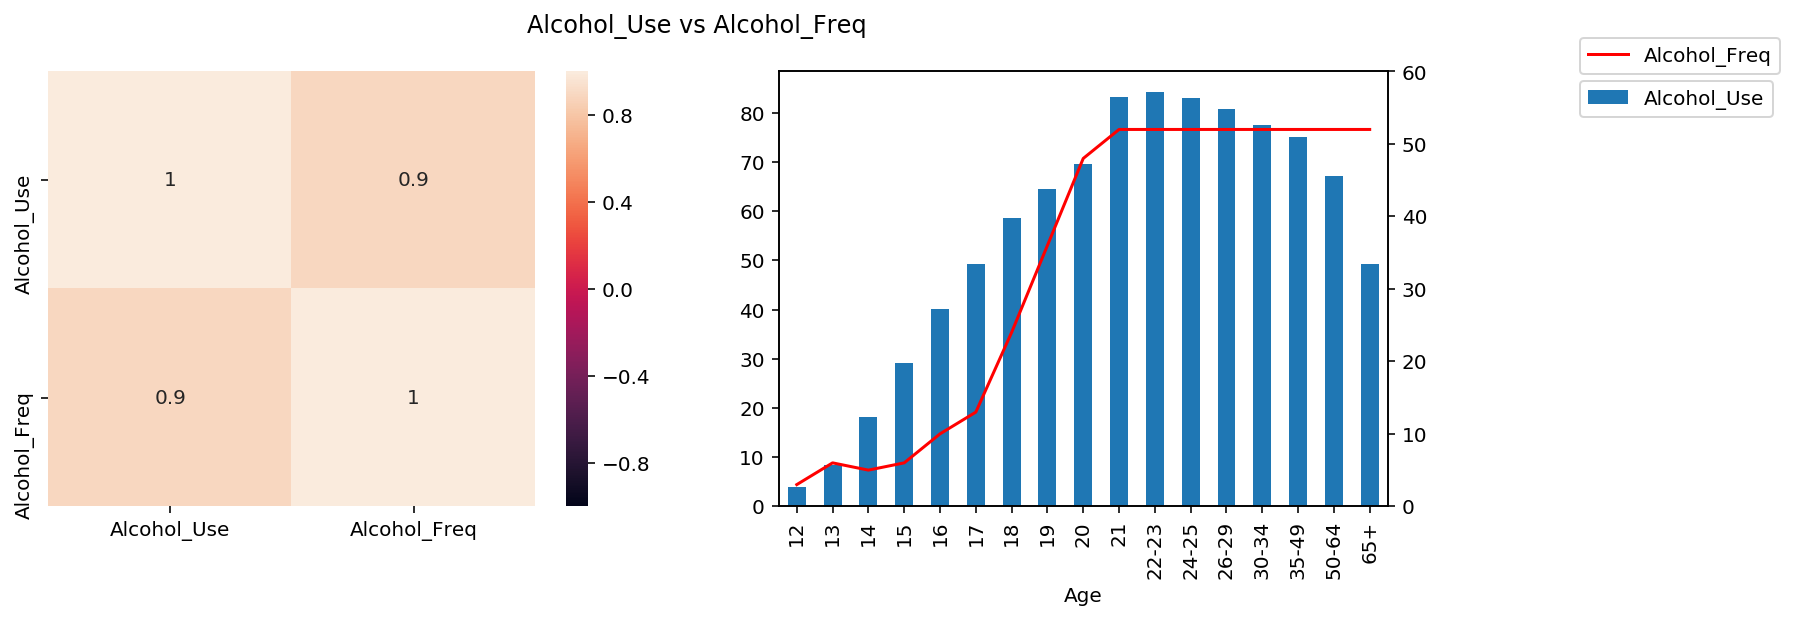

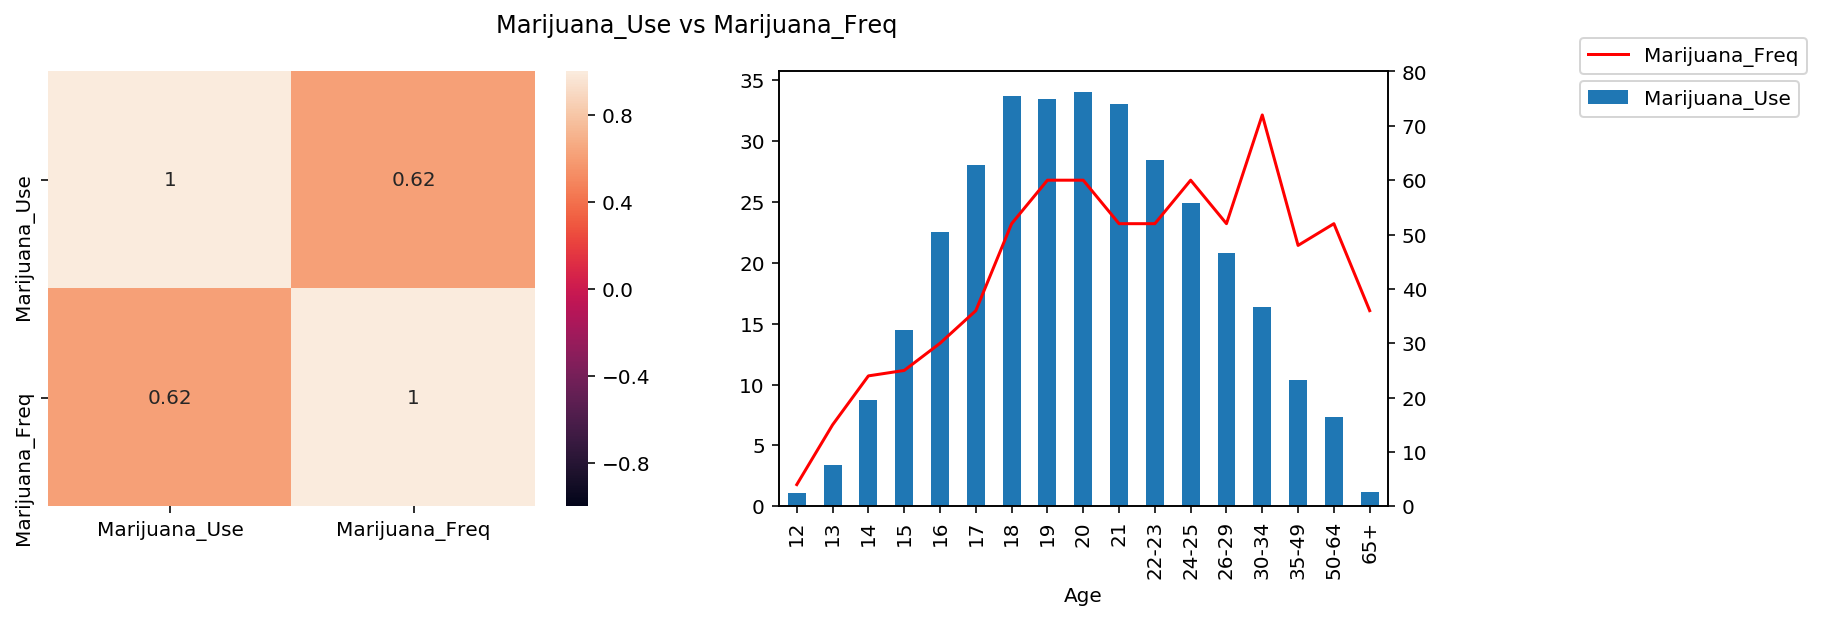

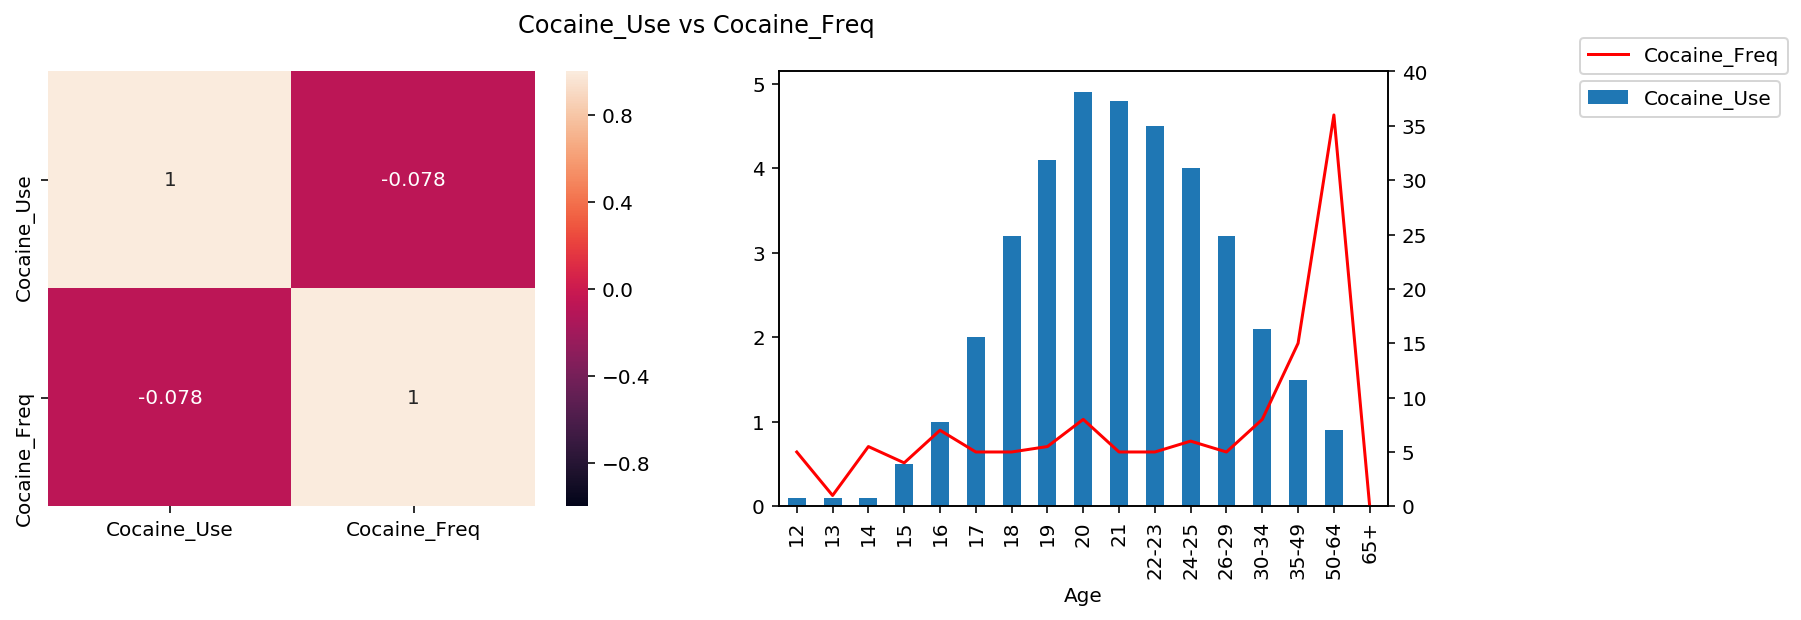

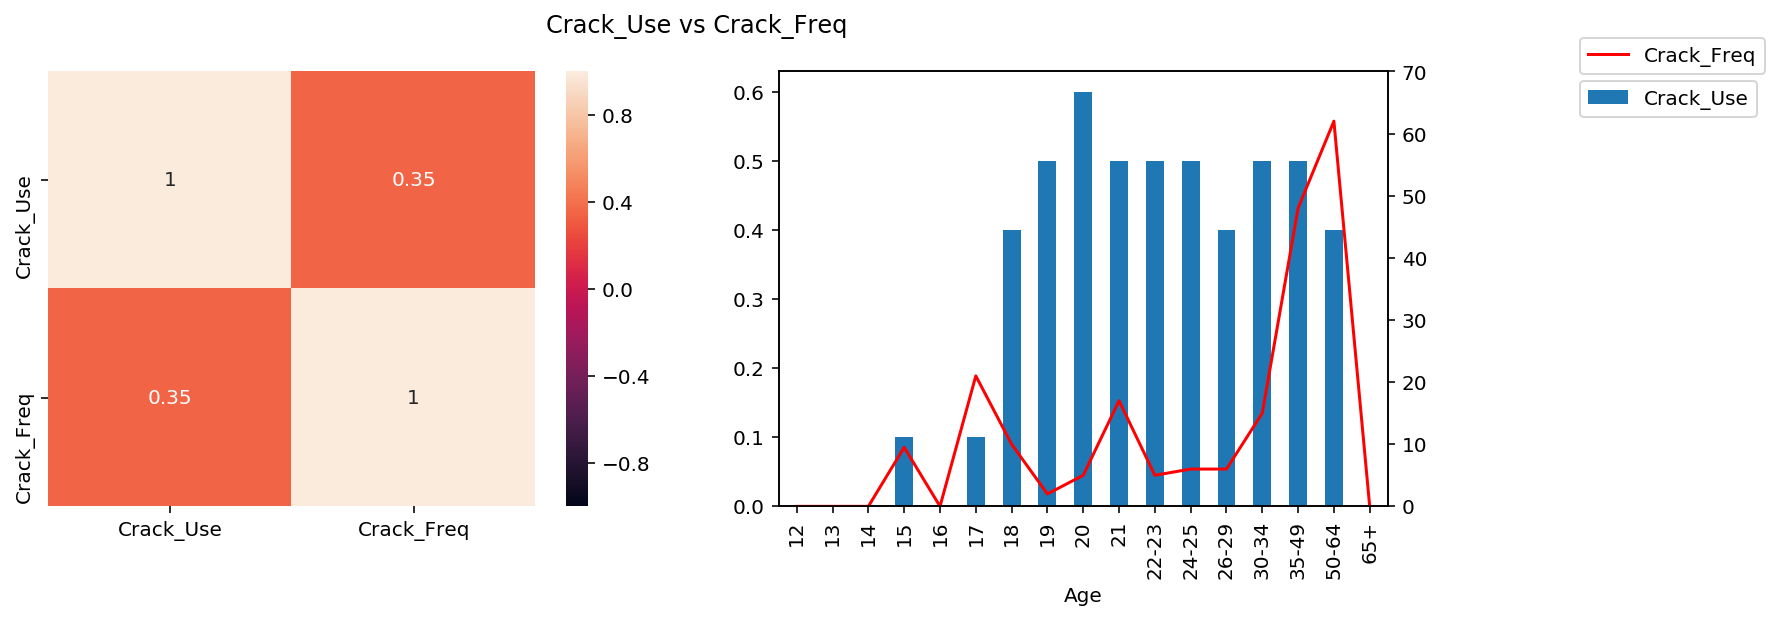

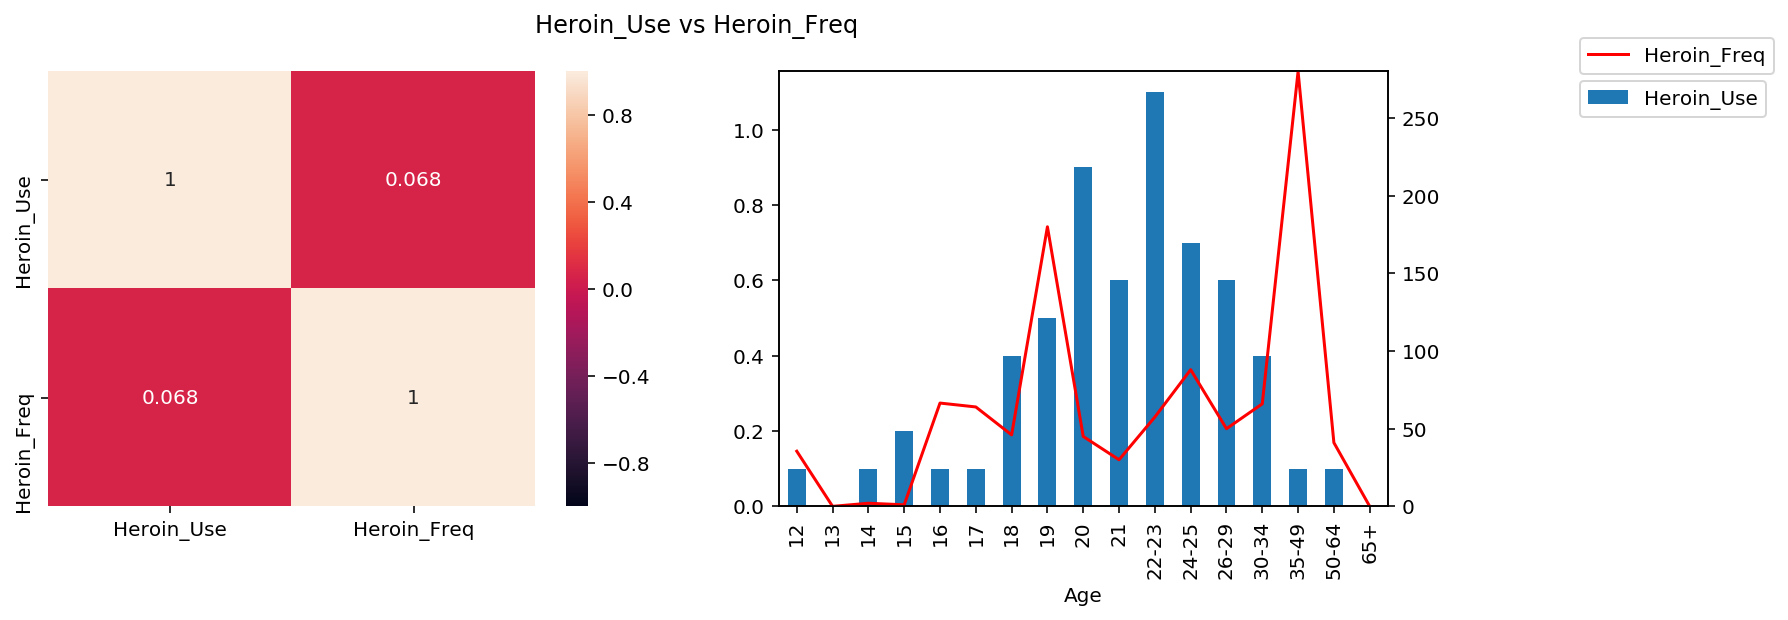

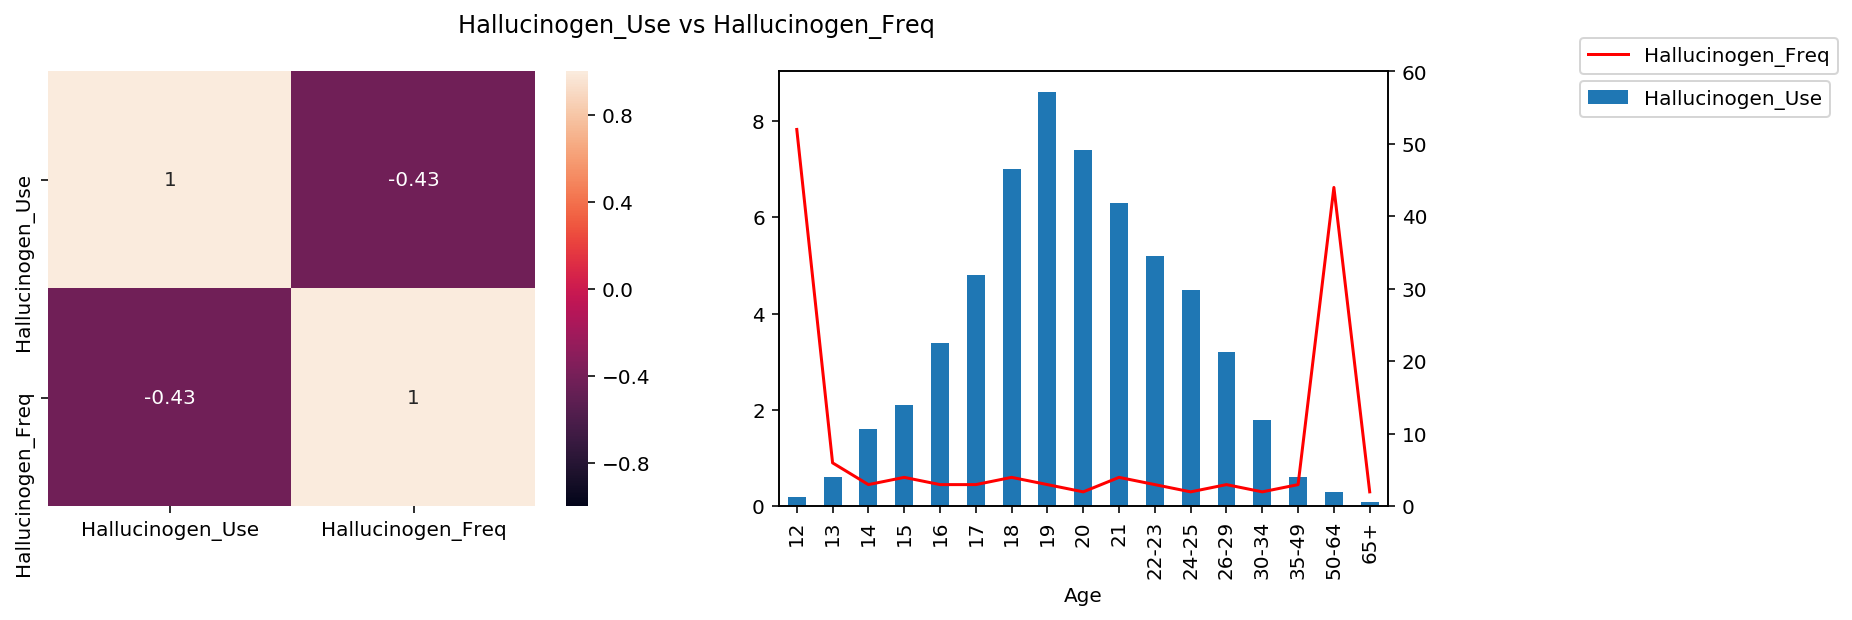

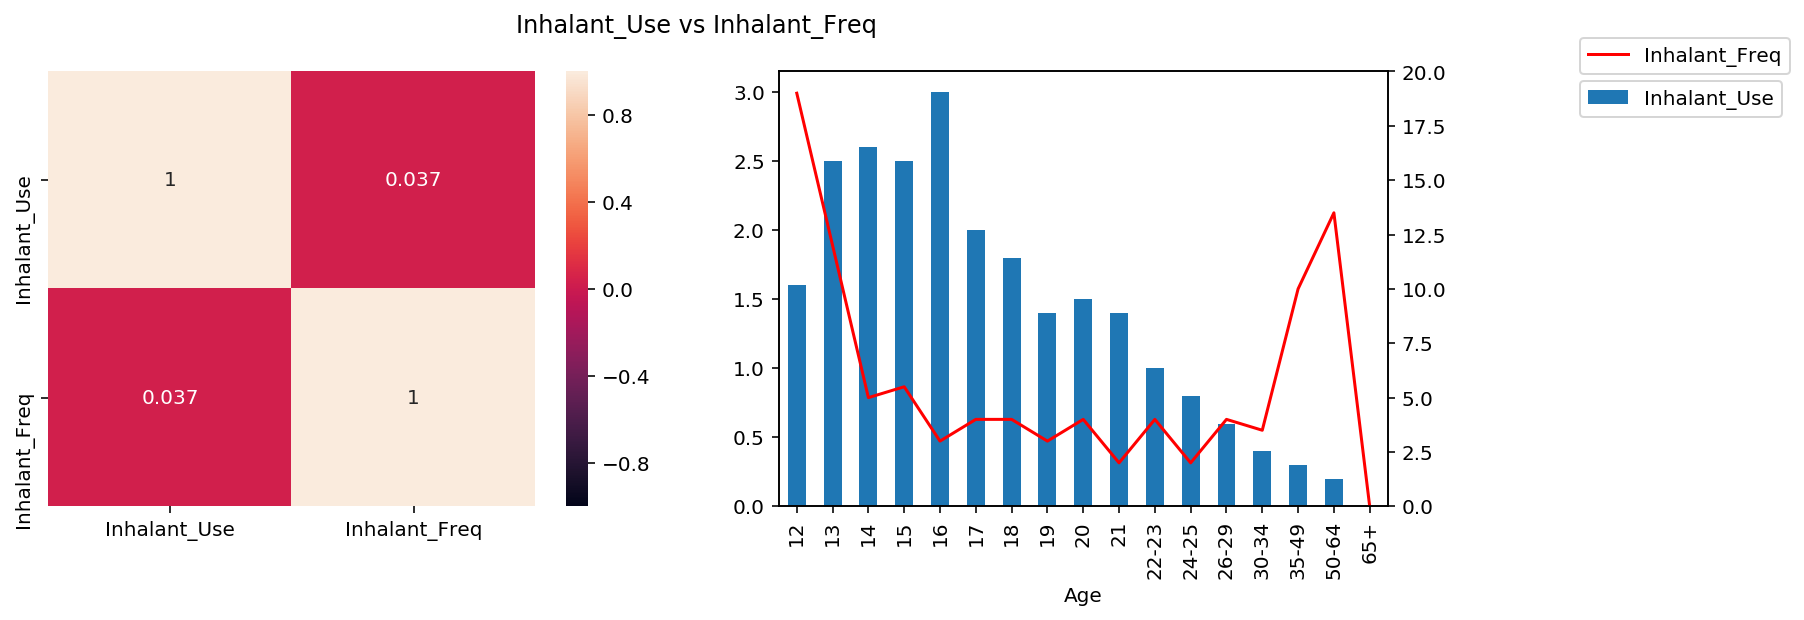

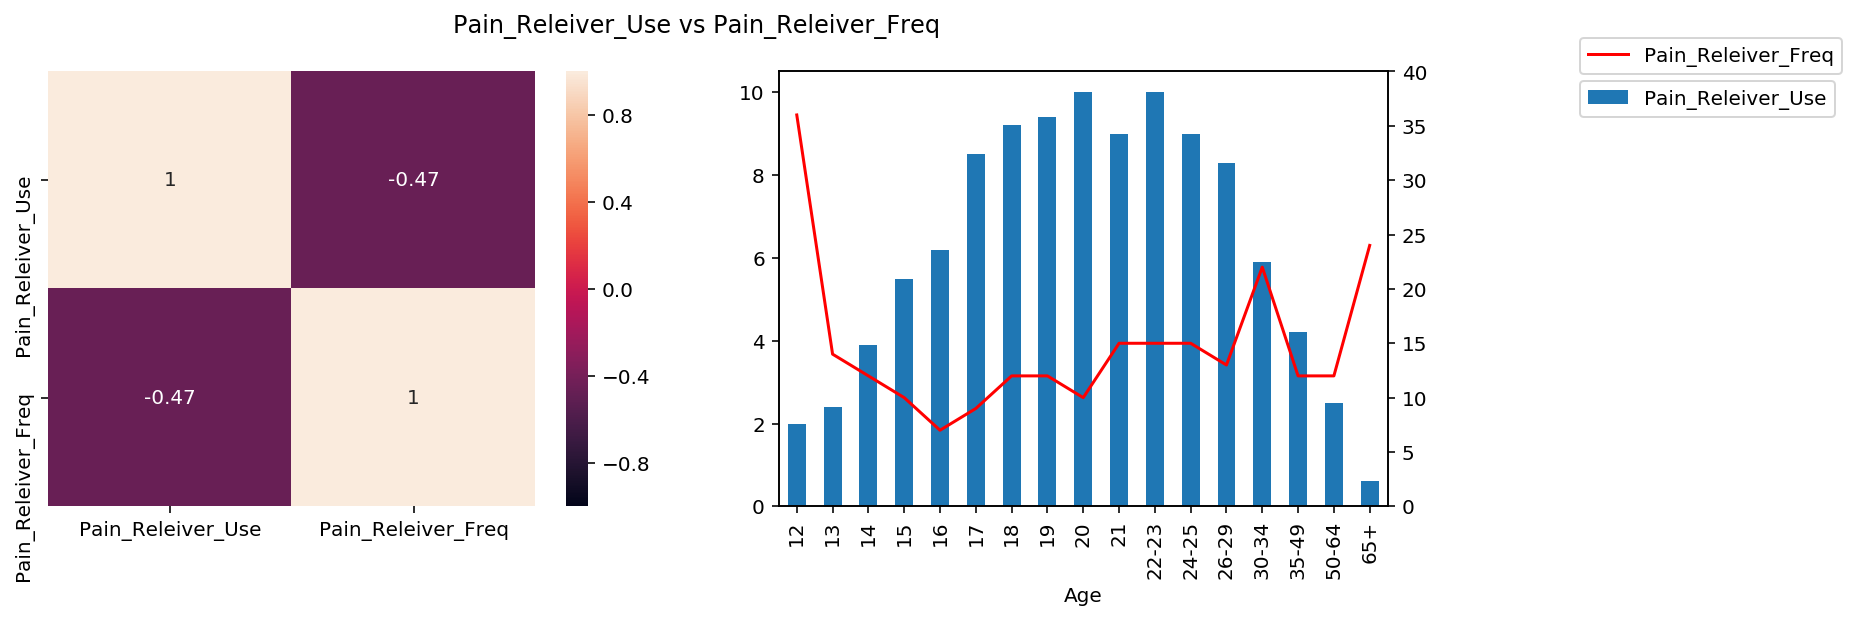

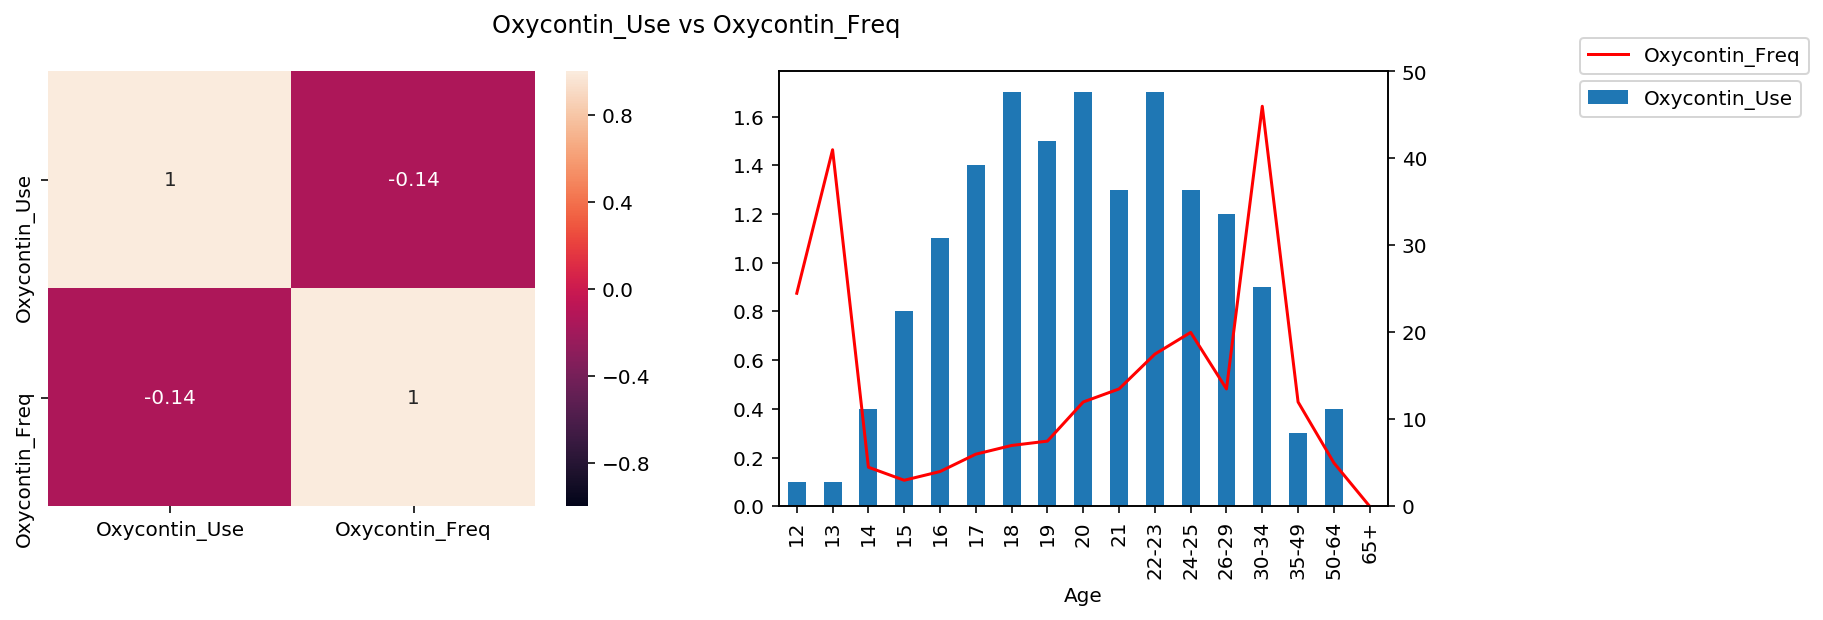

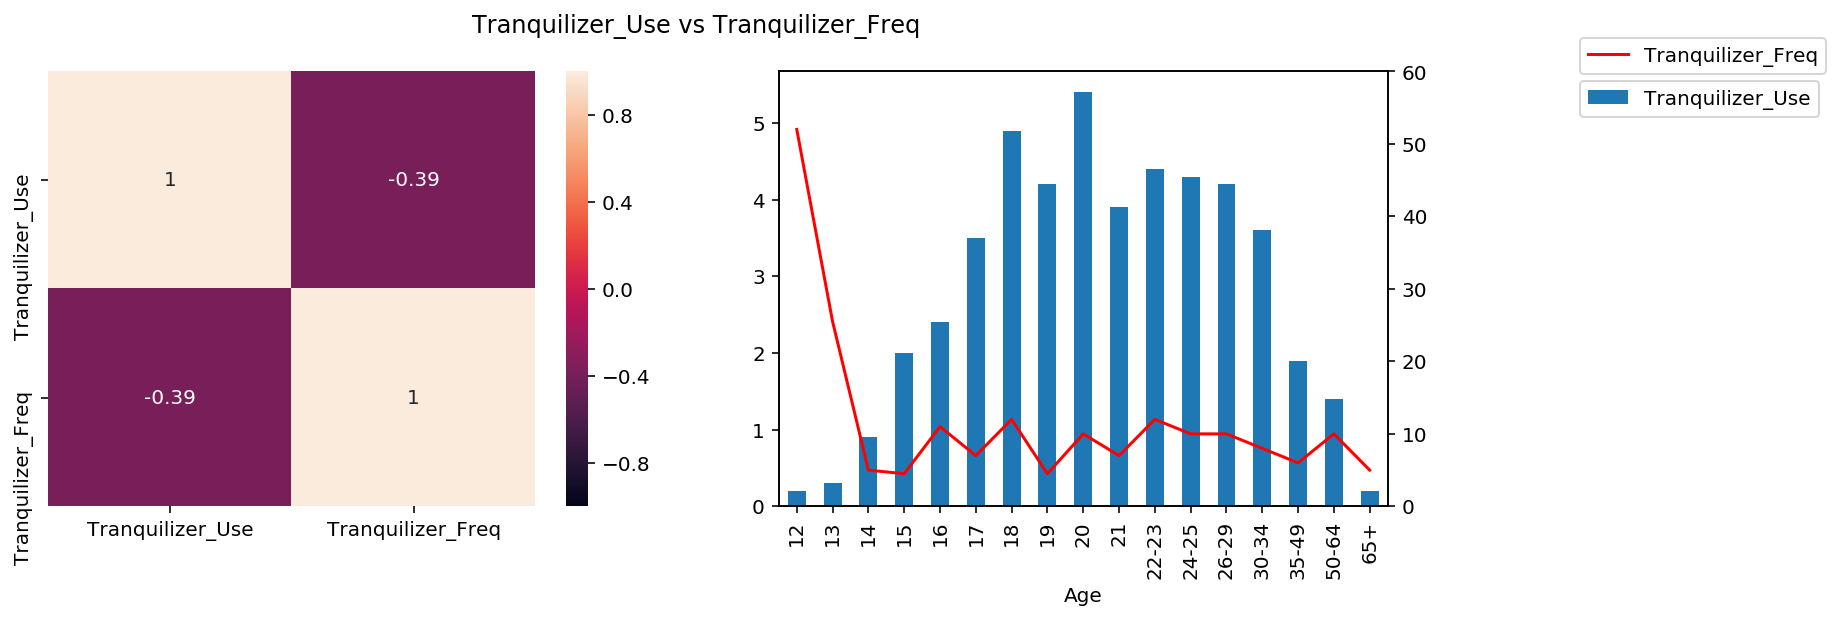

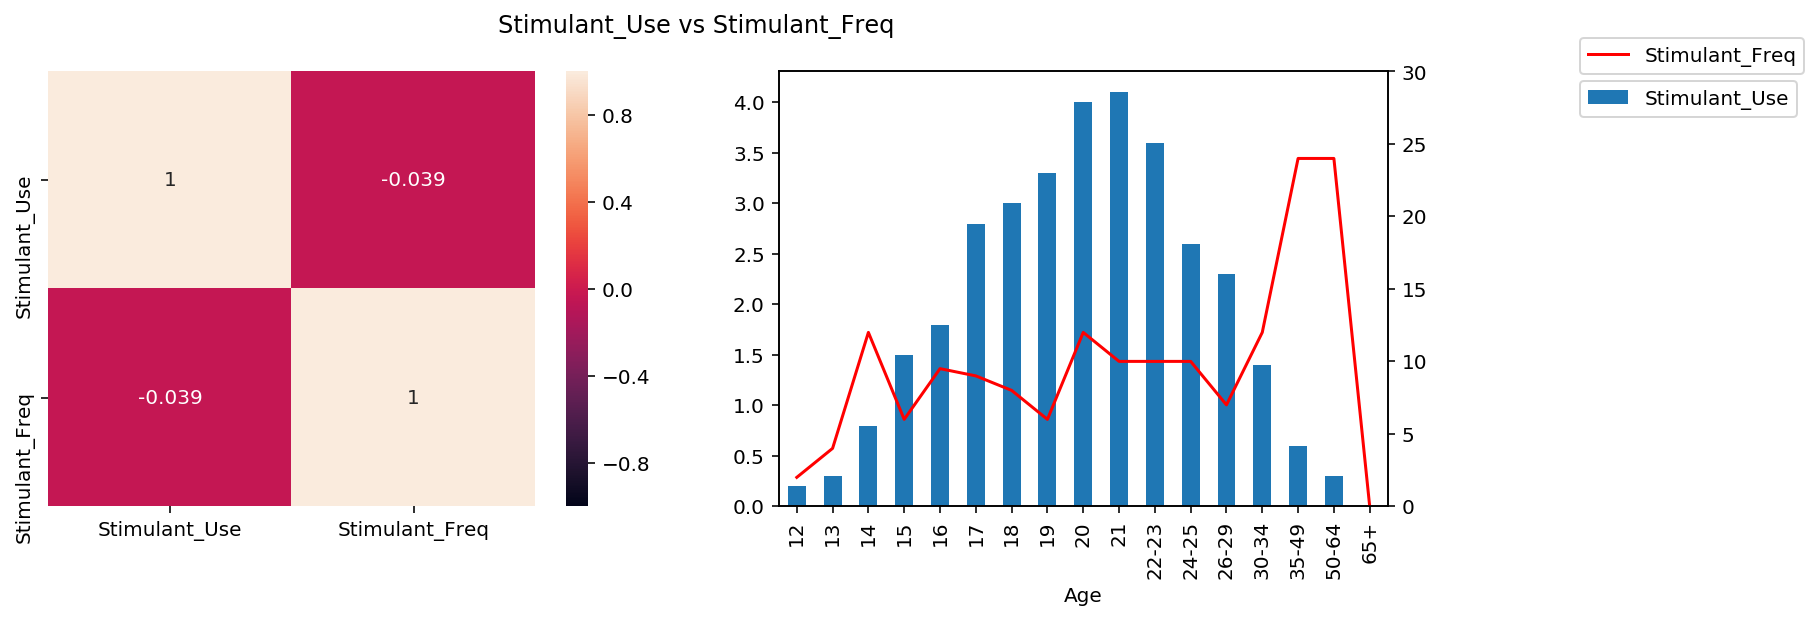

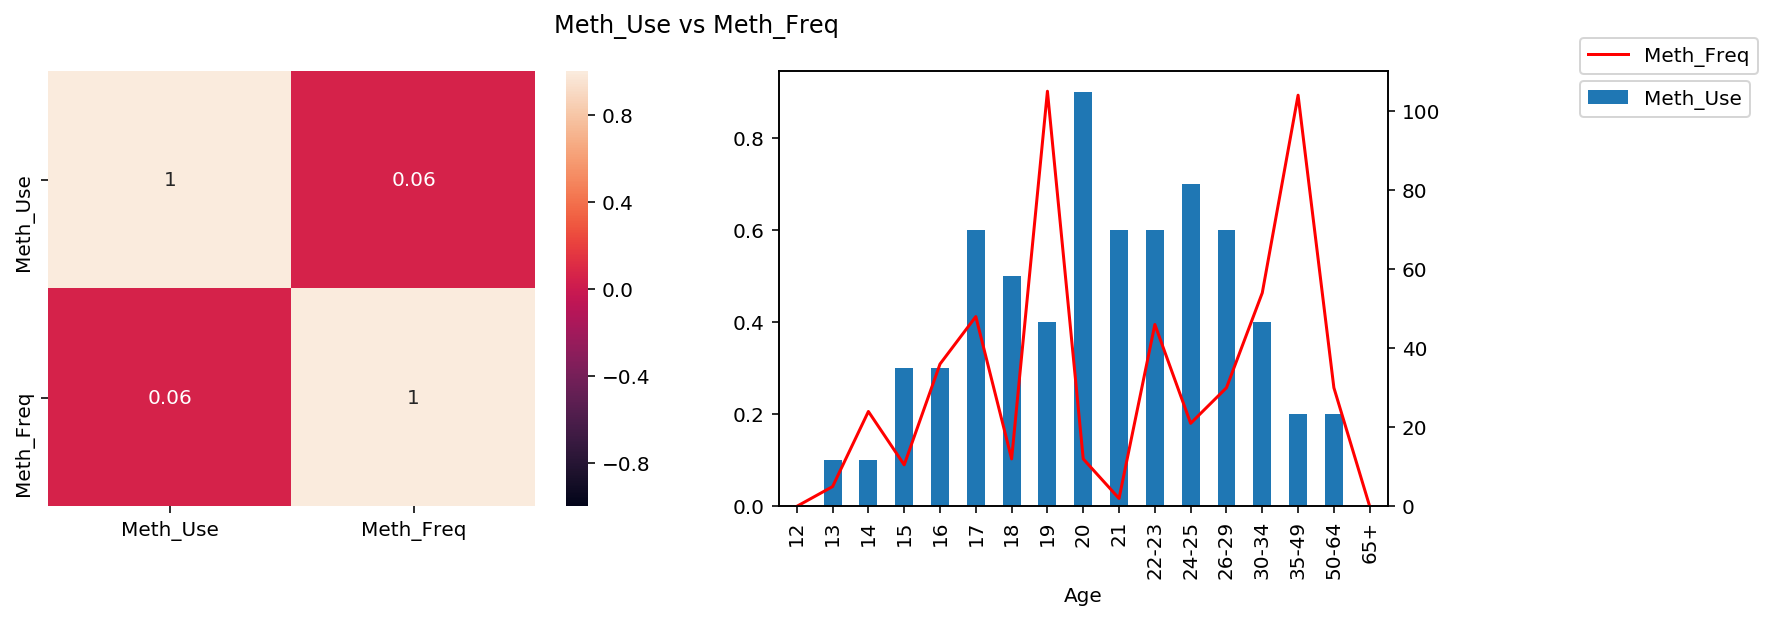

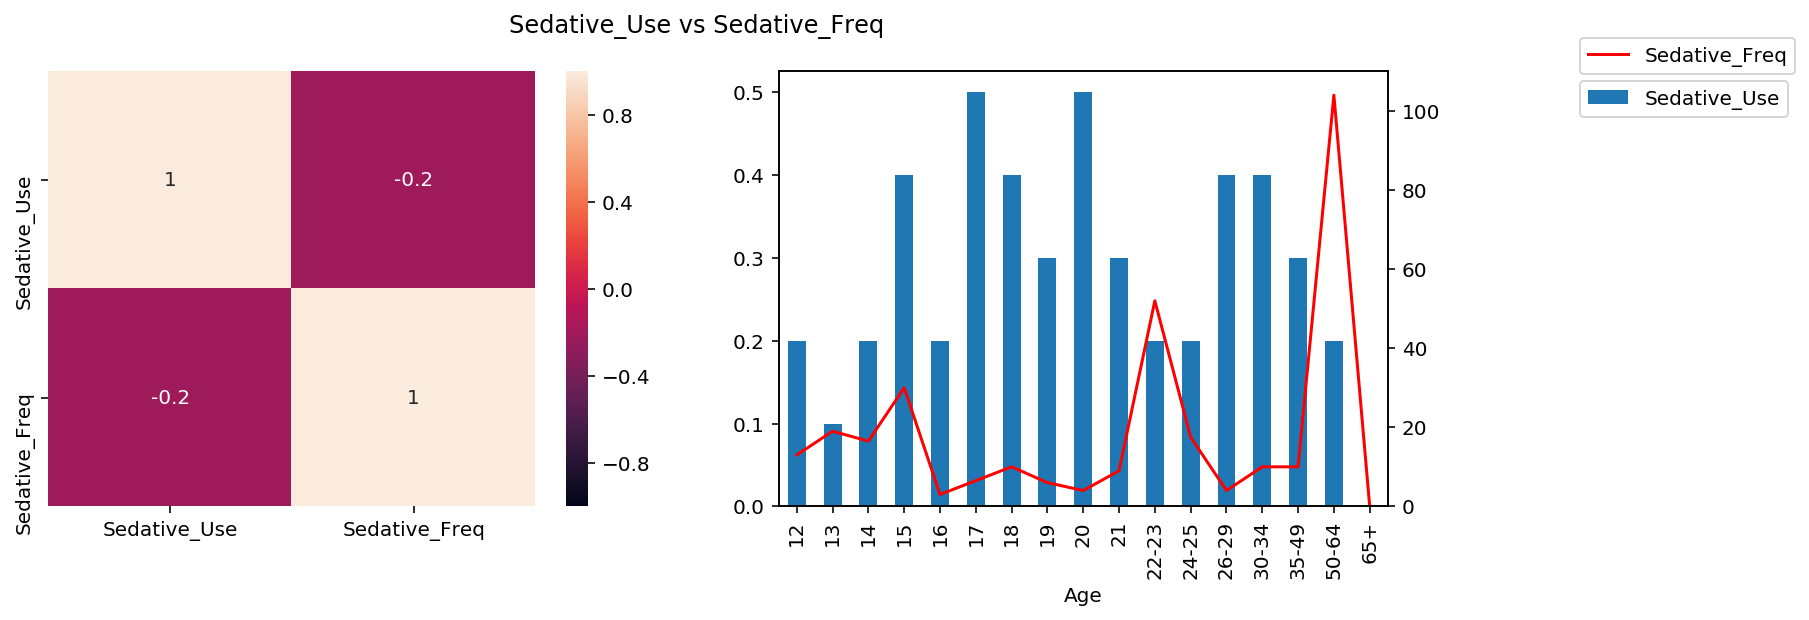

In [59]:
# Want to see the relationship between the drug usage and it's frequency. 
for i in range(len(drug_use_col)):
    #Set the plot figure + Title 
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (12,4))
    plt.suptitle('{} vs {}'.format(drug_use_col[i],drug_freq_col[i]))
    
    # Plot the correlation heat map on the left subplot 
    sns.heatmap(df_drug[[drug_use_col[i],drug_freq_col[i]]].corr(),annot=True,vmin=-1.,vmax=1.,ax=axes[0])
    
    #to define round up function to define the axis  
    def roundup(x):
        return int(np.ceil(x/10.))*10
    
    # Plot the trend across the ages on the right subplot 
    df_drug[['Age',drug_use_col[i]]].set_index('Age').plot(kind='bar',ax=axes[1])
    ax3 = axes[1].twinx()   # instantiate a second axes that shares the same x-axis
    axes[1].legend(loc='upper left', bbox_to_anchor=(1.3,1))
    
    df_drug[['Age',drug_freq_col[i]]].set_index('Age').plot(ax=ax3,color='r')
    ax3.set_ylim([0, roundup(max(df_drug[drug_freq_col[i]]))]) #reset seconday y axis
    ax3.legend(loc='upper left', bbox_to_anchor=(1.3,1.1))

<div class="alert alert-block alert-warning">
<b>By observing the above plots of Use and Frequency</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Alcohol Use and Frequency have a strong correlation compared to all others, Marijuana seems to come next
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Drug trend starts at early ages spikes and then at 50+
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Frequency of Heroin and Meth seems to be a trend for ages 19+
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.&nbsp;&nbsp;&nbsp;Marijuana frequency tends to increase in age
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5.&nbsp;&nbsp;&nbsp;Alcohol frequency seems to increase steadly till 21 and then maintain its frequency
</div>

<div class="alert alert-block alert-info">
<b>Correlation Matrix</b>
<br>1. Plot a heatmap for Drug Frequencies
<br>2. Plot a heatmap for Drug Use
</div>

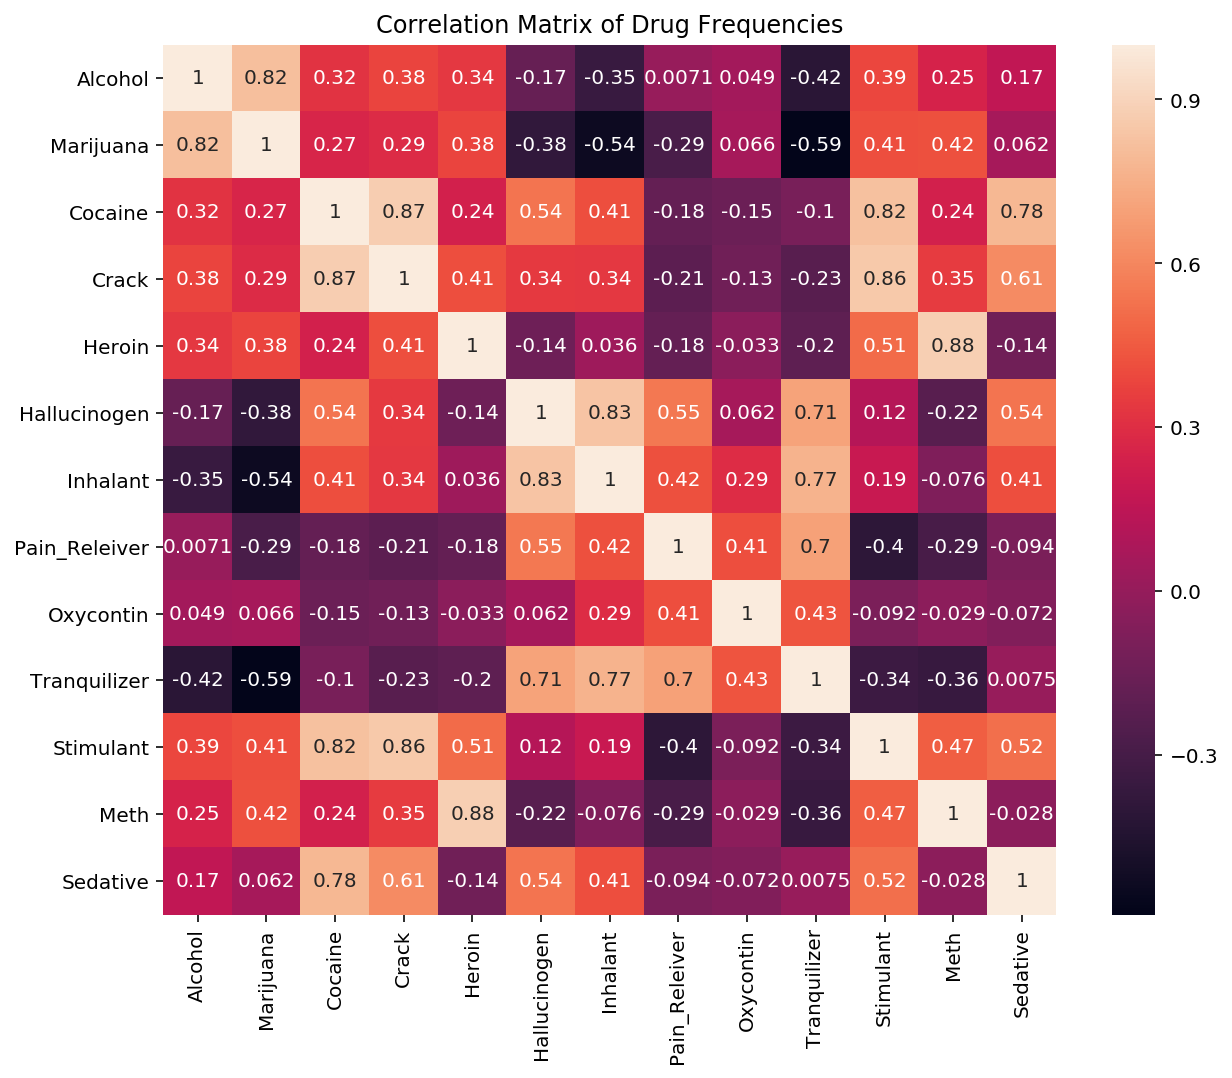

In [60]:
plt.figure(figsize = (10,8))
plt.title('Correlation Matrix of Drug Frequencies')

sns.heatmap(freq[drug_names].corr(),annot=True);

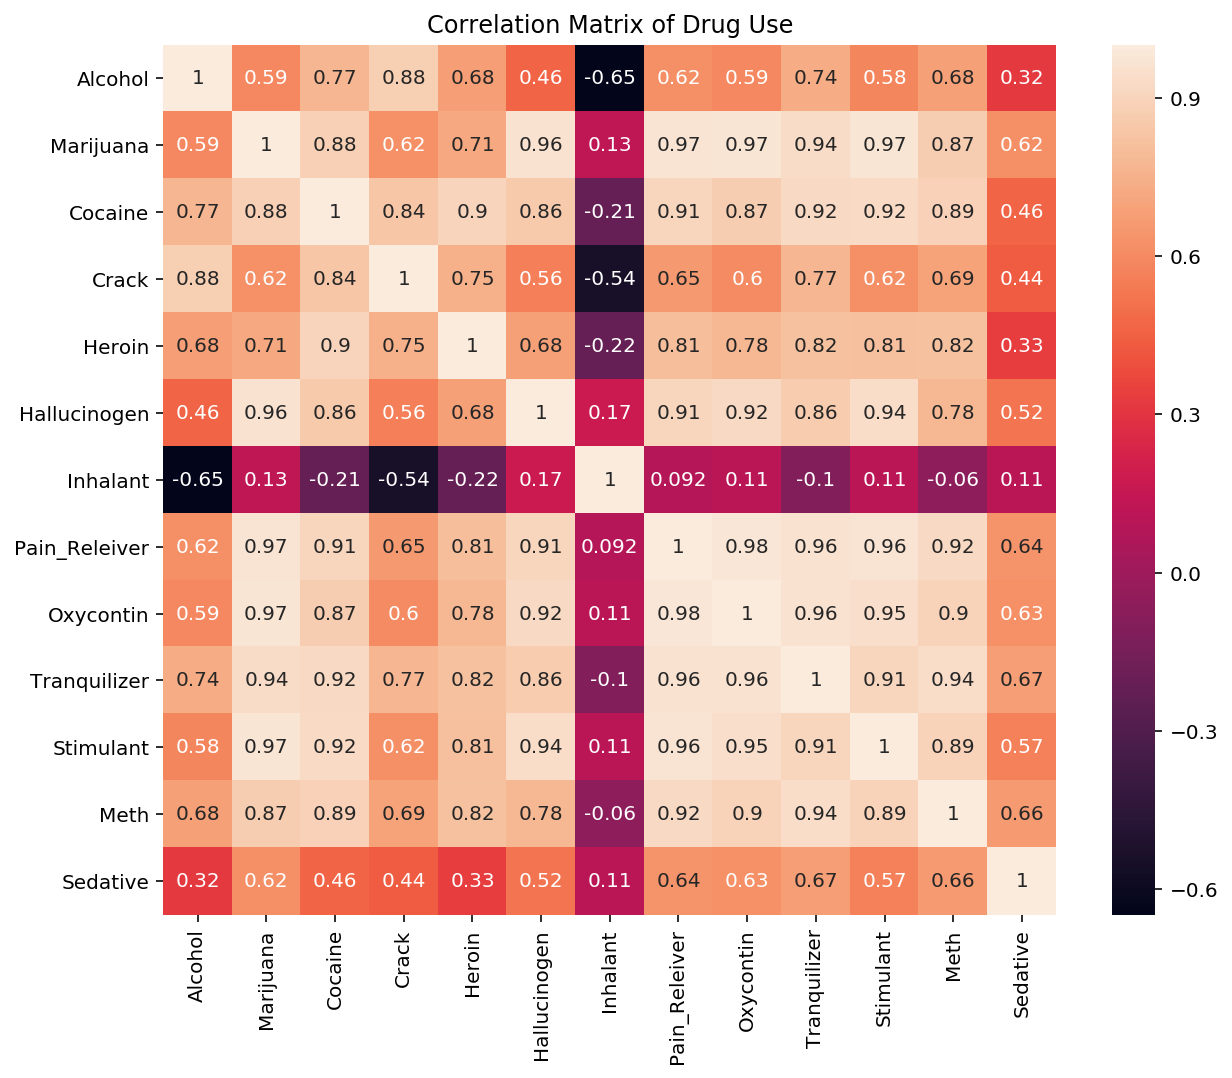

In [61]:
plt.figure(figsize = (10,8))
plt.title('Correlation Matrix of Drug Use')

sns.heatmap(use[drug_names].corr(),annot=True);

<div class="alert alert-block alert-warning">
<b>By observing the above plots of Usage and Frequency</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Inhalent_Use sems to have no correlation with other drugs they tend to be close or below zero
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;While other drugs tend to have a stronger correlation with other drugs
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;You can see a strong correlation between the use of Oxycontin, Pain_Releiver, Marijuana, Stimulant, Hallucinogen and Tranquilizer.
</div>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
<div class="alert alert-block alert-info">
<b>Question to be determined</b>
<br>Scenario 1
<br>To determine if the MEAN of the Marijuana frequency is the same for youths and adults. 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i.&nbsp;&nbsp;&nbsp;H0 = Marijuana Frequency between youths and adults is ZERO
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii.&nbsp;&nbsp;&nbsp;H1 = Marijuana Frequency between youths and adults is not ZERO
<br>
<br>Scenario 2
<br>Understanding the correlation between Heroin and Meth Frequencies
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Find Statistics Summaries for Heroin and Meth Frequency
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Boxplot Heroin and Meth summary results
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Correlate Heroin and Meth findings
</div>

<div class="alert alert-block alert-info">
<b>Scenario 1</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Find ther Marijuana Mean Frequency for both Adults and Youths 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Print out the mean for both and the difference
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Perform a T Test using stats.ttest_ind on both youth and adult frequency values
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Calculate the number of youths  plus the number of adults and then subtract 2
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Print the t_stat and the p_val and the number of records
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;Show the Visual of the T-statistic by using matplolib
</div>

In [62]:
# Find the Mean Frequency in both Adults and Youths for Mrijuana Use
youths = df_drug.iloc[:12]['Marijuana_Freq']                      # Ages 12-25 inclusive
adults = df_drug.iloc[13:]['Marijuana_Freq']                      # Ages 30-65+ inclusive

# Print out the mean for both and the difference
print ('Mean of marijuana frequency in YOUTHS :', np.mean(youths), '\n' \
       'Mean of marijuana frequency in ADULTS :', np.mean(adults), '\n' \
       '        Measured difference           :', np.mean(youths) - np.mean(adults))

Mean of marijuana frequency in YOUTHS : 39.166666666666664 
Mean of marijuana frequency in ADULTS : 52.0 
        Measured difference           : -12.833333333333336


In [63]:
# Do a t test 
t_stat, p_val = stats.ttest_ind(youths, adults)

# Calculate the number of youths  plus the number of adults and then subtract 2
df = len(adults) + len(youths) - 2

# Print the t_stat and the p_val and the number of records minus 2
print (t_stat, '\n', p_val, '\n', df)

-1.1987430806222812 
 0.25052582762354286 
 14


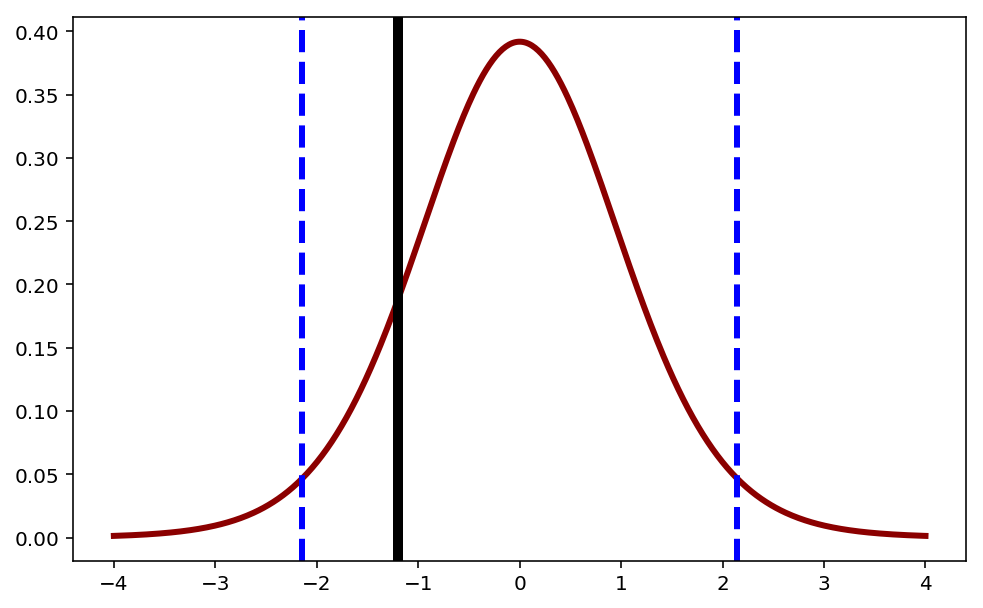

In [64]:
# Visualizing the T-statistic 
xpoints = np.linspace(-4, 4, 500)
ypoints = stats.t.pdf(xpoints, df, 0, 1)

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(t_stat, color  = 'black',  linestyle='-', lw = 5)            # Median
# confidence level at 95% 
ax.axvline(2.1448, color  = 'blue', linestyle='--', lw = 3)
ax.axvline(-2.1448, color = 'blue', linestyle='--', lw = 3)

<div class="alert alert-block alert-warning">
<b>By observing the above plot of Frequency</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since p-value is bigger than the 0.025 (2 tail test), which means you can reject the the null hypothesis
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Marijuana Frequency between youths and adults is 0 and it doesn't follow a normal distibution
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The sample is not big enough to conclude the distribution type so we need to do BOOTSTRAP to get a larger sample
</div>

<div class="alert alert-block alert-info">
<b>Introducing BOOTSTRAP</b>
<br>Becasue the test above sample is to small we can increase the test size by doing boostrap making the iterations = 1000 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Define a bootstrap function returning the new testing
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. &nbsp;&nbsp;&nbsp;Use a for loop to read tru iters 1000 times
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. select a random sample using np.random.choice
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Use stat_fuct function on the new random sample
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Append to the holding variable
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d. Return bootstrap values
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. &nbsp;&nbsp;&nbsp;Create a greater sample by Stats by bootstrap iters 1000 times
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Do a T-Test on the boostrap values
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Print the T Stats, P Values and record count 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Plot the mean diff using distplot 
</div>

In [65]:
def bootstrap(sample, stat_func, iters=1000):
    boots = []
    for i in range(iters):
        random_sample = np.random.choice(sample, replace = True, size = len(sample))
        stat = stat_func(random_sample)
        boots.append(stat)
    return boots

In [66]:
adults_boots = bootstrap(adults, np.mean, iters = 1000)
youths_boots = bootstrap(youths, np.mean, iters = 1000)
mean_diff    = pd.Series(youths_boots) - pd.Series(adults_boots)

# use t-test on 
t_stat, p_val = stats.ttest_ind(youths_boots, adults_boots)

# Print the t_stat and the p_val and the number of records
print (t_stat, '\n', p_val, '\n', df)

-47.48591773653568 
 0.0 
 14


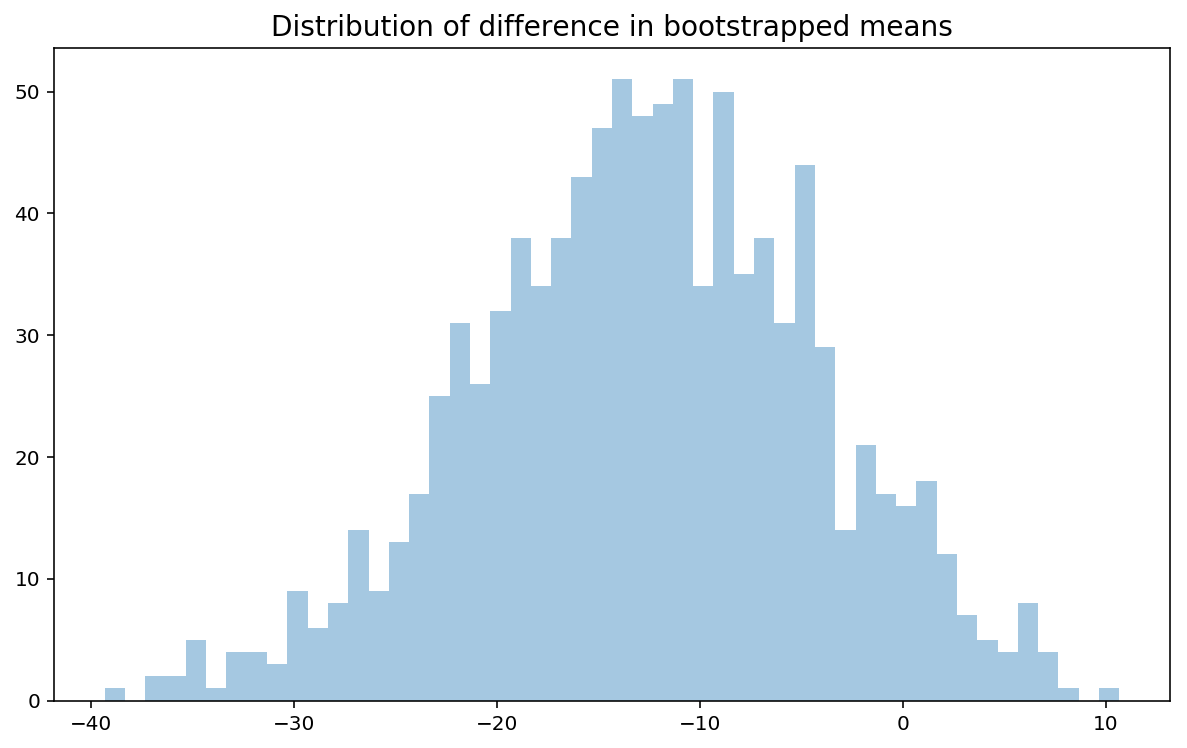

In [67]:
plt.figure(figsize = (10,6))
ax = sns.distplot(mean_diff, bins=50, kde = False)
plt.title('Distribution of difference in bootstrapped means',fontsize = 14);

<div class="alert alert-block alert-warning">
<b>By observing the above plots of Usage and Frequency</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sample size was not large enough so required to use bootstrapping instead p < 0. 05. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reject Null hypthesis 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The difference in Marijuana Frequency between youths and adults is not 0
</div>

<div class="alert alert-block alert-info">
<b>Scenario 2</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Extract DataFrame information on Heroin and Meth Frequency 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Plot a Histogram on both Heroin and Meth Frequency 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Plot a Standard BOXPLOT on both Heroin and Meth Frequency values
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Do a Spearman Correlation on both Heroin and Meth Frequency values
</div>

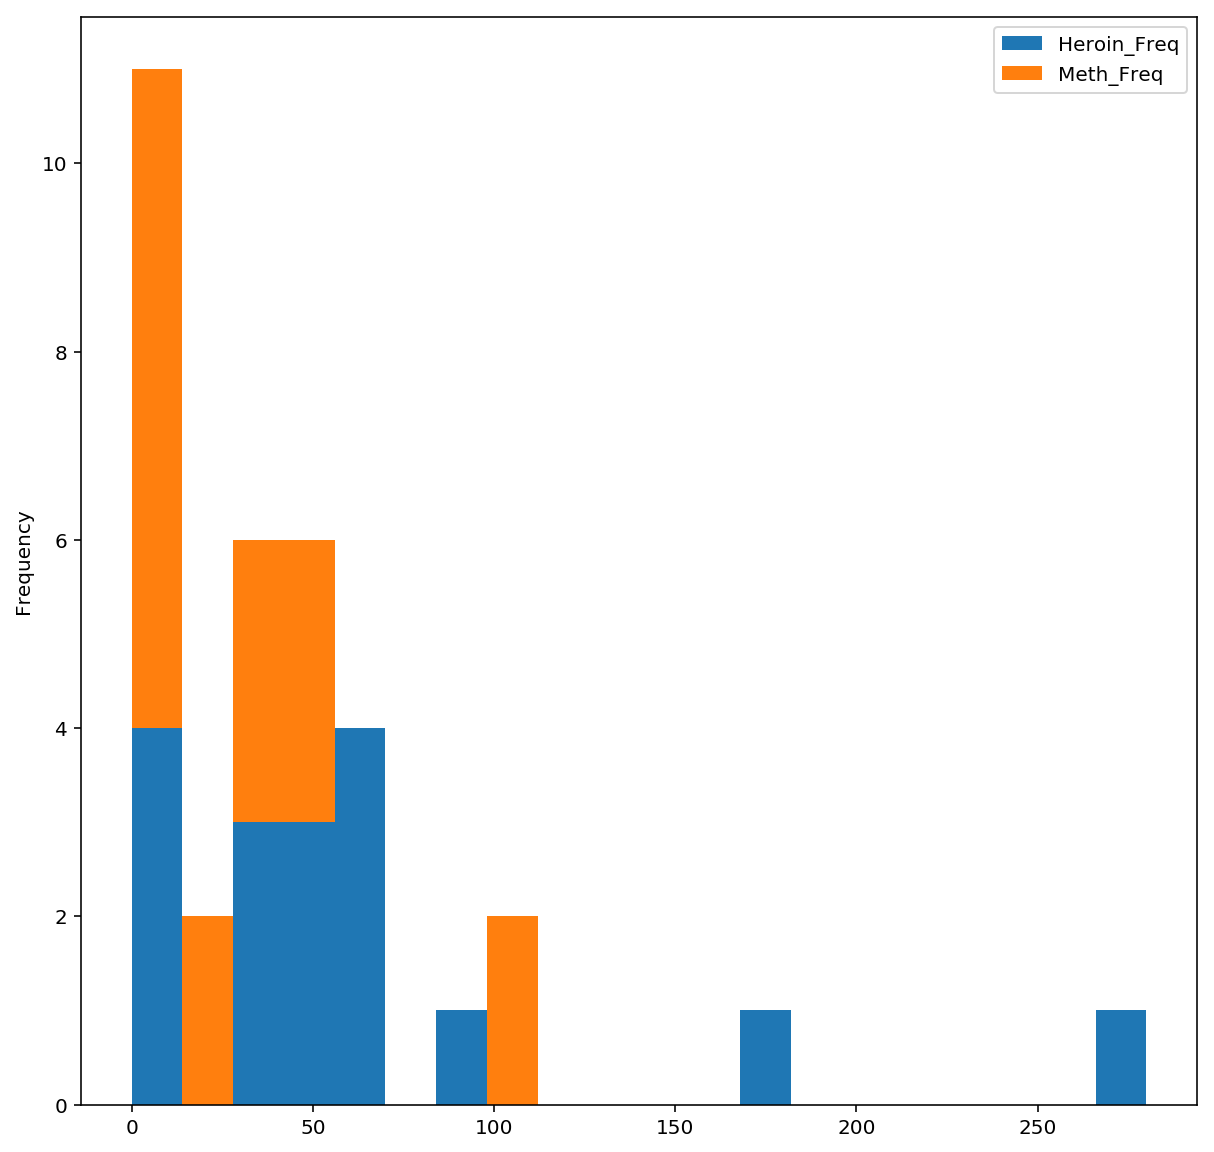

In [68]:
# Extract DataFrame information on Heroin and Meth Frequency
heroin_meth_freq = df_drug[['Age', 'Heroin_Freq', 'Meth_Freq']].copy(deep = True)

# Plot a histogram on Heroin and Meth Frequency
heroin_meth_freq[['Heroin_Freq', 'Meth_Freq']].plot.hist(stacked = True, bins = 20)

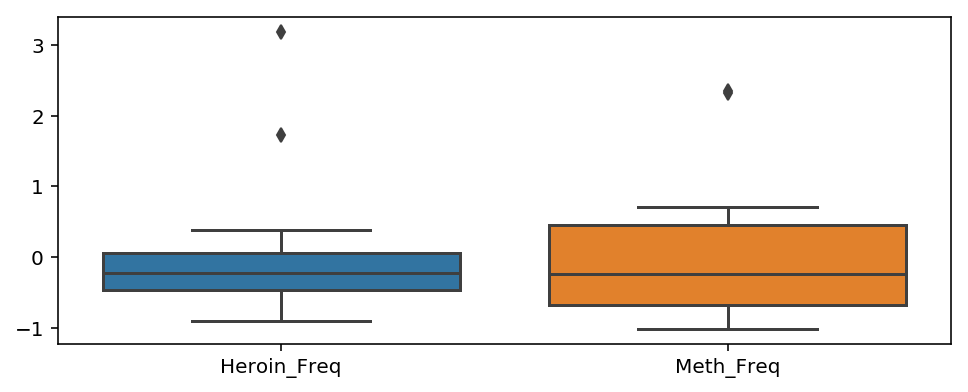

In [69]:
#PLOT STANDARDIZED BOXPLOT
df_box = heroin_meth_freq.iloc[:, 1:] #Skip age & n
for a, b in df_box.items():
    avg = df_box[a].mean()
    std = np.std(df_box[a])
    df_box[a] = df_box[a].map(lambda b: (b-avg) / std) #(Value - Mean) / STD
fig = plt.figure(figsize = (8, 3))
sns.boxplot(data = df_box, ax = fig.gca())

In [70]:
# Pearson correlation
print ('Spearman Correlation:', heroin_meth_freq.iloc[:,1:].corr(method = 'spearman').values[1][0])

Spearman Correlation: 0.8187966866665325


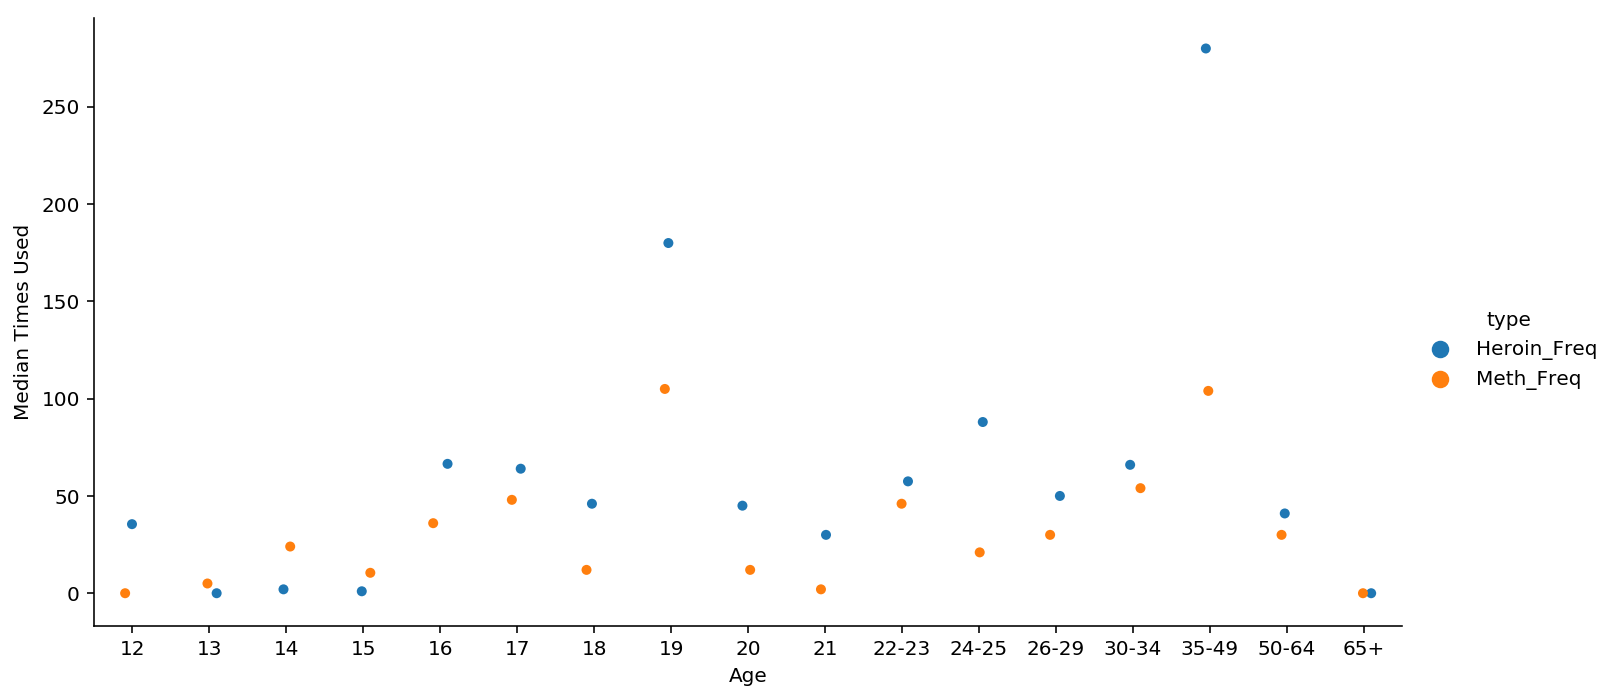

In [71]:
heroin_meth_plot = heroin_meth_freq.fillna(0).melt('Age', var_name = 'type', value_name = 'Median Times Used')
sns.catplot(x = 'Age', y = 'Median Times Used', hue = 'type',height=5, aspect=2, data = heroin_meth_plot)

<div class="alert alert-block alert-warning">
<b>Conclusion of Heroin and Meth Frequency</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The frequency columns represent the median times a user of each age group used the drug over a year; Looking at the means & standard deviation of both, we can easily see that heroin is easily double that of meth frequency; probably heroin users are more addicted than meth users. Though both have similar minimum values, the range of heroin (279) is nearly three times wider that of meth (103). From the stacked distribution table, we can see bulk of users used the drug < 80 times in a year. After standardisation, from the box-plots we can see that meth has a wider inter-quartile range than heroin meaning that 50% of the meth users tend to be more spread out than heroin; again indicating possibly heroin more addictive. Both boxes also shows outliers that are above. Spearman correlation is preferred rather than Pearson due to the existence of outliers for both datasets. After calculation, we find that heroin & meth frequencies have high correlation of 0.82. 
</div>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<div class="alert alert-block alert-info">
<b>9.0 - 1. -  Pull out the rate variable from the sat dataset.</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Extract State and Rate columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Visualize the relationship between the Use and Freq
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Seaborn Boxplot the relationship between the Use and Freq
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Seaborn Distplot the relationship between the Use and Freq
</div>

C:\Users\sergi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


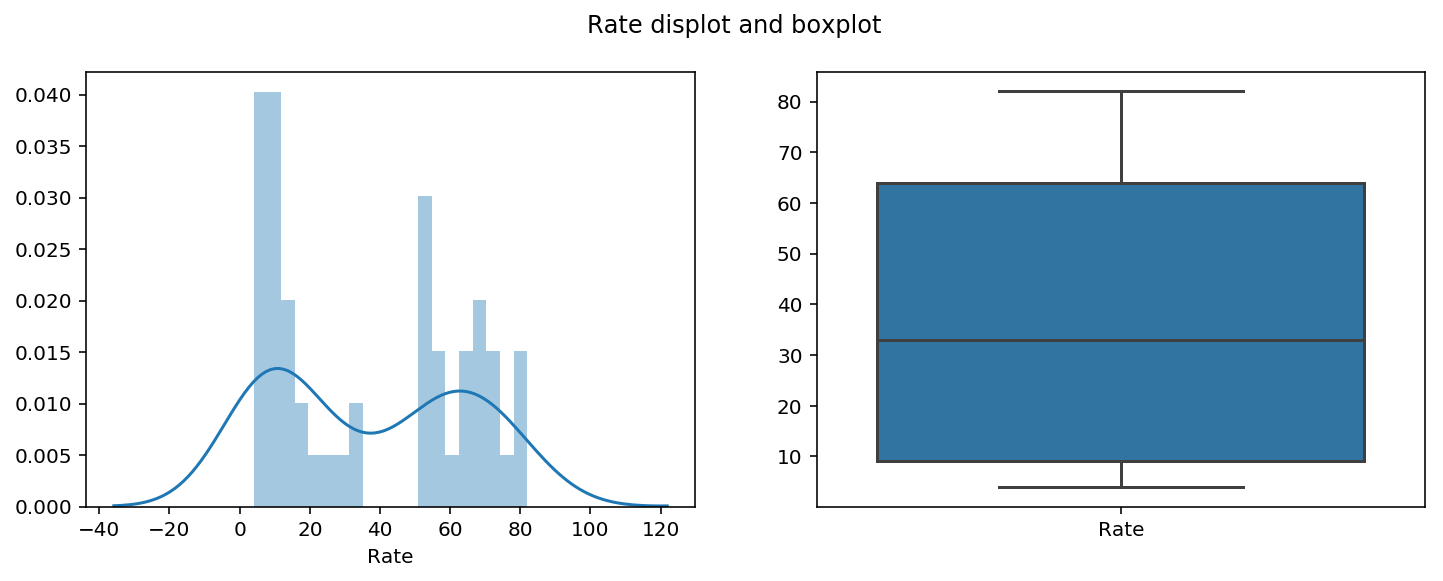

In [72]:
# 9.0 - 1.Pull out the rate variable from the sat dataset.

# Extract State and Rate columns from the sat dataset (df_sat).
sat_rate = df_sat.loc[:,['State','Rate']]

# Visualize the relationship between the drug usage and it's frequency. 

fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (12,4))
plt.suptitle('Rate displot and boxplot')
    
sns.boxplot(data=sat_rate, ax = fig.gca())   
sns.distplot(sat_rate['Rate'], bins = 20, ax = axes[0])

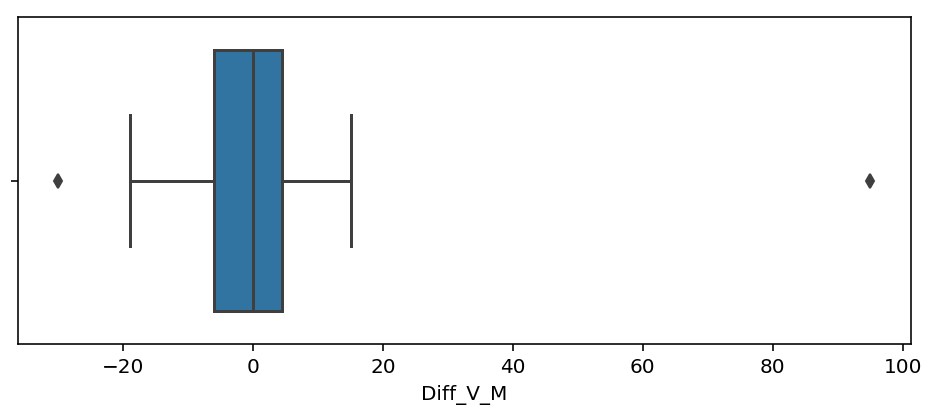

In [73]:
# Outliers have been found in Diff_V_M, boxplot to verify
fig = plt.figure(figsize = (8, 3))
sns.boxplot(df_sat['Diff_V_M'], ax = fig.gca())

<div class="alert alert-block alert-info">
<b>9.0 - 2. -  Are there outliers in the dataset? Define, in words, how you numerically define outliers.</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Column list 'Rate', 'Verbal', 'Math', 'Total', 'Diff_M_V', 'Diff_V_M'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Read thru the list of columns name in sat_columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Save the DataFrame Values for the column read
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate column MINIMUM
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate first Quartile (first 25% of column)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate third Quartile (third 75% of column)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate column MAXIMUM
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calc interquartile range by subtracting First Quartile from Third Quartile
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calc Left Outlier by * 1.5 to the IQR and subtract the value from 1st Q
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calc Left Outlier by * 1.5 to the IQR and subtract the value from 3rd Q
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print the Column name
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print Minimum
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print First Quartile
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print Second Quartile (Median)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print Third Quartile
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print Maximum
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print interquartile range (IQR)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Determin if Outlier when the Min < Left Outlier and Max > Right Outlier
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print message that there are Outliers present
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set row count to Zero
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Read thru Values in Data
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Find the value that makes it an Outlier
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print row and value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Drop the value that is an Outlier
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print removal of Outlier acknowledge
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Add 1 to row count
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Otherwise
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Print message that there are Outliers present
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Line Skip
</div>

In [74]:
# Print Outliers if any found
# Remove any outliers found from the data.

sat_columns = list(df_sat.columns[1:])        # Column list 'Rate', 'Verbal', 'Math', 'Total', 'Diff_M_V', 'Diff_V_M'

for x in sat_columns:                         # Read thru the list of columns name in sat_columns
    data          = df_sat[x]                 # Save the DataFrame Values for the column read
    data_min      = np.percentile(data, 0)    # Calculate column MINIMUM
    firstQ        = np.percentile(data, 25)   # Calculate first Quartile (first 25% of column)
    thirdQ        = np.percentile(data, 75)   # Calculate third Quartile (third 75% of column)
    data_max      = np.percentile(data, 100)  # Calculate column MAXIMUM
    IQR           = thirdQ - firstQ           # Calc interquartile range by subtracting First Quartile from Third Quartile
    outlier_left  = firstQ - 1.5 * IQR        # Calc Left Outlier by * 1.5 to the IQR and subtract the value from 1st Q
    outlier_right = thirdQ + 1.5 * IQR        # Calc Left Outlier by * 1.5 to the IQR and subtract the value from 3rd Q
    print (x)                                 # Print the Column name
    print ('\tmin: ', data_min)               # Print Minimum
    print ('\t25%: ', firstQ)                 # Print First Quartile
    print ('\t50%: ', np.percentile(data,50)) # Print Second Quartile (Median)
    print ('\t75%: ', thirdQ)                 # Print Third Quartile
    print ('\tmax: ', data_max)               # Print Maximum
    print ('\tIQR: ', IQR)                    # Print interquartile range (IQR)
    if data_min < outlier_left or data_max > outlier_right:     # When the Min < Left Outlier and Max > Right Outlier 
        print ('OUTLIERS found!!!!!')                           # Print message that there are Outliers present
        row = 0                                                 # Set row count to Zero
        for i in data:                                          # Read thru Values in Data
            if i < outlier_left or i > outlier_right:           # Find the value that makes it an Outlier
               print ('Row ', row, 'value: ', i)                # Print row and value
               sat_no_outlier = df_sat.drop(index=[row])        # Drop the value that is an Outlier
               print ('Row ', row, 'value: ', i, 'was REMOVED') # Print removal of Outlier acknowledge
            row += 1                                            # Add 1 to row count
    else:                                                       # Otherwise 
        print ('There are no outliers')                         # Print message that there are Outliers present
    print ('\n')                                                # Line Skip

Rate
	min:  4.0
	25%:  9.0
	50%:  33.0
	75%:  64.0
	max:  82.0
	IQR:  55.0
There are no outliers


Verbal
	min:  482.0
	25%:  501.0
	50%:  527.0
	75%:  562.0
	max:  593.0
	IQR:  61.0
There are no outliers


Math
	min:  439.0
	25%:  503.0
	50%:  525.0
	75%:  557.5
	max:  603.0
	IQR:  54.5
There are no outliers


Total
	min:  956.0
	25%:  1003.0
	50%:  1048.0
	75%:  1121.5
	max:  1196.0
	IQR:  118.5
There are no outliers


Diff_M_V
	min:  -95.0
	25%:  -4.5
	50%:  0.0
	75%:  6.0
	max:  30.0
	IQR:  10.5
OUTLIERS found!!!!!
Row  21 value:  30
Row  21 value:  30 was REMOVED
Row  27 value:  -95
Row  27 value:  -95 was REMOVED


Diff_V_M
	min:  -30.0
	25%:  -6.0
	50%:  0.0
	75%:  4.5
	max:  95.0
	IQR:  10.5
OUTLIERS found!!!!!
Row  21 value:  -30
Row  21 value:  -30 was REMOVED
Row  27 value:  95
Row  27 value:  95 was REMOVED




In [75]:
# Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original.
sat_no_outlier.describe(include='all').iloc[[4,5,8]]

State       Rate      Verbal        Math        Total  Diff_M_V  Diff_V_M
mean   NaN  37.220000  532.500000  533.700000  1066.200000  1.200000 -1.200000
std    NaN  27.785101   33.698695   34.120584    67.296178  8.417668  8.417668
50%    NaN  33.500000  526.500000  525.500000  1050.000000  0.000000  0.000000

In [76]:
df_sat.describe(include='all').iloc[[4,5,8]]

State       Rate      Verbal        Math        Total   Diff_M_V  \
mean   NaN  37.000000  532.529412  531.843137  1064.372549  -0.686275   
std    NaN  27.550681   33.360667   36.287393    67.886069  15.839811   
50%    NaN  33.000000  527.000000  525.000000  1048.000000   0.000000   

       Diff_V_M  
mean   0.686275  
std   15.839811  
50%    0.000000

<div class="alert alert-block alert-warning">
<b>By removing the OUTLIERS </b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;The standard deviation decreased by almost half, after removing the outlier points
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Data points are more congregated within an area
</div>

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<div class="alert alert-block alert-info">
<b>SPEARMAN Method</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For columns 'Rate','Verbal','Math' 
</div>

In [77]:
spearman = df_sat[['Rate','Verbal','Math']].corr(method='spearman')
spearman

Rate    Verbal      Math
Rate    1.000000 -0.836058 -0.811662
Verbal -0.836058  1.000000  0.909413
Math   -0.811662  0.909413  1.000000

<div class="alert alert-block alert-info">
<b>PEARSON Method</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For columns 'Rate','Verbal','Math' 
</div>

In [78]:
pearson = df_sat[['Rate','Verbal','Math']].corr(method='pearson')
pearson

Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000

<div class="alert alert-block alert-info">
<b>Get the absolute value (abs) of a number</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For (SPEARMAN - PEARSON) 
</div>

In [79]:
abs(spearman - pearson)

Rate    Verbal      Math
Rate    0.000000  0.052063  0.038242
Verbal  0.052063  0.000000  0.009503
Math    0.038242  0.009503  0.000000

<div class="alert alert-block alert-warning">
<b>How does the spearman correlation compare to the pearson correlation?</b> 
<br><b>9.1 - 1a. Pearson</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Correlation: Strength & direction of the linear relationship (by Dataset Value) between two variables
        
<b>9.1 - 1b. Spearman's</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Correlation is not restricted to linear relationships, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables, it relies on the rank order of values. It does not assume that the data is normally distributed unlike the pearson correlation, the p value for spearman is lower than the pearson correlation, meaning that it would be harder to reject the null hypothesis. That is it compares means and variances, showing Strength & direction of the monotonic relationship (by Dataset Rank) between two variables. 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Coefficient looks at the relative order of values for each variable,  making it appropriate to use with both continuous and discrete data.
<br>        
<b>9.1 - A2. Describe clearly in words the process of calculating the spearman rank correlation</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The calculating processof the spearman rank correlation is done by ranking the value of the numbers in the datasets as they appear individually in each dataset. Then compare the ranking of the numbers in the first dataset by the ranking of the numbers in the second dataset by subtracting one from another. The bigger the difference will be depending on high disparity of how the numbers are arranged or vary in ranking between each element in the dataset. By squaring each difference per row then sum all the values in the row, then use an equation to normalize this number into a value that goes from -1 to 1
</div>

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

<div class="alert alert-block alert-info">
<b>Create a new 'Rate_%' column and read thru all the rates and populate the new column with Rate percentages</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Create New Column 'Rate%' polpulate with Percentile Score of Rate
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.&nbsp;&nbsp;&nbsp;Show the Californian rate
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.&nbsp;&nbsp;&nbsp;Describe how percentile is related to spearman rank correlation
</div>

In [80]:
# 9.2 - A1. Percentile Score of Rate
df_sat['Rate_%'] = [stats.percentileofscore(df_sat['Rate'], val, kind='rank') for val in df_sat['Rate']]

# 9.2 - A2. Show the Californian rate
df_sat[df_sat['State'] == 'CA']

State  Rate  Verbal  Math  Total  Diff_M_V  Diff_V_M     Rate_%
23    CA    51     498   517   1015        19       -19  55.882353

<div class="alert alert-block alert-warning">
<b>9.2 - A3. How is percentile related to the spearman rank correlation?</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Spearman is based on a ranking order of the data;
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Percentile is a form of ranking, determines the ranks of a dataset
</div>

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

<div class="alert alert-block alert-warning">
<b>9.3 - A1. Why might percentile scoring be useful for dealing with outliers?</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Percentile determines the ranks of a dataset and also the Percentile scoring can be used to see sudden jumps in a value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Spearman is based on a ranking order of the data; percentile is a form of ranking
</div>

(array([2., 0., 1., 0., 1., 0., 1., 0., 2., 0., 1., 2., 1., 2., 4.]),
 array([ 3.9       ,  9.25333333, 14.60666667, 19.96      , 25.31333333,
        30.66666667, 36.02      , 41.37333333, 46.72666667, 52.08      ,
        57.43333333, 62.78666667, 68.14      , 73.49333333, 78.84666667,
        84.2       ]),
 <a list of 15 Patch objects>)

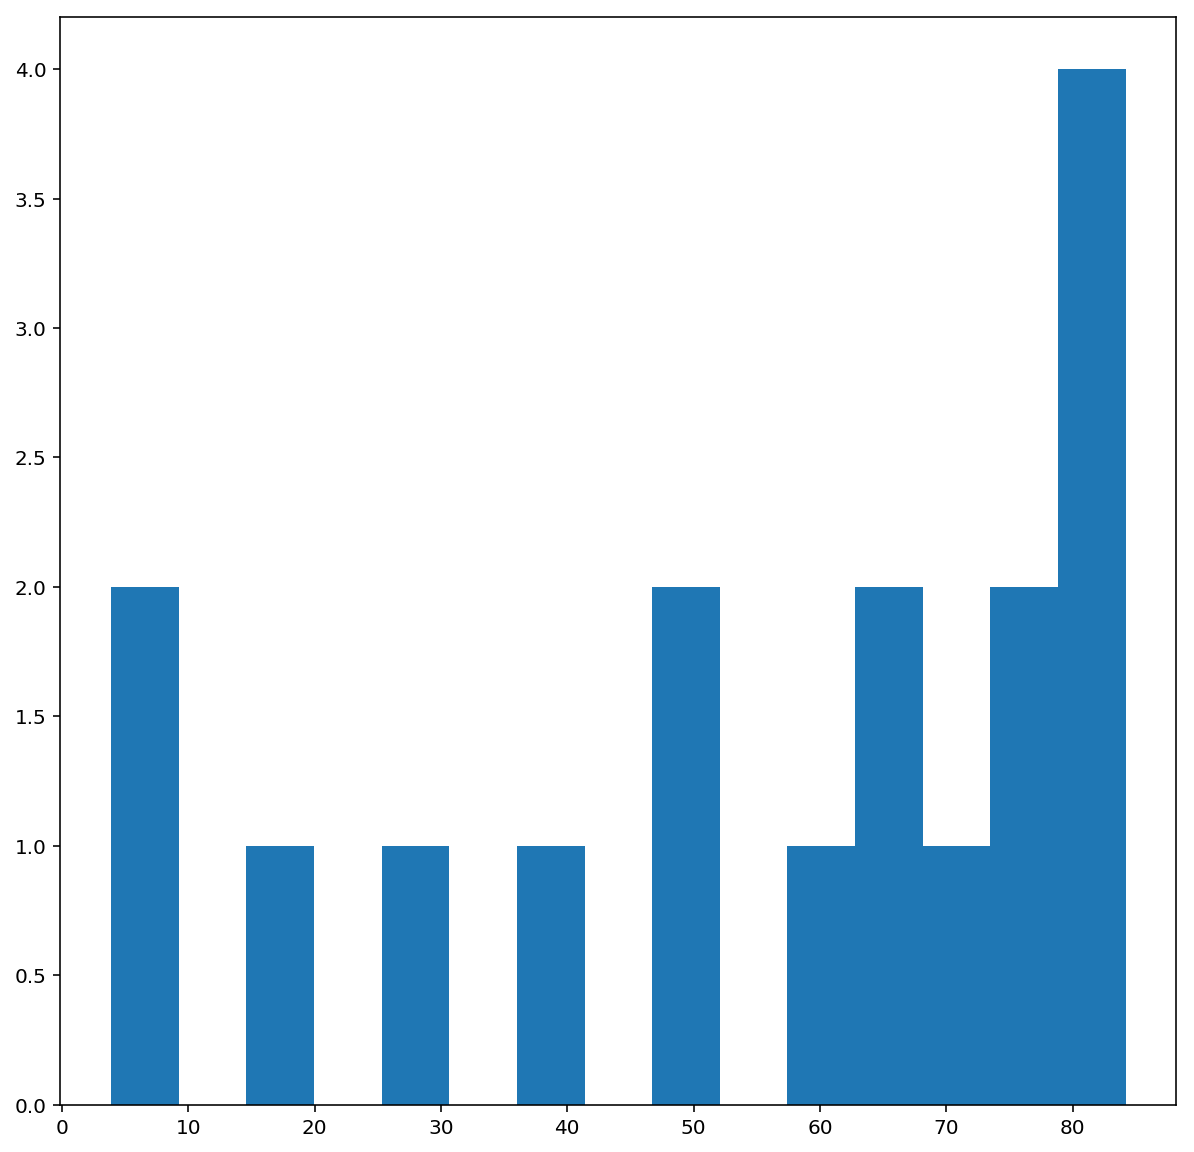

In [81]:
# 9.3 - A2. Histogram showing the distribution of Alcohol Use in all Ages
plt.hist(df_drug['Alcohol_Use'],bins=15)

  Age  Alcohol_Use  Alcohol_%
0  12          3.9   5.882353
1  13          8.5  11.764706
2  14         18.1  17.647059
3  15         29.2  23.529412
4  16         40.1  29.411765


(array([2., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.]),
 array([  5.88235294,  12.15686275,  18.43137255,  24.70588235,
         30.98039216,  37.25490196,  43.52941176,  49.80392157,
         56.07843137,  62.35294118,  68.62745098,  74.90196078,
         81.17647059,  87.45098039,  93.7254902 , 100.        ]),
 <a list of 15 Patch objects>)

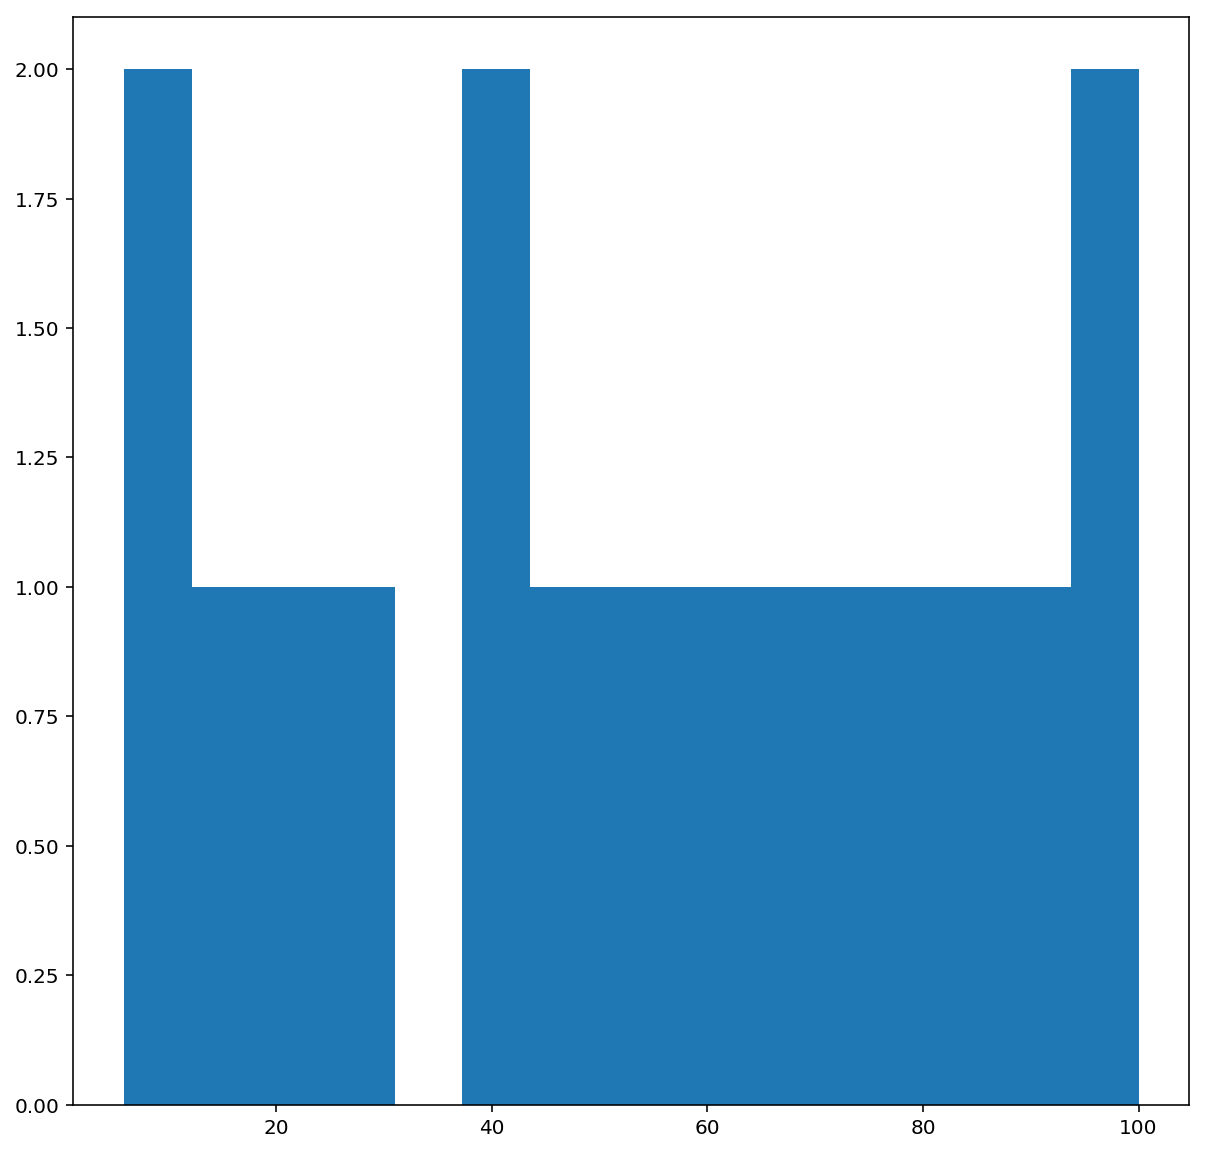

In [82]:
# 9.3 - A3. Percentile score showing the distribution of Alcohol Use in all Ages
alcohol_use = df_drug[['Age','Alcohol_Use']].copy(deep=True)
alcohol_use['Alcohol_%']=[stats.percentileofscore(alcohol_use['Alcohol_Use'],a) for a in alcohol_use['Alcohol_Use']]
print (alcohol_use.head())
plt.hist(alcohol_use['Alcohol_%'],bins=15)

In [83]:
#sns.distplot(alcohol_use, bins = 5)

(array([2., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.]),
 array([  5.88235294,  12.15686275,  18.43137255,  24.70588235,
         30.98039216,  37.25490196,  43.52941176,  49.80392157,
         56.07843137,  62.35294118,  68.62745098,  74.90196078,
         81.17647059,  87.45098039,  93.7254902 , 100.        ]),
 <a list of 15 Patch objects>)

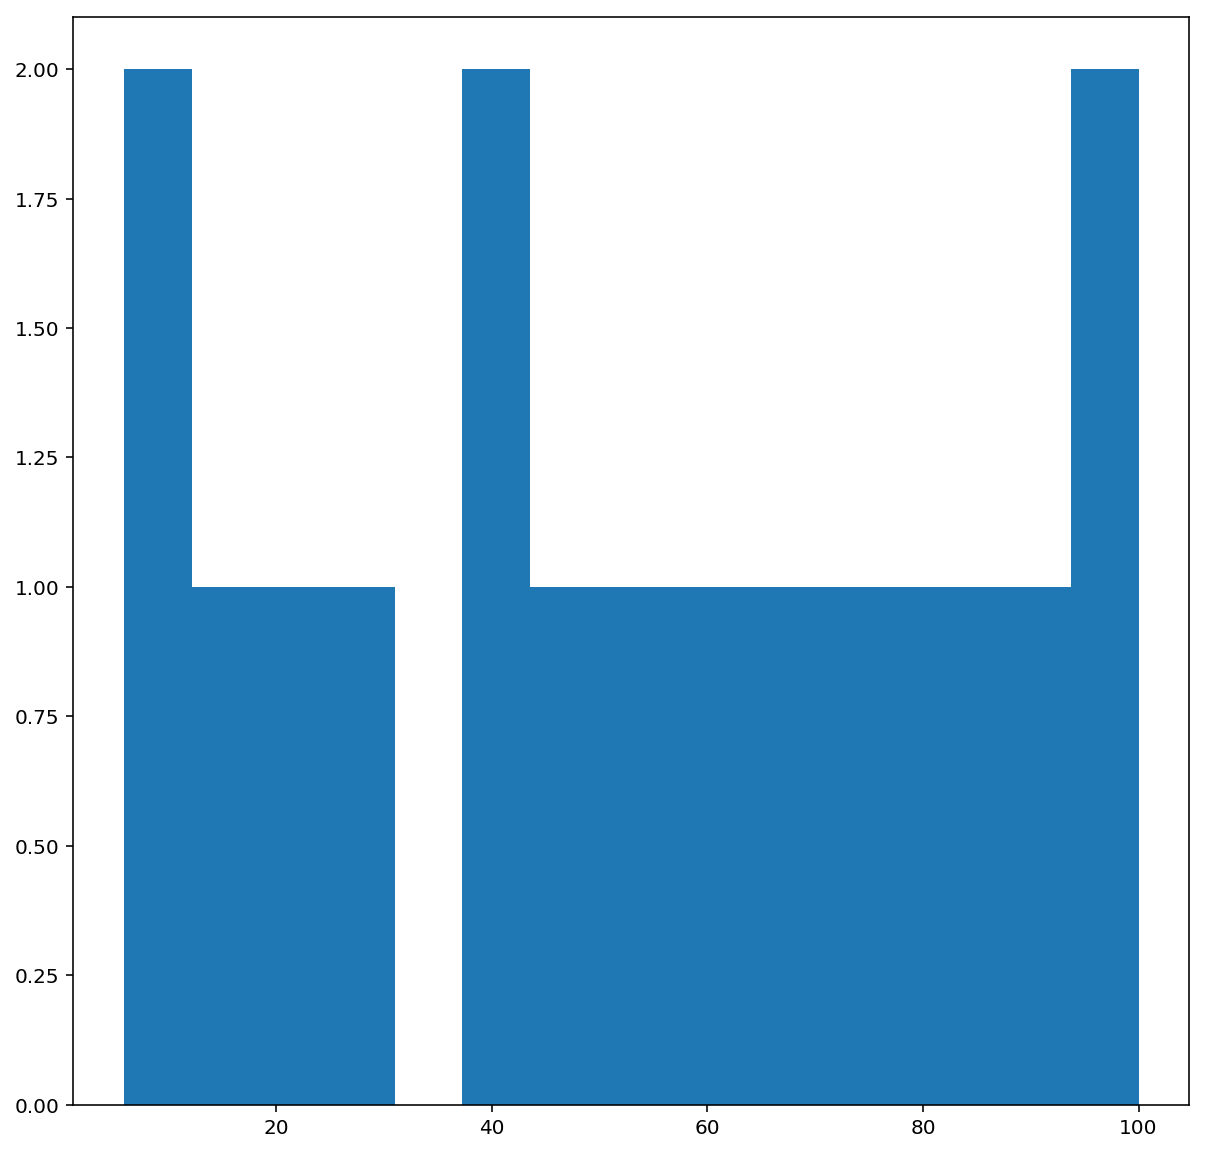

In [84]:
plt.hist(alcohol_use['Alcohol_%'],bins=15)

<div class="alert alert-block alert-warning">
<b> 9.3 - A4. Describe the effect, visually, of coverting raw scores to percentile</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As shown above, by converting raw alcohol-use medians to percentile, we get a varied distribution to an almost flat distribution.
</div>